## Processing with RN data obtained from forest sites

# Load all data from .xlsx file

In [1]:
# Import main libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

In [2]:
# Load biomass dataset
site_data = '../02_input_data/RN_sites_data.xlsx'
df = pd.read_excel(site_data, sheet_name='RN_filtration_data')
df.head()

,Ідентифікатор,Site #,Species,Species_ID,Ntrees at site,% composition,D_cm,H_m,G_m2_ha,N_ha,...,T_ag_Cs,ln_T_ag_Cs,T_ag_Sr,ln_T_ag_Sr,AEDR_count,AEDR_mean,AEDR_median,AEDR_std,Distance_km,Azimuth
0,81,001_2021,Pine,0,23,100.000000,26.060965,25.423284,49.081648,920,...,0.781087,-0.247069,9.004084,2.197678,26,3.524231,3.530,0.235489,5.926403,249
1,219,002_2021,Pine,0,60,90.178571,4.303100,4.705979,8.731641,6000,...,1.549336,0.437826,24.247024,3.188294,15,3.830667,3.780,0.166272,6.018960,249
2,224,003_2021,Pine,0,44,100.000000,28.142898,27.556869,54.703060,880,...,0.583447,-0.538802,9.304047,2.230449,28,0.483571,0.475,0.068931,13.046428,189
3,228,004_2021,Pine,0,23,100.000000,14.953551,8.506028,40.420188,2300,...,0.145072,-1.930528,5.279971,1.663921,20,0.364500,0.365,0.029576,12.741627,189
4,232,005_2021,Pine,0,26,100.000000,7.208435,3.425669,2.120687,520,...,0.254295,-1.369259,6.629225,1.891488,18,0.333333,0.345,0.036515,12.893213,189


# List of all parameters for est. of bioproductivity and RN content
"""

All parameters:
'Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year', 'D_live_cm', 'H_live_m', 'G_live_m2_ha',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'T_ag_Cs', 'ln_T_ag_Cs', 'T_ag_Sr', 'ln_T_ag_Sr'
"""

In [3]:
# Selecting main working parameters
select = pd.DataFrame(df, columns=['Species', 'Species_ID', '% composition', 'D_cm', 'H_m', 'G_m2_ha',
                                    'Origin', 'Origin_ID','A_year',
                                    'F_Soil_ID', 'M_Soil', 'AEDR_mean', 'Distance_km', 'Azimuth',
                                    'Cs_2021_kBq_m', 'Sr_2021_kBq_m', 'ln_A_Cs', 'ln_A_Sr', 
                                    'ln_T_ag_Cs', 'ln_T_ag_Sr'])
            
'''
In "Species_ID" column: "0" is Pine, "1" is Spruce, "2" is Birch, "3" is Alder, "4" is Aspen, "5" is Oak
In "Origin_ID" column: "0.0" is nutural stand, "1.0" is artificial stand
'''

# Show the first five columns
select.head()

,Species,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
0,Pine,0,100.000000,26.060965,25.423284,49.081648,a,1,68,1,2,3.524231,5.926403,249,2842.194109,998.435843,7.705262,9.103868,-0.247069,2.197678
1,Pine,0,90.178571,4.303100,4.705979,8.731641,n,0,15,1,2,3.830667,6.018960,249,2930.287815,987.750099,8.420682,10.083724,0.437826,3.188294
2,Pine,0,100.000000,28.142898,27.556869,54.703060,n,0,69,1,2,0.483571,13.046428,189,281.088291,65.777826,5.099866,6.416732,-0.538802,2.230449
3,Pine,0,100.000000,14.953551,8.506028,40.420188,n,0,15,2,2,0.364500,12.741627,189,289.512268,69.886752,3.737670,5.910797,-1.930528,1.663921
4,Pine,0,100.000000,7.208435,3.425669,2.120687,n,0,10,2,2,0.333333,12.893213,189,287.067816,69.993095,4.290459,6.139885,-1.369259,1.891488


# Pre-analysis of parameters

In [4]:
# Information on all columns of data frame
select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Species        209 non-null    object 
 1   Species_ID     209 non-null    int64  
 2   % composition  209 non-null    float64
 3   D_cm           209 non-null    float64
 4   H_m            209 non-null    float64
 5   G_m2_ha        209 non-null    float64
 6   Origin         209 non-null    object 
 7   Origin_ID      209 non-null    int64  
 8   A_year         209 non-null    int64  
 9   F_Soil_ID      209 non-null    int64  
 10  M_Soil         209 non-null    int64  
 11  AEDR_mean      209 non-null    float64
 12  Distance_km    209 non-null    float64
 13  Azimuth        209 non-null    int64  
 14  Cs_2021_kBq_m  209 non-null    float64
 15  Sr_2021_kBq_m  209 non-null    float64
 16  ln_A_Cs        209 non-null    float64
 17  ln_A_Sr        209 non-null    float64
 18  ln_T_ag_Cs

In [5]:
# Discribe statistic of forest sites by species and origin
df.groupby(["Species"])["ln_A_Cs", "ln_A_Sr"].describe()

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


ln_A_Cs                                                              \
          count      mean       std       min       25%       50%       75%   
Species                                                                       
Alder      13.0  6.249674  1.661129  3.295837  5.840642  6.040255  6.940222   
Aspen       9.0  5.584313  3.039601  2.708050  3.295837  4.204693  6.729824   
Birch      45.0  5.737563  2.249143  2.079442  3.761200  6.173786  7.229839   
Oak         7.0  6.900674  2.917841  2.397895  4.966038  7.753624  9.021902   
Pine      130.0  6.066275  1.963371  1.504077  4.358932  6.564371  7.374614   
Red oak     3.0  3.445685  0.588708  2.833213  3.164860  3.496508  3.751920   
Robinia     1.0  4.394449       NaN  4.394449  4.394449  4.394449  4.394449   
Spruce      1.0  5.176150       NaN  5.176150  5.176150  5.176150  5.176150   

                   ln_A_Sr                                                    \
               max   count      mean       std       min       25%       50%   
Species                                                                        
Alder     9.287301    13.0  6.055811  1.449620  4.094345  4.442651  6.302619   
Aspen    11.366743     9.0  7.575485  2.597130  4.615121  5.209486  7.870930   
Birch    10.332018    45.0  7.671630  2.317833  2.660260  5.752573  7.749322   
Oak      10.177324     7.0  7.188390  2.638333  3.871201  5.248545  7.766417   
Pine     10.468801   130.0  7.470846  1.889243  2.406945  6.165469  7.588295   
Red oak   4.007333     3.0  4.697638  0.334751  4.418841  4.512005  4.605170   
Robinia   4.394449     1.0  7.265430       NaN  7.265430  7.265430  7.265430   
Spruce    5.176150     1.0  7.783224       NaN  7.783224  7.783224  7.783224   

                              
              75%        max  
Species                       
Alder    7.286192   7.649693  
Aspen    8.881836  11.180246  
Birch    8.995909  13.864301  
Oak      8.529114  11.125791  
Pine     8.730280  12.687263  
Red oak  4.837037   5.068904  
Robinia  7.265430   7.265430  
Spruce   7.783224   7.783224

In [6]:
# Descriptive statistics of main parameters
select.describe()

,Species_ID,% composition,D_cm,H_m,G_m2_ha,Origin_ID,A_year,F_Soil_ID,M_Soil,AEDR_mean,Distance_km,Azimuth,Cs_2021_kBq_m,Sr_2021_kBq_m,ln_A_Cs,ln_A_Sr,ln_T_ag_Cs,ln_T_ag_Sr
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,1.057416,94.337925,17.770981,16.978858,30.000765,0.454545,47.464115,1.918660,2.220096,2.526858,14.640059,174.296651,2040.059453,670.875816,5.964225,7.381811,-0.640088,2.317915
std,1.524339,14.155594,8.921738,6.832292,15.907971,0.499125,24.724635,0.634039,0.692944,4.756383,12.363729,99.912885,3821.573719,1529.917216,2.095016,2.042856,1.288804,0.931775
min,0.000000,20.805369,1.914854,2.704460,0.259356,0.000000,10.000000,1.000000,0.000000,0.110000,3.998568,9.000000,28.815348,2.402062,1.504077,2.406945,-4.677466,-0.222660
25%,0.000000,96.775081,11.601519,12.401789,17.519173,0.000000,30.000000,2.000000,2.000000,0.460000,6.562497,56.000000,446.906289,44.007562,4.110874,5.752573,-1.390832,1.734814
50%,0.000000,100.000000,16.817809,17.466646,30.845307,0.000000,45.000000,2.000000,2.000000,0.756000,9.203749,189.000000,708.799781,187.465954,6.309918,7.506592,-0.504711,2.420262
75%,2.000000,100.000000,22.264253,21.414562,42.817263,1.000000,60.000000,2.000000,3.000000,2.401667,20.865459,261.000000,1940.992207,442.523198,7.306531,8.846497,0.338120,2.967019
max,5.000000,100.000000,52.228464,34.048688,66.922093,1.000000,150.000000,3.000000,4.000000,36.591739,57.286577,342.000000,25173.384978,10477.431302,11.366743,13.864301,1.651960,4.658771


# Selecting working columns for the XGBoost algorithms

In [7]:
# Choosing the predictor and independent variables
predictor = "ln_A_Sr"
indep_variables = ['Species_ID', 'D_cm', 'F_Soil_ID', 'AEDR_mean',
    'Sr_2021_kBq_m']


In [8]:
# Delete empty rows from the working column in a dataframe
nan_value = float("NaN")
select.replace("", nan_value, inplace=True)
select.dropna(subset = [predictor], inplace=True) # IMPOTANT - input name of column
print(select)

    Species  Species_ID  % composition       D_cm        H_m    G_m2_ha  \
0      Pine           0     100.000000  26.060965  25.423284  49.081648   
1      Pine           0      90.178571   4.303100   4.705979   8.731641   
2      Pine           0     100.000000  28.142898  27.556869  54.703060   
3      Pine           0     100.000000  14.953551   8.506028  40.420188   
4      Pine           0     100.000000   7.208435   3.425669   2.120687   
..      ...         ...            ...        ...        ...        ...   
204   Aspen           4      99.930119  11.401754  14.676282  17.972410   
205   Birch           2     100.000000   7.912790  13.818368  19.279495   
206    Pine           0     100.000000  16.041613  17.515821  31.533411   
207    Pine           0      96.775081  14.946465  18.178975  44.220927   
208    Pine           0     100.000000  15.387224  17.673021  55.824342   

    Origin  Origin_ID  A_year  F_Soil_ID  M_Soil  AEDR_mean  Distance_km  \
0        a          1  

In [9]:
# We select independent variables and predicting parameter 
X = pd.DataFrame(select, columns=indep_variables)
y = pd.DataFrame(select, columns=[predictor])

In [10]:
# Columns in "X" data collections
X.head()

,Species_ID,D_cm,F_Soil_ID,AEDR_mean,Sr_2021_kBq_m
0,0,26.060965,1,3.524231,998.435843
1,0,4.303100,1,3.830667,987.750099
2,0,28.142898,1,0.483571,65.777826
3,0,14.953551,2,0.364500,69.886752
4,0,7.208435,2,0.333333,69.993095


In [11]:
# Columns in "y" data collections
y.head()

,ln_A_Sr
0,9.103868
1,10.083724
2,6.416732
3,5.910797
4,6.139885


# Create first XGBoost model for estimate varibiality of output stats

In [12]:
#  Importing the main library for building model and its analysis
import xgboost as xgb
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import make_classification

In [13]:
# K-Folds cross-validation for estimation "quality" of input data for building model
X_kfold = pd.DataFrame(X).to_numpy()
y_kfold = pd.DataFrame(y).to_numpy()

In [14]:
# Function for comparing datasets on homogeneity 
def display_scores(scores):
    print("    Scores: {0}\n    Mean: {1:.3f}\n    Std: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))

In [15]:
# Output results of K-Folds cross-validation for XGBoost model
kfold = KFold(n_splits=3, shuffle=True)
scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(r2_score(y_test, y_pred))
    
print('R square (R2): \n')
display_scores((scores))
print('\n', 20*'-')


scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
      
    scores.append(mean_squared_error(y_test, y_pred))
    
print('Root-mean-square error (RMSE): \n')
display_scores(np.sqrt(scores))
print('\n', 20*'-')

scores = []
for train_index, test_index in kfold.split(X_kfold):   
    X_train, X_test = X_kfold[train_index], X_kfold[test_index]
    y_train, y_test = y_kfold[train_index], y_kfold[test_index]

    xgb_model = xgb.XGBRegressor(objective="reg:squarederror")
    xgb_model.fit(X_train, y_train)
    
    y_pred = xgb_model.predict(X_test)
    
    scores.append(mean_absolute_error(y_test, y_pred))

print('Mean absolute error (MAE): \n')
display_scores((scores))
print('\n', 20*'-')

R square (R2): 

    Scores: [0.8206401179279347, 0.8797523200297942, 0.8366779712669977]
    Mean: 0.846
    Std: 0.025

 --------------------
Root-mean-square error (RMSE): 

    Scores: [0.82780301 0.78233699 0.80960455]
    Mean: 0.807
    Std: 0.019

 --------------------
Mean absolute error (MAE): 

    Scores: [0.6707873935055542, 0.7026143577872, 0.6007493109526343]
    Mean: 0.658
    Std: 0.043

 --------------------


# Add optimal hyperparameters for XGBoost model

In [16]:
# Hyperparameters data for the next step/stage
p1 = 0.9482673629905486                  # colsample_bytree
print('Colsample_bytree: ' + str(p1))

p2 = 0.37070054064216                    # gamma
print('Gamma: ' + str(p2))

p3 = 0.09384234909084563                 # learning_rate
print('Learning_rate: ' + str(p3))

p4 = 4            # max_depth
print('Max_depth: ' + str(p4))

p5 = 68          # n_estimators
print('N_estimators: ' + str(p5))

p6 = 0.5729627598530151                  # subsample
print('Subsample: ' + str(p6))

Colsample_bytree: 0.9482673629905486
Gamma: 0.37070054064216
Learning_rate: 0.09384234909084563
Max_depth: 4
N_estimators: 68
Subsample: 0.5729627598530151


# Estimation of predictive quality to basic XGBoost models using Loops

In [17]:
# Create DMatrix (is an internal data structure) 
data_dmatrix = xgb.DMatrix(data=X,label=y)

In [18]:
# Aggregate parameters
aggr_y=[]
aggr_y_pred=[]

aggr_optimal_n=[]
aggr_bias=[]
aggr_rel_bias=[]
aggr_rmse=[]
aggr_rel_rmse=[]
aggr_mse=[]
aggr_R_square=[]

exp_aggr_optimal_n=[]
exp_aggr_bias=[]
exp_aggr_rel_bias=[]
exp_aggr_rmse=[]
exp_aggr_rel_rmse=[]
exp_aggr_mse=[]
exp_aggr_R_square=[]

aggr_Shap_values=pd.DataFrame()

# Body loop
for i in range(200):
    
    # Generate test and training samples
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    #exp_y_train = np.exp(y_train)
    exp_y_test = np.exp(y_test)
    
    # Implementation of the scikit-learn API for XGBoost regression
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])
    
    # Fitting the model 
    xgb_model.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_train, y_train), (X_test, y_test)])
    
    # learning dynamics
    y_pred = xgb_model.predict(X_test, ntree_limit=xgb_model.best_ntree_limit)
    
    exp_y_pred = np.exp(y_pred)
    
    # Iteration with the best result
    optimal_n= xgb_model.best_ntree_limit-1
    
    # Convert data to 'array' type
    conv_y_pred = pd.DataFrame(y_pred) # Double transformation
    y_pred2 = conv_y_pred.values
    y_test2 = y_test.values
    
    exp_y_pred2 = np.exp(y_pred2)
    exp_y_test2 = np.exp(y_test2)
    
    # Intermediate results
    n_sample = len(y_pred2)
    y_mean_sample = y_test.sum() / n_sample
    
    exp_y_mean_sample = exp_y_test.sum() / n_sample
    
    # Calculation of bias
    diff = y_pred2 - y_test2
    bias = diff.sum()/n_sample
    rel_bias = bias/y_mean_sample*100
    
    exp_diff = exp_y_pred2 - exp_y_test2
    exp_bias = exp_diff.sum()/n_sample
    exp_rel_bias = exp_bias/exp_y_mean_sample*100
    
    # Calculation of RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rel_rmse = rmse/y_mean_sample*100 
    
    exp_rmse = np.sqrt(mean_squared_error(exp_y_test, exp_y_pred))
    exp_rel_rmse = exp_rmse/exp_y_mean_sample*100 
    
    # Calculation of MSE
    mse = mean_squared_error(y_test, y_pred)   
    
    exp_mse = mean_squared_error(exp_y_test, exp_y_pred)
    
    # Calculation of Square R
    R_square = r2_score(y_test, y_pred)
    
    exp_R_square = r2_score(exp_y_test, exp_y_pred)
    
    #Calculation of SHAP-values
    explainer = shap.TreeExplainer(xgb_model)
    shap_values = explainer.shap_values(X_train)
    vals= np.abs(shap_values).mean(0)
    feature_importance = pd.DataFrame(list(zip(X_train.columns,vals)),columns=['Feature','Importance'])
       
    
    #Add values to lists
    aggr_y.append(y_test)
    aggr_y_pred.append(conv_y_pred)    
    
    aggr_optimal_n.append(optimal_n)
    aggr_bias.append(bias)
    aggr_rel_bias.append(rel_bias)
    aggr_rmse.append(rmse)
    aggr_rel_rmse.append(rel_rmse)
    aggr_mse.append(mse)
    aggr_R_square.append(R_square)
    
    exp_aggr_bias.append(exp_bias)
    exp_aggr_rel_bias.append(exp_rel_bias)
    exp_aggr_rmse.append(exp_rmse)
    exp_aggr_rel_rmse.append(exp_rel_rmse)
    exp_aggr_mse.append(exp_mse)
    exp_aggr_R_square.append(exp_R_square)
    
    aggr_Shap_values = aggr_Shap_values.append(feature_importance, ignore_index=True)
    
# Intermedia data to calculate CI
n_train = len(y_train)
n_test = len(y_test)

[0]	validation_0-rmse:6.44480	validation_1-rmse:6.97725
[1]	validation_0-rmse:5.87736	validation_1-rmse:6.35194
[2]	validation_0-rmse:5.35985	validation_1-rmse:5.80095
[3]	validation_0-rmse:4.88154	validation_1-rmse:5.27135
[4]	validation_0-rmse:4.45902	validation_1-rmse:4.83321
[5]	validation_0-rmse:4.08641	validation_1-rmse:4.43557
[6]	validation_0-rmse:3.73814	validation_1-rmse:4.05886
[7]	validation_0-rmse:3.42121	validation_1-rmse:3.70694


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[8]	validation_0-rmse:3.13785	validation_1-rmse:3.38820
[9]	validation_0-rmse:2.87855	validation_1-rmse:3.10672
[10]	validation_0-rmse:2.63601	validation_1-rmse:2.83722
[11]	validation_0-rmse:2.41808	validation_1-rmse:2.60105
[12]	validation_0-rmse:2.22205	validation_1-rmse:2.39000
[13]	validation_0-rmse:2.05269	validation_1-rmse:2.19710
[14]	validation_0-rmse:1.89135	validation_1-rmse:2.02786
[15]	validation_0-rmse:1.75137	validation_1-rmse:1.87864
[16]	validation_0-rmse:1.62946	validation_1-rmse:1.76495
[17]	validation_0-rmse:1.51687	validation_1-rmse:1.65123
[18]	validation_0-rmse:1.39814	validation_1-rmse:1.53762
[19]	validation_0-rmse:1.31456	validation_1-rmse:1.44374
[20]	validation_0-rmse:1.22078	validation_1-rmse:1.34685
[21]	validation_0-rmse:1.14413	validation_1-rmse:1.27612
[22]	validation_0-rmse:1.06999	validation_1-rmse:1.20940
[23]	validation_0-rmse:1.00466	validation_1-rmse:1.14820
[24]	validation_0-rmse:0.94785	validation_1-rmse:1.09550
[25]	validation_0-rmse:0.89009	va

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.54253	validation_1-rmse:6.50760
[1]	validation_0-rmse:5.97226	validation_1-rmse:5.94329
[2]	validation_0-rmse:5.44542	validation_1-rmse:5.42371
[3]	validation_0-rmse:4.95853	validation_1-rmse:4.95008
[4]	validation_0-rmse:4.52584	validation_1-rmse:4.52756
[5]	validation_0-rmse:4.12695	validation_1-rmse:4.12767
[6]	validation_0-rmse:3.77291	validation_1-rmse:3.77804
[7]	validation_0-rmse:3.44653	validation_1-rmse:3.45002
[8]	validation_0-rmse:3.15530	validation_1-rmse:3.16359


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.88163	validation_1-rmse:2.89486
[10]	validation_0-rmse:2.63600	validation_1-rmse:2.65071
[11]	validation_0-rmse:2.41734	validation_1-rmse:2.43623
[12]	validation_0-rmse:2.22490	validation_1-rmse:2.25462
[13]	validation_0-rmse:2.05177	validation_1-rmse:2.09926
[14]	validation_0-rmse:1.89391	validation_1-rmse:1.96030
[15]	validation_0-rmse:1.74544	validation_1-rmse:1.83267
[16]	validation_0-rmse:1.61499	validation_1-rmse:1.70838
[17]	validation_0-rmse:1.50135	validation_1-rmse:1.59478
[18]	validation_0-rmse:1.39742	validation_1-rmse:1.49498
[19]	validation_0-rmse:1.30017	validation_1-rmse:1.40541
[20]	validation_0-rmse:1.21733	validation_1-rmse:1.33319
[21]	validation_0-rmse:1.13997	validation_1-rmse:1.26041
[22]	validation_0-rmse:1.06978	validation_1-rmse:1.19772
[23]	validation_0-rmse:1.00009	validation_1-rmse:1.13798
[24]	validation_0-rmse:0.93855	validation_1-rmse:1.09033
[25]	validation_0-rmse:0.88560	validation_1-rmse:1.04639
[26]	validation_0-rmse:0.83894	v

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.92821	validation_1-rmse:6.08726
[2]	validation_0-rmse:5.40501	validation_1-rmse:5.54651
[3]	validation_0-rmse:4.92557	validation_1-rmse:5.05657
[4]	validation_0-rmse:4.50684	validation_1-rmse:4.63999
[5]	validation_0-rmse:4.13642	validation_1-rmse:4.26087
[6]	validation_0-rmse:3.79302	validation_1-rmse:3.90681
[7]	validation_0-rmse:3.46829	validation_1-rmse:3.58004
[8]	validation_0-rmse:3.17327	validation_1-rmse:3.28405
[9]	validation_0-rmse:2.92057	validation_1-rmse:3.03651
[10]	validation_0-rmse:2.67945	validation_1-rmse:2.79770
[11]	validation_0-rmse:2.46688	validation_1-rmse:2.57935
[12]	validation_0-rmse:2.25841	validation_1-rmse:2.37353
[13]	validation_0-rmse:2.08414	validation_1-rmse:2.20593
[14]	validation_0-rmse:1.92250	validation_1-rmse:2.04729
[15]	validation_0-rmse:1.76696	validation_1-rmse:1.89436
[16]	validation_0-rmse:1.63282	validation_1-rmse:1.76673
[17]	validation_0-rmse:1.51514	validation_1-rmse:1.65488
[18]	validation_0-rmse:1.40729	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.50968	validation_1-rmse:6.75029
[1]	validation_0-rmse:5.94034	validation_1-rmse:6.17027
[2]	validation_0-rmse:5.44323	validation_1-rmse:5.66750
[3]	validation_0-rmse:4.95834	validation_1-rmse:5.15565
[4]	validation_0-rmse:4.53217	validation_1-rmse:4.71674
[5]	validation_0-rmse:4.15101	validation_1-rmse:4.31942
[6]	validation_0-rmse:3.78926	validation_1-rmse:3.94946
[7]	validation_0-rmse:3.48044	validation_1-rmse:3.63037
[8]	validation_0-rmse:3.19092	validation_1-rmse:3.33269
[9]	validation_0-rmse:2.92784	validation_1-rmse:3.06210
[10]	validation_0-rmse:2.68509	validation_1-rmse:2.82325
[11]	validation_0-rmse:2.47850	validation_1-rmse:2.61245
[12]	validation_0-rmse:2.27664	validation_1-rmse:2.39917
[13]	validation_0-rmse:2.09379	validation_1-rmse:2.22521
[14]	validation_0-rmse:1.93247	validation_1-rmse:2.06158
[15]	validation_0-rmse:1.77852	validation_1-rmse:1.92276
[16]	validation_0-rmse:1.64145	validation_1-rmse:1.79548
[17]	validation_0-rmse:1.51817	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.97946	validation_1-rmse:5.88614
[2]	validation_0-rmse:5.44540	validation_1-rmse:5.37212
[3]	validation_0-rmse:4.96842	validation_1-rmse:4.90550
[4]	validation_0-rmse:4.55420	validation_1-rmse:4.51519
[5]	validation_0-rmse:4.16004	validation_1-rmse:4.13926
[6]	validation_0-rmse:3.80034	validation_1-rmse:3.79827
[7]	validation_0-rmse:3.47229	validation_1-rmse:3.48891
[8]	validation_0-rmse:3.17624	validation_1-rmse:3.22035
[9]	validation_0-rmse:2.91301	validation_1-rmse:2.96591
[10]	validation_0-rmse:2.68383	validation_1-rmse:2.75251
[11]	validation_0-rmse:2.46323	validation_1-rmse:2.55206
[12]	validation_0-rmse:2.26198	validation_1-rmse:2.36754
[13]	validation_0-rmse:2.06908	validation_1-rmse:2.19096
[14]	validation_0-rmse:1.90730	validation_1-rmse:2.05498
[15]	validation_0-rmse:1.76155	validation_1-rmse:1.93465
[16]	validation_0-rmse:1.62508	validation_1-rmse:1.82694
[17]	validation_0-rmse:1.50306	validation_1-rmse:1.73582
[18]	validation_0-rmse:1.38888	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.33950	validation_1-rmse:6.08733
[3]	validation_0-rmse:4.87114	validation_1-rmse:5.58881
[4]	validation_0-rmse:4.43804	validation_1-rmse:5.14841
[5]	validation_0-rmse:4.05887	validation_1-rmse:4.75260
[6]	validation_0-rmse:3.71853	validation_1-rmse:4.38439
[7]	validation_0-rmse:3.40572	validation_1-rmse:4.04513
[8]	validation_0-rmse:3.11198	validation_1-rmse:3.73100
[9]	validation_0-rmse:2.85435	validation_1-rmse:3.46095
[10]	validation_0-rmse:2.63118	validation_1-rmse:3.22550
[11]	validation_0-rmse:2.41589	validation_1-rmse:2.99415
[12]	validation_0-rmse:2.22404	validation_1-rmse:2.79028
[13]	validation_0-rmse:2.05003	validation_1-rmse:2.61023
[14]	validation_0-rmse:1.89408	validation_1-rmse:2.45233
[15]	validation_0-rmse:1.74464	validation_1-rmse:2.29225
[16]	validation_0-rmse:1.61458	validation_1-rmse:2.14127
[17]	validation_0-rmse:1.49564	validation_1-rmse:2.02424
[18]	validation_0-rmse:1.38654	validation_1-rmse:1.91080
[19]	validation_0-rmse:1.29407	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.04647	validation_1-rmse:5.63132
[2]	validation_0-rmse:5.51680	validation_1-rmse:5.13716
[3]	validation_0-rmse:5.03434	validation_1-rmse:4.67125
[4]	validation_0-rmse:4.59721	validation_1-rmse:4.26767
[5]	validation_0-rmse:4.20487	validation_1-rmse:3.89094
[6]	validation_0-rmse:3.84300	validation_1-rmse:3.54790
[7]	validation_0-rmse:3.51795	validation_1-rmse:3.23908
[8]	validation_0-rmse:3.23002	validation_1-rmse:2.97793
[9]	validation_0-rmse:2.96538	validation_1-rmse:2.72777
[10]	validation_0-rmse:2.71648	validation_1-rmse:2.48636
[11]	validation_0-rmse:2.49186	validation_1-rmse:2.27506
[12]	validation_0-rmse:2.28993	validation_1-rmse:2.09203
[13]	validation_0-rmse:2.11691	validation_1-rmse:1.94736
[14]	validation_0-rmse:1.95675	validation_1-rmse:1.80798
[15]	validation_0-rmse:1.80324	validation_1-rmse:1.67634
[16]	validation_0-rmse:1.66542	validation_1-rmse:1.57153
[17]	validation_0-rmse:1.54642	validation_1-rmse:1.46086
[18]	validation_0-rmse:1.43183	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.49157	validation_1-rmse:5.24716
[3]	validation_0-rmse:5.00721	validation_1-rmse:4.76539
[4]	validation_0-rmse:4.59485	validation_1-rmse:4.36770
[5]	validation_0-rmse:4.20258	validation_1-rmse:3.98336
[6]	validation_0-rmse:3.84384	validation_1-rmse:3.61164
[7]	validation_0-rmse:3.52194	validation_1-rmse:3.28832
[8]	validation_0-rmse:3.22294	validation_1-rmse:2.98119
[9]	validation_0-rmse:2.95765	validation_1-rmse:2.72141
[10]	validation_0-rmse:2.71036	validation_1-rmse:2.47068
[11]	validation_0-rmse:2.50844	validation_1-rmse:2.26519
[12]	validation_0-rmse:2.30848	validation_1-rmse:2.09684
[13]	validation_0-rmse:2.11852	validation_1-rmse:1.90787
[14]	validation_0-rmse:1.95520	validation_1-rmse:1.75851
[15]	validation_0-rmse:1.80234	validation_1-rmse:1.60692
[16]	validation_0-rmse:1.66726	validation_1-rmse:1.48801
[17]	validation_0-rmse:1.54339	validation_1-rmse:1.37533
[18]	validation_0-rmse:1.43446	validation_1-rmse:1.27116
[19]	validation_0-rmse:1.33265	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.19808	validation_1-rmse:3.92166
[6]	validation_0-rmse:3.84113	validation_1-rmse:3.56870
[7]	validation_0-rmse:3.51936	validation_1-rmse:3.25214
[8]	validation_0-rmse:3.20451	validation_1-rmse:2.94360
[9]	validation_0-rmse:2.93531	validation_1-rmse:2.69833
[10]	validation_0-rmse:2.70021	validation_1-rmse:2.47020
[11]	validation_0-rmse:2.48255	validation_1-rmse:2.25618
[12]	validation_0-rmse:2.27675	validation_1-rmse:2.07737
[13]	validation_0-rmse:2.09513	validation_1-rmse:1.91808
[14]	validation_0-rmse:1.93229	validation_1-rmse:1.78251
[15]	validation_0-rmse:1.78363	validation_1-rmse:1.65938
[16]	validation_0-rmse:1.65190	validation_1-rmse:1.54907
[17]	validation_0-rmse:1.53392	validation_1-rmse:1.44374
[18]	validation_0-rmse:1.41904	validation_1-rmse:1.35471
[19]	validation_0-rmse:1.31715	validation_1-rmse:1.26146
[20]	validation_0-rmse:1.23133	validation_1-rmse:1.17877
[21]	validation_0-rmse:1.15054	validation_1-rmse:1.11166
[22]	validation_0-rmse:1.07631	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.94841	validation_1-rmse:5.10268
[4]	validation_0-rmse:4.53557	validation_1-rmse:4.69188
[5]	validation_0-rmse:4.15151	validation_1-rmse:4.29988
[6]	validation_0-rmse:3.79502	validation_1-rmse:3.96616
[7]	validation_0-rmse:3.46856	validation_1-rmse:3.63184
[8]	validation_0-rmse:3.17834	validation_1-rmse:3.32052
[9]	validation_0-rmse:2.90953	validation_1-rmse:3.04646
[10]	validation_0-rmse:2.66389	validation_1-rmse:2.80264
[11]	validation_0-rmse:2.44583	validation_1-rmse:2.60505
[12]	validation_0-rmse:2.25155	validation_1-rmse:2.40804
[13]	validation_0-rmse:2.08472	validation_1-rmse:2.23995
[14]	validation_0-rmse:1.91592	validation_1-rmse:2.07082
[15]	validation_0-rmse:1.76837	validation_1-rmse:1.93635
[16]	validation_0-rmse:1.63329	validation_1-rmse:1.81037
[17]	validation_0-rmse:1.51891	validation_1-rmse:1.70184
[18]	validation_0-rmse:1.40739	validation_1-rmse:1.59805
[19]	validation_0-rmse:1.30927	validation_1-rmse:1.50915
[20]	validation_0-rmse:1.22033	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50922	validation_1-rmse:5.25259
[3]	validation_0-rmse:5.02888	validation_1-rmse:4.80769
[4]	validation_0-rmse:4.59472	validation_1-rmse:4.39383
[5]	validation_0-rmse:4.18946	validation_1-rmse:4.01151
[6]	validation_0-rmse:3.82841	validation_1-rmse:3.67374
[7]	validation_0-rmse:3.50509	validation_1-rmse:3.37207
[8]	validation_0-rmse:3.20701	validation_1-rmse:3.11027
[9]	validation_0-rmse:2.95282	validation_1-rmse:2.89745
[10]	validation_0-rmse:2.71881	validation_1-rmse:2.67096
[11]	validation_0-rmse:2.49792	validation_1-rmse:2.45945
[12]	validation_0-rmse:2.29245	validation_1-rmse:2.26643
[13]	validation_0-rmse:2.11461	validation_1-rmse:2.10162
[14]	validation_0-rmse:1.95733	validation_1-rmse:1.95733
[15]	validation_0-rmse:1.81003	validation_1-rmse:1.84131
[16]	validation_0-rmse:1.67605	validation_1-rmse:1.71463
[17]	validation_0-rmse:1.54040	validation_1-rmse:1.59589
[18]	validation_0-rmse:1.43207	validation_1-rmse:1.50542
[19]	validation_0-rmse:1.33486	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.08076	validation_1-rmse:5.47409
[2]	validation_0-rmse:5.56125	validation_1-rmse:5.01097
[3]	validation_0-rmse:5.07393	validation_1-rmse:4.55647
[4]	validation_0-rmse:4.64966	validation_1-rmse:4.14446
[5]	validation_0-rmse:4.25317	validation_1-rmse:3.76747
[6]	validation_0-rmse:3.89313	validation_1-rmse:3.42841
[7]	validation_0-rmse:3.57653	validation_1-rmse:3.13363
[8]	validation_0-rmse:3.27184	validation_1-rmse:2.85262
[9]	validation_0-rmse:2.99139	validation_1-rmse:2.59942
[10]	validation_0-rmse:2.74713	validation_1-rmse:2.38621
[11]	validation_0-rmse:2.52878	validation_1-rmse:2.18615
[12]	validation_0-rmse:2.32447	validation_1-rmse:2.01552
[13]	validation_0-rmse:2.14295	validation_1-rmse:1.86034
[14]	validation_0-rmse:1.97932	validation_1-rmse:1.71920
[15]	validation_0-rmse:1.81991	validation_1-rmse:1.59389
[16]	validation_0-rmse:1.67879	validation_1-rmse:1.48003
[17]	validation_0-rmse:1.55084	validation_1-rmse:1.37088
[18]	validation_0-rmse:1.44417	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.45437	validation_1-rmse:6.90848
[1]	validation_0-rmse:5.88670	validation_1-rmse:6.28057
[2]	validation_0-rmse:5.36754	validation_1-rmse:5.74152
[3]	validation_0-rmse:4.89517	validation_1-rmse:5.21802
[4]	validation_0-rmse:4.47826	validation_1-rmse:4.77321


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.08922	validation_1-rmse:4.34437
[6]	validation_0-rmse:3.74333	validation_1-rmse:3.96707
[7]	validation_0-rmse:3.42172	validation_1-rmse:3.61046
[8]	validation_0-rmse:3.15174	validation_1-rmse:3.32539
[9]	validation_0-rmse:2.89624	validation_1-rmse:3.04133
[10]	validation_0-rmse:2.66217	validation_1-rmse:2.80040
[11]	validation_0-rmse:2.45652	validation_1-rmse:2.58741
[12]	validation_0-rmse:2.27445	validation_1-rmse:2.39753
[13]	validation_0-rmse:2.10097	validation_1-rmse:2.21740
[14]	validation_0-rmse:1.94395	validation_1-rmse:2.06266
[15]	validation_0-rmse:1.80719	validation_1-rmse:1.90555
[16]	validation_0-rmse:1.67972	validation_1-rmse:1.76384
[17]	validation_0-rmse:1.56137	validation_1-rmse:1.65120
[18]	validation_0-rmse:1.45211	validation_1-rmse:1.53254
[19]	validation_0-rmse:1.35178	validation_1-rmse:1.43150
[20]	validation_0-rmse:1.26467	validation_1-rmse:1.34261
[21]	validation_0-rmse:1.18109	validation_1-rmse:1.26126
[22]	validation_0-rmse:1.10708	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.61099	validation_1-rmse:6.20424
[1]	validation_0-rmse:6.03029	validation_1-rmse:5.67709


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52169	validation_1-rmse:5.18477
[3]	validation_0-rmse:5.05282	validation_1-rmse:4.73883
[4]	validation_0-rmse:4.63032	validation_1-rmse:4.33781
[5]	validation_0-rmse:4.21525	validation_1-rmse:3.94430
[6]	validation_0-rmse:3.84924	validation_1-rmse:3.61345
[7]	validation_0-rmse:3.51860	validation_1-rmse:3.30641
[8]	validation_0-rmse:3.22835	validation_1-rmse:3.02754
[9]	validation_0-rmse:2.95243	validation_1-rmse:2.76243
[10]	validation_0-rmse:2.71284	validation_1-rmse:2.54884
[11]	validation_0-rmse:2.50300	validation_1-rmse:2.34830
[12]	validation_0-rmse:2.30103	validation_1-rmse:2.14566
[13]	validation_0-rmse:2.10880	validation_1-rmse:1.95735
[14]	validation_0-rmse:1.94457	validation_1-rmse:1.82226
[15]	validation_0-rmse:1.79248	validation_1-rmse:1.68290
[16]	validation_0-rmse:1.65831	validation_1-rmse:1.56406
[17]	validation_0-rmse:1.53976	validation_1-rmse:1.46332
[18]	validation_0-rmse:1.42682	validation_1-rmse:1.36887
[19]	validation_0-rmse:1.32265	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[0]	validation_0-rmse:6.45760	validation_1-rmse:6.85534
[1]	validation_0-rmse:5.89554	validation_1-rmse:6.29953
[2]	validation_0-rmse:5.38204	validation_1-rmse:5.79740
[3]	validation_0-rmse:4.91208	validation_1-rmse:5.31874
[4]	validation_0-rmse:4.49272	validation_1-rmse:4.87370
[5]	validation_0-rmse:4.10723	validation_1-rmse:4.47980
[6]	validation_0-rmse:3.75247	validation_1-rmse:4.11702
[7]	validation_0-rmse:3.42596	validation_1-rmse:3.77336
[8]	validation_0-rmse:3.13109	validation_1-rmse:3.46104
[9]	validation_0-rmse:2.86642	validation_1-rmse:3.17561
[10]	validation_0-rmse:2.63457	validation_1-rmse:2.93726
[11]	validation_0-rmse:2.41475	validation_1-rmse:2.71008
[12]	validation_0-rmse:2.22344	validation_1-rmse:2.50313
[13]	validation_0-rmse:2.05681	validation_1-rmse:2.33300
[14]	validation_0-rmse:1.90273	validation_1-rmse:2.16946
[15]	validation_0-rmse:1.76469	validation_1-rmse:2.02619
[16]	validation_0-rmse:1.62679	validation_1-rmse:1.88475
[17]	validation_0-rmse:1.51177	validation

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.00396	validation_1-rmse:5.72437
[2]	validation_0-rmse:5.48269	validation_1-rmse:5.20351
[3]	validation_0-rmse:5.01112	validation_1-rmse:4.74165
[4]	validation_0-rmse:4.58252	validation_1-rmse:4.32258
[5]	validation_0-rmse:4.18442	validation_1-rmse:3.93590
[6]	validation_0-rmse:3.82371	validation_1-rmse:3.57896
[7]	validation_0-rmse:3.50134	validation_1-rmse:3.25413
[8]	validation_0-rmse:3.19523	validation_1-rmse:2.95758
[9]	validation_0-rmse:2.93379	validation_1-rmse:2.71047
[10]	validation_0-rmse:2.68712	validation_1-rmse:2.47439
[11]	validation_0-rmse:2.47702	validation_1-rmse:2.28295
[12]	validation_0-rmse:2.28320	validation_1-rmse:2.09836
[13]	validation_0-rmse:2.10113	validation_1-rmse:1.92838
[14]	validation_0-rmse:1.94288	validation_1-rmse:1.77468
[15]	validation_0-rmse:1.79749	validation_1-rmse:1.65397
[16]	validation_0-rmse:1.67459	validation_1-rmse:1.56325
[17]	validation_0-rmse:1.55143	validation_1-rmse:1.44868
[18]	validation_0-rmse:1.43532	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.88168	validation_1-rmse:3.40004
[7]	validation_0-rmse:3.54621	validation_1-rmse:3.07676
[8]	validation_0-rmse:3.24757	validation_1-rmse:2.79880
[9]	validation_0-rmse:2.98285	validation_1-rmse:2.56935
[10]	validation_0-rmse:2.74772	validation_1-rmse:2.35644
[11]	validation_0-rmse:2.51380	validation_1-rmse:2.14001
[12]	validation_0-rmse:2.31212	validation_1-rmse:1.96665
[13]	validation_0-rmse:2.13476	validation_1-rmse:1.81076
[14]	validation_0-rmse:1.97154	validation_1-rmse:1.68328
[15]	validation_0-rmse:1.82384	validation_1-rmse:1.55462
[16]	validation_0-rmse:1.69304	validation_1-rmse:1.45694
[17]	validation_0-rmse:1.57814	validation_1-rmse:1.36458
[18]	validation_0-rmse:1.45977	validation_1-rmse:1.27702
[19]	validation_0-rmse:1.35862	validation_1-rmse:1.21026
[20]	validation_0-rmse:1.25756	validation_1-rmse:1.15257
[21]	validation_0-rmse:1.16786	validation_1-rmse:1.09129
[22]	validation_0-rmse:1.09260	validation_1-rmse:1.03380
[23]	validation_0-rmse:1.03171	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.13657	validation_1-rmse:4.43003
[6]	validation_0-rmse:3.78751	validation_1-rmse:4.07936
[7]	validation_0-rmse:3.46890	validation_1-rmse:3.76436
[8]	validation_0-rmse:3.17118	validation_1-rmse:3.46903
[9]	validation_0-rmse:2.91041	validation_1-rmse:3.20275
[10]	validation_0-rmse:2.67492	validation_1-rmse:2.98807
[11]	validation_0-rmse:2.44695	validation_1-rmse:2.75299
[12]	validation_0-rmse:2.25326	validation_1-rmse:2.56568
[13]	validation_0-rmse:2.06962	validation_1-rmse:2.37765
[14]	validation_0-rmse:1.90693	validation_1-rmse:2.22758
[15]	validation_0-rmse:1.75902	validation_1-rmse:2.09308
[16]	validation_0-rmse:1.62638	validation_1-rmse:1.96549
[17]	validation_0-rmse:1.51561	validation_1-rmse:1.86541
[18]	validation_0-rmse:1.40679	validation_1-rmse:1.76017
[19]	validation_0-rmse:1.30370	validation_1-rmse:1.66485
[20]	validation_0-rmse:1.22122	validation_1-rmse:1.58977
[21]	validation_0-rmse:1.15113	validation_1-rmse:1.51564
[22]	validation_0-rmse:1.07429	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.19638	validation_1-rmse:3.66955
[6]	validation_0-rmse:3.83455	validation_1-rmse:3.33018
[7]	validation_0-rmse:3.50738	validation_1-rmse:3.02776
[8]	validation_0-rmse:3.20481	validation_1-rmse:2.74093
[9]	validation_0-rmse:2.93159	validation_1-rmse:2.47438
[10]	validation_0-rmse:2.69443	validation_1-rmse:2.25648
[11]	validation_0-rmse:2.47701	validation_1-rmse:2.06405
[12]	validation_0-rmse:2.28187	validation_1-rmse:1.89057
[13]	validation_0-rmse:2.10230	validation_1-rmse:1.73211
[14]	validation_0-rmse:1.94536	validation_1-rmse:1.59920
[15]	validation_0-rmse:1.79892	validation_1-rmse:1.47400
[16]	validation_0-rmse:1.66123	validation_1-rmse:1.37446
[17]	validation_0-rmse:1.53890	validation_1-rmse:1.28028
[18]	validation_0-rmse:1.42681	validation_1-rmse:1.19180
[19]	validation_0-rmse:1.32320	validation_1-rmse:1.11680
[20]	validation_0-rmse:1.23638	validation_1-rmse:1.06307
[21]	validation_0-rmse:1.15328	validation_1-rmse:1.01082
[22]	validation_0-rmse:1.07344	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.49290	validation_1-rmse:3.36951
[8]	validation_0-rmse:3.19397	validation_1-rmse:3.09595
[9]	validation_0-rmse:2.93872	validation_1-rmse:2.86325
[10]	validation_0-rmse:2.68686	validation_1-rmse:2.63291
[11]	validation_0-rmse:2.47091	validation_1-rmse:2.43915
[12]	validation_0-rmse:2.26433	validation_1-rmse:2.25113
[13]	validation_0-rmse:2.08711	validation_1-rmse:2.09218
[14]	validation_0-rmse:1.92740	validation_1-rmse:1.94261
[15]	validation_0-rmse:1.78318	validation_1-rmse:1.83080
[16]	validation_0-rmse:1.65021	validation_1-rmse:1.71944
[17]	validation_0-rmse:1.52772	validation_1-rmse:1.62081
[18]	validation_0-rmse:1.40974	validation_1-rmse:1.51736
[19]	validation_0-rmse:1.31315	validation_1-rmse:1.43181
[20]	validation_0-rmse:1.23480	validation_1-rmse:1.36393
[21]	validation_0-rmse:1.15035	validation_1-rmse:1.28751
[22]	validation_0-rmse:1.07200	validation_1-rmse:1.22259
[23]	validation_0-rmse:1.00694	validation_1-rmse:1.16902
[24]	validation_0-rmse:0.94917	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.98397	validation_1-rmse:4.93575
[4]	validation_0-rmse:4.55957	validation_1-rmse:4.52565
[5]	validation_0-rmse:4.15676	validation_1-rmse:4.12871
[6]	validation_0-rmse:3.80894	validation_1-rmse:3.78358
[7]	validation_0-rmse:3.49143	validation_1-rmse:3.47057
[8]	validation_0-rmse:3.20264	validation_1-rmse:3.20175
[9]	validation_0-rmse:2.93624	validation_1-rmse:2.93270
[10]	validation_0-rmse:2.70112	validation_1-rmse:2.68823
[11]	validation_0-rmse:2.48453	validation_1-rmse:2.47854
[12]	validation_0-rmse:2.28701	validation_1-rmse:2.29288
[13]	validation_0-rmse:2.11178	validation_1-rmse:2.12624
[14]	validation_0-rmse:1.95460	validation_1-rmse:1.97757
[15]	validation_0-rmse:1.81107	validation_1-rmse:1.84564
[16]	validation_0-rmse:1.67463	validation_1-rmse:1.69721
[17]	validation_0-rmse:1.55571	validation_1-rmse:1.58274
[18]	validation_0-rmse:1.44623	validation_1-rmse:1.48392
[19]	validation_0-rmse:1.34827	validation_1-rmse:1.39209
[20]	validation_0-rmse:1.26378	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53976	validation_1-rmse:4.69763
[5]	validation_0-rmse:4.14970	validation_1-rmse:4.31003
[6]	validation_0-rmse:3.79260	validation_1-rmse:3.94986
[7]	validation_0-rmse:3.47106	validation_1-rmse:3.62795
[8]	validation_0-rmse:3.17477	validation_1-rmse:3.32949
[9]	validation_0-rmse:2.91207	validation_1-rmse:3.06124
[10]	validation_0-rmse:2.67412	validation_1-rmse:2.82253
[11]	validation_0-rmse:2.45792	validation_1-rmse:2.60497
[12]	validation_0-rmse:2.26251	validation_1-rmse:2.40945
[13]	validation_0-rmse:2.07520	validation_1-rmse:2.21730
[14]	validation_0-rmse:1.92063	validation_1-rmse:2.05009
[15]	validation_0-rmse:1.78294	validation_1-rmse:1.91199
[16]	validation_0-rmse:1.64793	validation_1-rmse:1.77251
[17]	validation_0-rmse:1.53061	validation_1-rmse:1.64133
[18]	validation_0-rmse:1.42374	validation_1-rmse:1.52976
[19]	validation_0-rmse:1.32401	validation_1-rmse:1.42196
[20]	validation_0-rmse:1.24404	validation_1-rmse:1.34399
[21]	validation_0-rmse:1.16963	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.49488	validation_1-rmse:4.78969
[5]	validation_0-rmse:4.11548	validation_1-rmse:4.38712
[6]	validation_0-rmse:3.76168	validation_1-rmse:4.02242
[7]	validation_0-rmse:3.44496	validation_1-rmse:3.68976
[8]	validation_0-rmse:3.15424	validation_1-rmse:3.38845
[9]	validation_0-rmse:2.89251	validation_1-rmse:3.12322
[10]	validation_0-rmse:2.65192	validation_1-rmse:2.87246
[11]	validation_0-rmse:2.43854	validation_1-rmse:2.64671
[12]	validation_0-rmse:2.24281	validation_1-rmse:2.44277
[13]	validation_0-rmse:2.06832	validation_1-rmse:2.25811
[14]	validation_0-rmse:1.91563	validation_1-rmse:2.13101
[15]	validation_0-rmse:1.77716	validation_1-rmse:1.99343
[16]	validation_0-rmse:1.64374	validation_1-rmse:1.86230
[17]	validation_0-rmse:1.53030	validation_1-rmse:1.76380
[18]	validation_0-rmse:1.42142	validation_1-rmse:1.67954
[19]	validation_0-rmse:1.32700	validation_1-rmse:1.58788
[20]	validation_0-rmse:1.23776	validation_1-rmse:1.51385
[21]	validation_0-rmse:1.15026	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.86673	validation_1-rmse:3.46413
[7]	validation_0-rmse:3.53494	validation_1-rmse:3.16214
[8]	validation_0-rmse:3.23154	validation_1-rmse:2.87780
[9]	validation_0-rmse:2.96271	validation_1-rmse:2.63096
[10]	validation_0-rmse:2.71887	validation_1-rmse:2.41225
[11]	validation_0-rmse:2.52259	validation_1-rmse:2.21239
[12]	validation_0-rmse:2.32351	validation_1-rmse:2.03504
[13]	validation_0-rmse:2.14317	validation_1-rmse:1.87965
[14]	validation_0-rmse:1.97928	validation_1-rmse:1.73082
[15]	validation_0-rmse:1.83289	validation_1-rmse:1.61426
[16]	validation_0-rmse:1.70102	validation_1-rmse:1.50233
[17]	validation_0-rmse:1.57752	validation_1-rmse:1.39213
[18]	validation_0-rmse:1.46716	validation_1-rmse:1.30929
[19]	validation_0-rmse:1.36731	validation_1-rmse:1.22720
[20]	validation_0-rmse:1.27076	validation_1-rmse:1.16187
[21]	validation_0-rmse:1.18645	validation_1-rmse:1.09559
[22]	validation_0-rmse:1.11609	validation_1-rmse:1.03287
[23]	validation_0-rmse:1.05224	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79388	validation_1-rmse:4.05883
[7]	validation_0-rmse:3.47145	validation_1-rmse:3.71757
[8]	validation_0-rmse:3.17968	validation_1-rmse:3.40804
[9]	validation_0-rmse:2.91307	validation_1-rmse:3.12510
[10]	validation_0-rmse:2.68040	validation_1-rmse:2.88328
[11]	validation_0-rmse:2.46014	validation_1-rmse:2.65515
[12]	validation_0-rmse:2.25930	validation_1-rmse:2.45732
[13]	validation_0-rmse:2.07081	validation_1-rmse:2.25482
[14]	validation_0-rmse:1.92210	validation_1-rmse:2.10992
[15]	validation_0-rmse:1.77062	validation_1-rmse:1.95557
[16]	validation_0-rmse:1.63630	validation_1-rmse:1.81415
[17]	validation_0-rmse:1.51883	validation_1-rmse:1.70297
[18]	validation_0-rmse:1.40650	validation_1-rmse:1.59222
[19]	validation_0-rmse:1.30677	validation_1-rmse:1.48793
[20]	validation_0-rmse:1.21739	validation_1-rmse:1.39347
[21]	validation_0-rmse:1.14443	validation_1-rmse:1.31930
[22]	validation_0-rmse:1.07665	validation_1-rmse:1.26018
[23]	validation_0-rmse:1.00747	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.15294	validation_1-rmse:4.09850
[6]	validation_0-rmse:3.79408	validation_1-rmse:3.73482
[7]	validation_0-rmse:3.47411	validation_1-rmse:3.40808
[8]	validation_0-rmse:3.17961	validation_1-rmse:3.13294
[9]	validation_0-rmse:2.90802	validation_1-rmse:2.85289
[10]	validation_0-rmse:2.66914	validation_1-rmse:2.61545
[11]	validation_0-rmse:2.45360	validation_1-rmse:2.40290
[12]	validation_0-rmse:2.25881	validation_1-rmse:2.22580
[13]	validation_0-rmse:2.08317	validation_1-rmse:2.04598
[14]	validation_0-rmse:1.92327	validation_1-rmse:1.89837
[15]	validation_0-rmse:1.78732	validation_1-rmse:1.75371
[16]	validation_0-rmse:1.65046	validation_1-rmse:1.62105
[17]	validation_0-rmse:1.53174	validation_1-rmse:1.51525
[18]	validation_0-rmse:1.41442	validation_1-rmse:1.40739
[19]	validation_0-rmse:1.31629	validation_1-rmse:1.32464
[20]	validation_0-rmse:1.23952	validation_1-rmse:1.25623
[21]	validation_0-rmse:1.15651	validation_1-rmse:1.18913
[22]	validation_0-rmse:1.07836	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.20977	validation_1-rmse:3.93719
[6]	validation_0-rmse:3.84436	validation_1-rmse:3.58714
[7]	validation_0-rmse:3.53155	validation_1-rmse:3.28559
[8]	validation_0-rmse:3.21882	validation_1-rmse:2.99102
[9]	validation_0-rmse:2.95205	validation_1-rmse:2.73333
[10]	validation_0-rmse:2.70625	validation_1-rmse:2.49567
[11]	validation_0-rmse:2.47753	validation_1-rmse:2.28188
[12]	validation_0-rmse:2.27366	validation_1-rmse:2.09722
[13]	validation_0-rmse:2.08833	validation_1-rmse:1.91761
[14]	validation_0-rmse:1.91904	validation_1-rmse:1.77480
[15]	validation_0-rmse:1.77886	validation_1-rmse:1.63622
[16]	validation_0-rmse:1.64397	validation_1-rmse:1.52268
[17]	validation_0-rmse:1.52730	validation_1-rmse:1.42311
[18]	validation_0-rmse:1.41938	validation_1-rmse:1.33860
[19]	validation_0-rmse:1.32589	validation_1-rmse:1.24570
[20]	validation_0-rmse:1.23765	validation_1-rmse:1.16477
[21]	validation_0-rmse:1.15551	validation_1-rmse:1.09796
[22]	validation_0-rmse:1.08434	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.81926	validation_1-rmse:3.61330
[7]	validation_0-rmse:3.49983	validation_1-rmse:3.31403
[8]	validation_0-rmse:3.21053	validation_1-rmse:3.03973
[9]	validation_0-rmse:2.95386	validation_1-rmse:2.80101
[10]	validation_0-rmse:2.70614	validation_1-rmse:2.57516
[11]	validation_0-rmse:2.48996	validation_1-rmse:2.37465
[12]	validation_0-rmse:2.29225	validation_1-rmse:2.19631
[13]	validation_0-rmse:2.10990	validation_1-rmse:2.02562
[14]	validation_0-rmse:1.95404	validation_1-rmse:1.86513
[15]	validation_0-rmse:1.81211	validation_1-rmse:1.73281
[16]	validation_0-rmse:1.67946	validation_1-rmse:1.61493
[17]	validation_0-rmse:1.55704	validation_1-rmse:1.50681
[18]	validation_0-rmse:1.45055	validation_1-rmse:1.40704
[19]	validation_0-rmse:1.35277	validation_1-rmse:1.32274
[20]	validation_0-rmse:1.26474	validation_1-rmse:1.23599
[21]	validation_0-rmse:1.18490	validation_1-rmse:1.16389
[22]	validation_0-rmse:1.11140	validation_1-rmse:1.09919
[23]	validation_0-rmse:1.04451	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.12715	validation_1-rmse:4.16835
[6]	validation_0-rmse:3.77203	validation_1-rmse:3.81420
[7]	validation_0-rmse:3.45857	validation_1-rmse:3.50587
[8]	validation_0-rmse:3.16691	validation_1-rmse:3.21208
[9]	validation_0-rmse:2.90093	validation_1-rmse:2.94585
[10]	validation_0-rmse:2.65259	validation_1-rmse:2.70485
[11]	validation_0-rmse:2.43417	validation_1-rmse:2.49793
[12]	validation_0-rmse:2.24055	validation_1-rmse:2.32300
[13]	validation_0-rmse:2.06113	validation_1-rmse:2.13045
[14]	validation_0-rmse:1.90087	validation_1-rmse:1.99119
[15]	validation_0-rmse:1.76322	validation_1-rmse:1.86471
[16]	validation_0-rmse:1.63325	validation_1-rmse:1.74925
[17]	validation_0-rmse:1.51003	validation_1-rmse:1.65079
[18]	validation_0-rmse:1.39736	validation_1-rmse:1.54355
[19]	validation_0-rmse:1.30149	validation_1-rmse:1.45708
[20]	validation_0-rmse:1.21674	validation_1-rmse:1.38898
[21]	validation_0-rmse:1.14069	validation_1-rmse:1.32113
[22]	validation_0-rmse:1.06468	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.22318	validation_1-rmse:3.85649
[6]	validation_0-rmse:3.86352	validation_1-rmse:3.53095
[7]	validation_0-rmse:3.52387	validation_1-rmse:3.22381
[8]	validation_0-rmse:3.23076	validation_1-rmse:2.94065
[9]	validation_0-rmse:2.96255	validation_1-rmse:2.69757
[10]	validation_0-rmse:2.72196	validation_1-rmse:2.47405
[11]	validation_0-rmse:2.49643	validation_1-rmse:2.25647
[12]	validation_0-rmse:2.29477	validation_1-rmse:2.06726
[13]	validation_0-rmse:2.11414	validation_1-rmse:1.91223
[14]	validation_0-rmse:1.95004	validation_1-rmse:1.78546
[15]	validation_0-rmse:1.79825	validation_1-rmse:1.66111
[16]	validation_0-rmse:1.66037	validation_1-rmse:1.55034
[17]	validation_0-rmse:1.54435	validation_1-rmse:1.45150
[18]	validation_0-rmse:1.43012	validation_1-rmse:1.35346
[19]	validation_0-rmse:1.32684	validation_1-rmse:1.27658
[20]	validation_0-rmse:1.23921	validation_1-rmse:1.21085
[21]	validation_0-rmse:1.16355	validation_1-rmse:1.15356
[22]	validation_0-rmse:1.09019	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79989	validation_1-rmse:3.67859
[7]	validation_0-rmse:3.48578	validation_1-rmse:3.35820
[8]	validation_0-rmse:3.18819	validation_1-rmse:3.04831
[9]	validation_0-rmse:2.92774	validation_1-rmse:2.78305
[10]	validation_0-rmse:2.68425	validation_1-rmse:2.52704
[11]	validation_0-rmse:2.46088	validation_1-rmse:2.30292
[12]	validation_0-rmse:2.26779	validation_1-rmse:2.12146
[13]	validation_0-rmse:2.08284	validation_1-rmse:1.93682
[14]	validation_0-rmse:1.93168	validation_1-rmse:1.79607
[15]	validation_0-rmse:1.79153	validation_1-rmse:1.66568
[16]	validation_0-rmse:1.66206	validation_1-rmse:1.54435
[17]	validation_0-rmse:1.55412	validation_1-rmse:1.45303
[18]	validation_0-rmse:1.45202	validation_1-rmse:1.36426
[19]	validation_0-rmse:1.35492	validation_1-rmse:1.27433
[20]	validation_0-rmse:1.26569	validation_1-rmse:1.18697
[21]	validation_0-rmse:1.18504	validation_1-rmse:1.11551
[22]	validation_0-rmse:1.11605	validation_1-rmse:1.05986
[23]	validation_0-rmse:1.05656	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.82786	validation_1-rmse:3.68607
[7]	validation_0-rmse:3.49832	validation_1-rmse:3.37448
[8]	validation_0-rmse:3.21588	validation_1-rmse:3.11725
[9]	validation_0-rmse:2.94650	validation_1-rmse:2.86292
[10]	validation_0-rmse:2.69631	validation_1-rmse:2.62969
[11]	validation_0-rmse:2.48048	validation_1-rmse:2.42855
[12]	validation_0-rmse:2.28119	validation_1-rmse:2.25099
[13]	validation_0-rmse:2.09721	validation_1-rmse:2.08486
[14]	validation_0-rmse:1.93553	validation_1-rmse:1.94792
[15]	validation_0-rmse:1.78655	validation_1-rmse:1.82219
[16]	validation_0-rmse:1.65027	validation_1-rmse:1.71770
[17]	validation_0-rmse:1.53916	validation_1-rmse:1.61652
[18]	validation_0-rmse:1.42095	validation_1-rmse:1.50914
[19]	validation_0-rmse:1.31629	validation_1-rmse:1.42043
[20]	validation_0-rmse:1.22418	validation_1-rmse:1.34205
[21]	validation_0-rmse:1.14397	validation_1-rmse:1.27066
[22]	validation_0-rmse:1.06874	validation_1-rmse:1.21119
[23]	validation_0-rmse:1.00114	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.08017	validation_1-rmse:4.59054
[6]	validation_0-rmse:3.74041	validation_1-rmse:4.25006
[7]	validation_0-rmse:3.43917	validation_1-rmse:3.94801
[8]	validation_0-rmse:3.15467	validation_1-rmse:3.67142
[9]	validation_0-rmse:2.89717	validation_1-rmse:3.41232
[10]	validation_0-rmse:2.65853	validation_1-rmse:3.17086
[11]	validation_0-rmse:2.43677	validation_1-rmse:2.93206
[12]	validation_0-rmse:2.24465	validation_1-rmse:2.73505
[13]	validation_0-rmse:2.06586	validation_1-rmse:2.55435
[14]	validation_0-rmse:1.90164	validation_1-rmse:2.39811
[15]	validation_0-rmse:1.75697	validation_1-rmse:2.23587
[16]	validation_0-rmse:1.62593	validation_1-rmse:2.10960
[17]	validation_0-rmse:1.50781	validation_1-rmse:1.99020
[18]	validation_0-rmse:1.40099	validation_1-rmse:1.88913
[19]	validation_0-rmse:1.30082	validation_1-rmse:1.78847
[20]	validation_0-rmse:1.22033	validation_1-rmse:1.70916
[21]	validation_0-rmse:1.13764	validation_1-rmse:1.62115
[22]	validation_0-rmse:1.06443	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.51547	validation_1-rmse:4.69954
[5]	validation_0-rmse:4.14227	validation_1-rmse:4.33011
[6]	validation_0-rmse:3.78306	validation_1-rmse:3.95942
[7]	validation_0-rmse:3.46230	validation_1-rmse:3.62828
[8]	validation_0-rmse:3.16729	validation_1-rmse:3.32001
[9]	validation_0-rmse:2.90083	validation_1-rmse:3.04948
[10]	validation_0-rmse:2.65980	validation_1-rmse:2.82180
[11]	validation_0-rmse:2.45534	validation_1-rmse:2.62192
[12]	validation_0-rmse:2.26109	validation_1-rmse:2.42612
[13]	validation_0-rmse:2.08267	validation_1-rmse:2.24204
[14]	validation_0-rmse:1.91463	validation_1-rmse:2.09295
[15]	validation_0-rmse:1.76960	validation_1-rmse:1.95824
[16]	validation_0-rmse:1.64031	validation_1-rmse:1.82579
[17]	validation_0-rmse:1.51273	validation_1-rmse:1.71756
[18]	validation_0-rmse:1.40472	validation_1-rmse:1.60951
[19]	validation_0-rmse:1.30242	validation_1-rmse:1.52416
[20]	validation_0-rmse:1.20680	validation_1-rmse:1.44594
[21]	validation_0-rmse:1.12193	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.04175	validation_1-rmse:4.73392
[6]	validation_0-rmse:3.68777	validation_1-rmse:4.36759
[7]	validation_0-rmse:3.38209	validation_1-rmse:4.06142
[8]	validation_0-rmse:3.10873	validation_1-rmse:3.77913
[9]	validation_0-rmse:2.85187	validation_1-rmse:3.51706
[10]	validation_0-rmse:2.62397	validation_1-rmse:3.28163
[11]	validation_0-rmse:2.41139	validation_1-rmse:3.06323
[12]	validation_0-rmse:2.22257	validation_1-rmse:2.86803
[13]	validation_0-rmse:2.05369	validation_1-rmse:2.70365
[14]	validation_0-rmse:1.89743	validation_1-rmse:2.53623
[15]	validation_0-rmse:1.74667	validation_1-rmse:2.37086
[16]	validation_0-rmse:1.60949	validation_1-rmse:2.21411
[17]	validation_0-rmse:1.49609	validation_1-rmse:2.08809
[18]	validation_0-rmse:1.39005	validation_1-rmse:1.97412
[19]	validation_0-rmse:1.29030	validation_1-rmse:1.87865
[20]	validation_0-rmse:1.20940	validation_1-rmse:1.80169
[21]	validation_0-rmse:1.12513	validation_1-rmse:1.70729
[22]	validation_0-rmse:1.04538	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.19040	validation_1-rmse:3.90471
[6]	validation_0-rmse:3.81925	validation_1-rmse:3.55276
[7]	validation_0-rmse:3.49463	validation_1-rmse:3.22823
[8]	validation_0-rmse:3.19801	validation_1-rmse:2.94778
[9]	validation_0-rmse:2.93174	validation_1-rmse:2.70041
[10]	validation_0-rmse:2.69580	validation_1-rmse:2.48881
[11]	validation_0-rmse:2.48957	validation_1-rmse:2.31320
[12]	validation_0-rmse:2.28638	validation_1-rmse:2.12304
[13]	validation_0-rmse:2.10498	validation_1-rmse:1.95108
[14]	validation_0-rmse:1.94200	validation_1-rmse:1.79963
[15]	validation_0-rmse:1.79403	validation_1-rmse:1.66619
[16]	validation_0-rmse:1.66457	validation_1-rmse:1.55724
[17]	validation_0-rmse:1.54629	validation_1-rmse:1.45811
[18]	validation_0-rmse:1.42995	validation_1-rmse:1.35826
[19]	validation_0-rmse:1.33260	validation_1-rmse:1.27697
[20]	validation_0-rmse:1.23838	validation_1-rmse:1.19431
[21]	validation_0-rmse:1.15426	validation_1-rmse:1.12599
[22]	validation_0-rmse:1.08697	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79275	validation_1-rmse:3.94434
[7]	validation_0-rmse:3.48420	validation_1-rmse:3.62277
[8]	validation_0-rmse:3.18662	validation_1-rmse:3.31923
[9]	validation_0-rmse:2.91908	validation_1-rmse:3.05174
[10]	validation_0-rmse:2.67565	validation_1-rmse:2.79756
[11]	validation_0-rmse:2.46079	validation_1-rmse:2.59520
[12]	validation_0-rmse:2.26610	validation_1-rmse:2.41018
[13]	validation_0-rmse:2.08477	validation_1-rmse:2.22248
[14]	validation_0-rmse:1.93191	validation_1-rmse:2.08585
[15]	validation_0-rmse:1.78124	validation_1-rmse:1.93626
[16]	validation_0-rmse:1.64397	validation_1-rmse:1.80588
[17]	validation_0-rmse:1.52134	validation_1-rmse:1.67989
[18]	validation_0-rmse:1.41647	validation_1-rmse:1.57502
[19]	validation_0-rmse:1.31865	validation_1-rmse:1.48335
[20]	validation_0-rmse:1.23100	validation_1-rmse:1.39891
[21]	validation_0-rmse:1.14979	validation_1-rmse:1.32525
[22]	validation_0-rmse:1.08014	validation_1-rmse:1.25784
[23]	validation_0-rmse:1.01331	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.09901	validation_1-rmse:4.23618
[6]	validation_0-rmse:3.74880	validation_1-rmse:3.88077
[7]	validation_0-rmse:3.45376	validation_1-rmse:3.58123
[8]	validation_0-rmse:3.16531	validation_1-rmse:3.29537
[9]	validation_0-rmse:2.90823	validation_1-rmse:3.03362
[10]	validation_0-rmse:2.65655	validation_1-rmse:2.78344
[11]	validation_0-rmse:2.44495	validation_1-rmse:2.55192
[12]	validation_0-rmse:2.24531	validation_1-rmse:2.34798
[13]	validation_0-rmse:2.06146	validation_1-rmse:2.15041
[14]	validation_0-rmse:1.90264	validation_1-rmse:1.98453
[15]	validation_0-rmse:1.75664	validation_1-rmse:1.83302
[16]	validation_0-rmse:1.62267	validation_1-rmse:1.69282
[17]	validation_0-rmse:1.50497	validation_1-rmse:1.55870
[18]	validation_0-rmse:1.39622	validation_1-rmse:1.44364
[19]	validation_0-rmse:1.30311	validation_1-rmse:1.35559
[20]	validation_0-rmse:1.22681	validation_1-rmse:1.27988
[21]	validation_0-rmse:1.13984	validation_1-rmse:1.18311
[22]	validation_0-rmse:1.06566	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.75972	validation_1-rmse:3.96374
[7]	validation_0-rmse:3.45144	validation_1-rmse:3.65258
[8]	validation_0-rmse:3.16622	validation_1-rmse:3.37686
[9]	validation_0-rmse:2.91351	validation_1-rmse:3.12908
[10]	validation_0-rmse:2.66942	validation_1-rmse:2.85735
[11]	validation_0-rmse:2.46771	validation_1-rmse:2.64775
[12]	validation_0-rmse:2.27882	validation_1-rmse:2.46344
[13]	validation_0-rmse:2.09688	validation_1-rmse:2.27791
[14]	validation_0-rmse:1.92658	validation_1-rmse:2.11892
[15]	validation_0-rmse:1.77612	validation_1-rmse:1.96406
[16]	validation_0-rmse:1.64807	validation_1-rmse:1.82735
[17]	validation_0-rmse:1.53359	validation_1-rmse:1.70906
[18]	validation_0-rmse:1.43049	validation_1-rmse:1.60381
[19]	validation_0-rmse:1.33099	validation_1-rmse:1.49924
[20]	validation_0-rmse:1.24074	validation_1-rmse:1.40943
[21]	validation_0-rmse:1.16404	validation_1-rmse:1.34348
[22]	validation_0-rmse:1.08679	validation_1-rmse:1.26748
[23]	validation_0-rmse:1.01905	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.57774	validation_1-rmse:4.24625
[5]	validation_0-rmse:4.18008	validation_1-rmse:3.87235
[6]	validation_0-rmse:3.82051	validation_1-rmse:3.53809
[7]	validation_0-rmse:3.49760	validation_1-rmse:3.23180
[8]	validation_0-rmse:3.20440	validation_1-rmse:2.94913
[9]	validation_0-rmse:2.93131	validation_1-rmse:2.70437
[10]	validation_0-rmse:2.69118	validation_1-rmse:2.47548
[11]	validation_0-rmse:2.47781	validation_1-rmse:2.28602
[12]	validation_0-rmse:2.28303	validation_1-rmse:2.10359
[13]	validation_0-rmse:2.11335	validation_1-rmse:1.93993
[14]	validation_0-rmse:1.95298	validation_1-rmse:1.79609
[15]	validation_0-rmse:1.80688	validation_1-rmse:1.66090
[16]	validation_0-rmse:1.67199	validation_1-rmse:1.54459
[17]	validation_0-rmse:1.54801	validation_1-rmse:1.43740
[18]	validation_0-rmse:1.43993	validation_1-rmse:1.33931
[19]	validation_0-rmse:1.34312	validation_1-rmse:1.25587
[20]	validation_0-rmse:1.25078	validation_1-rmse:1.16907
[21]	validation_0-rmse:1.18373	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.17458	validation_1-rmse:3.96211
[6]	validation_0-rmse:3.82216	validation_1-rmse:3.62311
[7]	validation_0-rmse:3.50323	validation_1-rmse:3.31305
[8]	validation_0-rmse:3.21137	validation_1-rmse:3.02731
[9]	validation_0-rmse:2.92808	validation_1-rmse:2.76904
[10]	validation_0-rmse:2.68902	validation_1-rmse:2.54148
[11]	validation_0-rmse:2.47382	validation_1-rmse:2.33429
[12]	validation_0-rmse:2.28154	validation_1-rmse:2.16176
[13]	validation_0-rmse:2.09967	validation_1-rmse:1.99158
[14]	validation_0-rmse:1.93276	validation_1-rmse:1.82738
[15]	validation_0-rmse:1.79615	validation_1-rmse:1.69544
[16]	validation_0-rmse:1.65888	validation_1-rmse:1.56560
[17]	validation_0-rmse:1.54316	validation_1-rmse:1.45460
[18]	validation_0-rmse:1.43465	validation_1-rmse:1.35463
[19]	validation_0-rmse:1.33269	validation_1-rmse:1.26192
[20]	validation_0-rmse:1.24226	validation_1-rmse:1.17728
[21]	validation_0-rmse:1.16255	validation_1-rmse:1.10830
[22]	validation_0-rmse:1.09643	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[7]	validation_0-rmse:3.43826	validation_1-rmse:3.61686
[8]	validation_0-rmse:3.15118	validation_1-rmse:3.31579
[9]	validation_0-rmse:2.88518	validation_1-rmse:3.04745
[10]	validation_0-rmse:2.64933	validation_1-rmse:2.82096
[11]	validation_0-rmse:2.42958	validation_1-rmse:2.59017
[12]	validation_0-rmse:2.24014	validation_1-rmse:2.42383
[13]	validation_0-rmse:2.05361	validation_1-rmse:2.23009
[14]	validation_0-rmse:1.88974	validation_1-rmse:2.06666
[15]	validation_0-rmse:1.75337	validation_1-rmse:1.95055
[16]	validation_0-rmse:1.62144	validation_1-rmse:1.82839
[17]	validation_0-rmse:1.50434	validation_1-rmse:1.71373
[18]	validation_0-rmse:1.39681	validation_1-rmse:1.59492
[19]	validation_0-rmse:1.30579	validation_1-rmse:1.50176
[20]	validation_0-rmse:1.22358	validation_1-rmse:1.43150
[21]	validation_0-rmse:1.14205	validation_1-rmse:1.34704
[22]	validation_0-rmse:1.07103	validation_1-rmse:1.27027
[23]	validation_0-rmse:0.99719	validation_1-rmse:1.19819
[24]	validation_0-rmse:0.93444	val

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.81582	validation_1-rmse:3.94318
[7]	validation_0-rmse:3.50516	validation_1-rmse:3.64222
[8]	validation_0-rmse:3.21259	validation_1-rmse:3.35669
[9]	validation_0-rmse:2.94765	validation_1-rmse:3.09515
[10]	validation_0-rmse:2.69574	validation_1-rmse:2.84969
[11]	validation_0-rmse:2.49121	validation_1-rmse:2.64547
[12]	validation_0-rmse:2.29371	validation_1-rmse:2.45317
[13]	validation_0-rmse:2.11627	validation_1-rmse:2.26033
[14]	validation_0-rmse:1.94904	validation_1-rmse:2.08652
[15]	validation_0-rmse:1.81236	validation_1-rmse:1.95241
[16]	validation_0-rmse:1.68133	validation_1-rmse:1.82386
[17]	validation_0-rmse:1.55502	validation_1-rmse:1.68776
[18]	validation_0-rmse:1.44176	validation_1-rmse:1.57312
[19]	validation_0-rmse:1.34899	validation_1-rmse:1.48144
[20]	validation_0-rmse:1.26176	validation_1-rmse:1.39258
[21]	validation_0-rmse:1.18773	validation_1-rmse:1.31647
[22]	validation_0-rmse:1.11232	validation_1-rmse:1.24063
[23]	validation_0-rmse:1.05031	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.16242	validation_1-rmse:4.24341
[6]	validation_0-rmse:3.80150	validation_1-rmse:3.90498
[7]	validation_0-rmse:3.47751	validation_1-rmse:3.61023
[8]	validation_0-rmse:3.18446	validation_1-rmse:3.34242
[9]	validation_0-rmse:2.91942	validation_1-rmse:3.12166
[10]	validation_0-rmse:2.69536	validation_1-rmse:2.90684
[11]	validation_0-rmse:2.47090	validation_1-rmse:2.70495
[12]	validation_0-rmse:2.27494	validation_1-rmse:2.52164
[13]	validation_0-rmse:2.08841	validation_1-rmse:2.34948
[14]	validation_0-rmse:1.93133	validation_1-rmse:2.20443
[15]	validation_0-rmse:1.78526	validation_1-rmse:2.06291
[16]	validation_0-rmse:1.65068	validation_1-rmse:1.94649
[17]	validation_0-rmse:1.52901	validation_1-rmse:1.84909
[18]	validation_0-rmse:1.41233	validation_1-rmse:1.74482
[19]	validation_0-rmse:1.30884	validation_1-rmse:1.64850
[20]	validation_0-rmse:1.22222	validation_1-rmse:1.57083
[21]	validation_0-rmse:1.13478	validation_1-rmse:1.49614
[22]	validation_0-rmse:1.06045	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.15172	validation_1-rmse:4.14090
[6]	validation_0-rmse:3.80057	validation_1-rmse:3.81161
[7]	validation_0-rmse:3.47358	validation_1-rmse:3.49428
[8]	validation_0-rmse:3.18531	validation_1-rmse:3.21426
[9]	validation_0-rmse:2.92754	validation_1-rmse:2.96294
[10]	validation_0-rmse:2.68972	validation_1-rmse:2.73001
[11]	validation_0-rmse:2.47827	validation_1-rmse:2.52548
[12]	validation_0-rmse:2.27468	validation_1-rmse:2.32169
[13]	validation_0-rmse:2.07836	validation_1-rmse:2.12927
[14]	validation_0-rmse:1.92327	validation_1-rmse:1.96747
[15]	validation_0-rmse:1.78358	validation_1-rmse:1.85322
[16]	validation_0-rmse:1.64966	validation_1-rmse:1.72538
[17]	validation_0-rmse:1.53088	validation_1-rmse:1.59684
[18]	validation_0-rmse:1.41724	validation_1-rmse:1.48212
[19]	validation_0-rmse:1.32005	validation_1-rmse:1.38982
[20]	validation_0-rmse:1.23963	validation_1-rmse:1.30920
[21]	validation_0-rmse:1.16787	validation_1-rmse:1.24118
[22]	validation_0-rmse:1.09389	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.77315	validation_1-rmse:3.97678
[7]	validation_0-rmse:3.45449	validation_1-rmse:3.65300
[8]	validation_0-rmse:3.17132	validation_1-rmse:3.37365
[9]	validation_0-rmse:2.92135	validation_1-rmse:3.12508
[10]	validation_0-rmse:2.67582	validation_1-rmse:2.88360
[11]	validation_0-rmse:2.47511	validation_1-rmse:2.70570
[12]	validation_0-rmse:2.28563	validation_1-rmse:2.52675
[13]	validation_0-rmse:2.10320	validation_1-rmse:2.34203
[14]	validation_0-rmse:1.94695	validation_1-rmse:2.19400
[15]	validation_0-rmse:1.80225	validation_1-rmse:2.04027
[16]	validation_0-rmse:1.66645	validation_1-rmse:1.89407
[17]	validation_0-rmse:1.54925	validation_1-rmse:1.78795
[18]	validation_0-rmse:1.42966	validation_1-rmse:1.67360
[19]	validation_0-rmse:1.32299	validation_1-rmse:1.56357
[20]	validation_0-rmse:1.23089	validation_1-rmse:1.47659
[21]	validation_0-rmse:1.15387	validation_1-rmse:1.40680
[22]	validation_0-rmse:1.08375	validation_1-rmse:1.34361
[23]	validation_0-rmse:1.01584	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.43809	validation_1-rmse:4.99335
[5]	validation_0-rmse:4.06796	validation_1-rmse:4.58484
[6]	validation_0-rmse:3.73671	validation_1-rmse:4.22288
[7]	validation_0-rmse:3.42301	validation_1-rmse:3.87581
[8]	validation_0-rmse:3.12790	validation_1-rmse:3.54455
[9]	validation_0-rmse:2.87004	validation_1-rmse:3.26044
[10]	validation_0-rmse:2.64067	validation_1-rmse:3.00822
[11]	validation_0-rmse:2.43417	validation_1-rmse:2.78329
[12]	validation_0-rmse:2.24168	validation_1-rmse:2.56641
[13]	validation_0-rmse:2.06298	validation_1-rmse:2.36749
[14]	validation_0-rmse:1.89818	validation_1-rmse:2.20701
[15]	validation_0-rmse:1.76099	validation_1-rmse:2.06406
[16]	validation_0-rmse:1.63520	validation_1-rmse:1.92136
[17]	validation_0-rmse:1.52374	validation_1-rmse:1.81029
[18]	validation_0-rmse:1.42161	validation_1-rmse:1.70060
[19]	validation_0-rmse:1.32376	validation_1-rmse:1.59379
[20]	validation_0-rmse:1.24267	validation_1-rmse:1.51240
[21]	validation_0-rmse:1.16897	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.93803	validation_1-rmse:5.05745
[4]	validation_0-rmse:4.52901	validation_1-rmse:4.65592
[5]	validation_0-rmse:4.13471	validation_1-rmse:4.26092
[6]	validation_0-rmse:3.78070	validation_1-rmse:3.89403
[7]	validation_0-rmse:3.45363	validation_1-rmse:3.58846
[8]	validation_0-rmse:3.15618	validation_1-rmse:3.30880
[9]	validation_0-rmse:2.89158	validation_1-rmse:3.04558
[10]	validation_0-rmse:2.65207	validation_1-rmse:2.81670
[11]	validation_0-rmse:2.44190	validation_1-rmse:2.60940
[12]	validation_0-rmse:2.24652	validation_1-rmse:2.41205
[13]	validation_0-rmse:2.05837	validation_1-rmse:2.21699
[14]	validation_0-rmse:1.90633	validation_1-rmse:2.06616
[15]	validation_0-rmse:1.76827	validation_1-rmse:1.93877
[16]	validation_0-rmse:1.63263	validation_1-rmse:1.81820
[17]	validation_0-rmse:1.50818	validation_1-rmse:1.69479
[18]	validation_0-rmse:1.40105	validation_1-rmse:1.59852
[19]	validation_0-rmse:1.31601	validation_1-rmse:1.51163
[20]	validation_0-rmse:1.22886	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.17183	validation_1-rmse:4.23028
[6]	validation_0-rmse:3.81098	validation_1-rmse:3.87548
[7]	validation_0-rmse:3.48387	validation_1-rmse:3.56156
[8]	validation_0-rmse:3.19155	validation_1-rmse:3.28269
[9]	validation_0-rmse:2.91805	validation_1-rmse:3.02070
[10]	validation_0-rmse:2.67775	validation_1-rmse:2.79544
[11]	validation_0-rmse:2.46145	validation_1-rmse:2.59250
[12]	validation_0-rmse:2.26196	validation_1-rmse:2.40961
[13]	validation_0-rmse:2.08719	validation_1-rmse:2.24309
[14]	validation_0-rmse:1.93369	validation_1-rmse:2.09912
[15]	validation_0-rmse:1.78081	validation_1-rmse:1.95034
[16]	validation_0-rmse:1.65410	validation_1-rmse:1.84324
[17]	validation_0-rmse:1.53203	validation_1-rmse:1.72987
[18]	validation_0-rmse:1.42625	validation_1-rmse:1.62884
[19]	validation_0-rmse:1.33463	validation_1-rmse:1.53984
[20]	validation_0-rmse:1.24344	validation_1-rmse:1.46481
[21]	validation_0-rmse:1.15999	validation_1-rmse:1.39504
[22]	validation_0-rmse:1.09340	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.13632	validation_1-rmse:4.14868
[6]	validation_0-rmse:3.77845	validation_1-rmse:3.78285
[7]	validation_0-rmse:3.47075	validation_1-rmse:3.46910
[8]	validation_0-rmse:3.18042	validation_1-rmse:3.17579
[9]	validation_0-rmse:2.91786	validation_1-rmse:2.90937
[10]	validation_0-rmse:2.67076	validation_1-rmse:2.65642
[11]	validation_0-rmse:2.46214	validation_1-rmse:2.46083
[12]	validation_0-rmse:2.25922	validation_1-rmse:2.26892
[13]	validation_0-rmse:2.07645	validation_1-rmse:2.08914
[14]	validation_0-rmse:1.91573	validation_1-rmse:1.94772
[15]	validation_0-rmse:1.77476	validation_1-rmse:1.80975
[16]	validation_0-rmse:1.64013	validation_1-rmse:1.67627
[17]	validation_0-rmse:1.52234	validation_1-rmse:1.56712
[18]	validation_0-rmse:1.41526	validation_1-rmse:1.46777
[19]	validation_0-rmse:1.31572	validation_1-rmse:1.38057
[20]	validation_0-rmse:1.22345	validation_1-rmse:1.29778
[21]	validation_0-rmse:1.13310	validation_1-rmse:1.21536
[22]	validation_0-rmse:1.06074	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55734	validation_1-rmse:4.60707
[5]	validation_0-rmse:4.17309	validation_1-rmse:4.23859
[6]	validation_0-rmse:3.83233	validation_1-rmse:3.90653
[7]	validation_0-rmse:3.50881	validation_1-rmse:3.59638
[8]	validation_0-rmse:3.21754	validation_1-rmse:3.31469
[9]	validation_0-rmse:2.96966	validation_1-rmse:3.06972
[10]	validation_0-rmse:2.71930	validation_1-rmse:2.83112
[11]	validation_0-rmse:2.50254	validation_1-rmse:2.61918
[12]	validation_0-rmse:2.29327	validation_1-rmse:2.40226
[13]	validation_0-rmse:2.11070	validation_1-rmse:2.22038
[14]	validation_0-rmse:1.95182	validation_1-rmse:2.06758
[15]	validation_0-rmse:1.79871	validation_1-rmse:1.93192
[16]	validation_0-rmse:1.66073	validation_1-rmse:1.79449
[17]	validation_0-rmse:1.53475	validation_1-rmse:1.67566
[18]	validation_0-rmse:1.41566	validation_1-rmse:1.56511
[19]	validation_0-rmse:1.31323	validation_1-rmse:1.46845
[20]	validation_0-rmse:1.22332	validation_1-rmse:1.39113
[21]	validation_0-rmse:1.14770	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.82813	validation_1-rmse:3.58865
[7]	validation_0-rmse:3.50833	validation_1-rmse:3.27543
[8]	validation_0-rmse:3.22354	validation_1-rmse:3.00598
[9]	validation_0-rmse:2.95563	validation_1-rmse:2.75544
[10]	validation_0-rmse:2.71860	validation_1-rmse:2.53112
[11]	validation_0-rmse:2.50514	validation_1-rmse:2.33502
[12]	validation_0-rmse:2.30997	validation_1-rmse:2.16721
[13]	validation_0-rmse:2.12834	validation_1-rmse:2.00598
[14]	validation_0-rmse:1.97080	validation_1-rmse:1.85325
[15]	validation_0-rmse:1.81847	validation_1-rmse:1.72105
[16]	validation_0-rmse:1.68717	validation_1-rmse:1.60316
[17]	validation_0-rmse:1.56296	validation_1-rmse:1.49812
[18]	validation_0-rmse:1.44400	validation_1-rmse:1.39254
[19]	validation_0-rmse:1.33498	validation_1-rmse:1.30319
[20]	validation_0-rmse:1.24654	validation_1-rmse:1.22719
[21]	validation_0-rmse:1.17093	validation_1-rmse:1.16795
[22]	validation_0-rmse:1.09200	validation_1-rmse:1.09437
[23]	validation_0-rmse:1.02944	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.69869	validation_1-rmse:4.32369
[7]	validation_0-rmse:3.38026	validation_1-rmse:3.98095
[8]	validation_0-rmse:3.09228	validation_1-rmse:3.66923
[9]	validation_0-rmse:2.84138	validation_1-rmse:3.40040
[10]	validation_0-rmse:2.61446	validation_1-rmse:3.16415
[11]	validation_0-rmse:2.40405	validation_1-rmse:2.93961
[12]	validation_0-rmse:2.20425	validation_1-rmse:2.72005
[13]	validation_0-rmse:2.04454	validation_1-rmse:2.55515
[14]	validation_0-rmse:1.88639	validation_1-rmse:2.38891
[15]	validation_0-rmse:1.74189	validation_1-rmse:2.24553
[16]	validation_0-rmse:1.60256	validation_1-rmse:2.10945
[17]	validation_0-rmse:1.48655	validation_1-rmse:1.98868
[18]	validation_0-rmse:1.37825	validation_1-rmse:1.87397
[19]	validation_0-rmse:1.27577	validation_1-rmse:1.77378
[20]	validation_0-rmse:1.18780	validation_1-rmse:1.67501
[21]	validation_0-rmse:1.11113	validation_1-rmse:1.59559
[22]	validation_0-rmse:1.04552	validation_1-rmse:1.52314
[23]	validation_0-rmse:0.98252	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55916	validation_1-rmse:4.36914
[5]	validation_0-rmse:4.17845	validation_1-rmse:3.99894
[6]	validation_0-rmse:3.82673	validation_1-rmse:3.66219
[7]	validation_0-rmse:3.49701	validation_1-rmse:3.35871
[8]	validation_0-rmse:3.20423	validation_1-rmse:3.08416
[9]	validation_0-rmse:2.93030	validation_1-rmse:2.83011
[10]	validation_0-rmse:2.68885	validation_1-rmse:2.61120
[11]	validation_0-rmse:2.46211	validation_1-rmse:2.40282
[12]	validation_0-rmse:2.26919	validation_1-rmse:2.24298
[13]	validation_0-rmse:2.09356	validation_1-rmse:2.07745
[14]	validation_0-rmse:1.93032	validation_1-rmse:1.91714
[15]	validation_0-rmse:1.78200	validation_1-rmse:1.78852
[16]	validation_0-rmse:1.64849	validation_1-rmse:1.67146
[17]	validation_0-rmse:1.53101	validation_1-rmse:1.57509
[18]	validation_0-rmse:1.42229	validation_1-rmse:1.47945
[19]	validation_0-rmse:1.32735	validation_1-rmse:1.39798
[20]	validation_0-rmse:1.23755	validation_1-rmse:1.32090
[21]	validation_0-rmse:1.15489	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.20781	validation_1-rmse:3.90673
[6]	validation_0-rmse:3.83551	validation_1-rmse:3.57831
[7]	validation_0-rmse:3.50486	validation_1-rmse:3.30073
[8]	validation_0-rmse:3.21758	validation_1-rmse:3.05094
[9]	validation_0-rmse:2.95322	validation_1-rmse:2.82415
[10]	validation_0-rmse:2.70566	validation_1-rmse:2.60745
[11]	validation_0-rmse:2.47924	validation_1-rmse:2.41854
[12]	validation_0-rmse:2.28510	validation_1-rmse:2.25038
[13]	validation_0-rmse:2.11288	validation_1-rmse:2.10428
[14]	validation_0-rmse:1.94368	validation_1-rmse:1.96328
[15]	validation_0-rmse:1.78970	validation_1-rmse:1.83852
[16]	validation_0-rmse:1.65217	validation_1-rmse:1.73589
[17]	validation_0-rmse:1.52772	validation_1-rmse:1.63254
[18]	validation_0-rmse:1.41391	validation_1-rmse:1.54376
[19]	validation_0-rmse:1.31501	validation_1-rmse:1.46826
[20]	validation_0-rmse:1.22395	validation_1-rmse:1.39909
[21]	validation_0-rmse:1.13999	validation_1-rmse:1.34309
[22]	validation_0-rmse:1.06306	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.85406	validation_1-rmse:3.56141
[7]	validation_0-rmse:3.52427	validation_1-rmse:3.26367
[8]	validation_0-rmse:3.23161	validation_1-rmse:2.99195
[9]	validation_0-rmse:2.96520	validation_1-rmse:2.75636
[10]	validation_0-rmse:2.72391	validation_1-rmse:2.54423
[11]	validation_0-rmse:2.51763	validation_1-rmse:2.35773
[12]	validation_0-rmse:2.31767	validation_1-rmse:2.17386
[13]	validation_0-rmse:2.13165	validation_1-rmse:2.00192
[14]	validation_0-rmse:1.96456	validation_1-rmse:1.84247
[15]	validation_0-rmse:1.80793	validation_1-rmse:1.71415
[16]	validation_0-rmse:1.67435	validation_1-rmse:1.60257
[17]	validation_0-rmse:1.54776	validation_1-rmse:1.47802
[18]	validation_0-rmse:1.43475	validation_1-rmse:1.37706
[19]	validation_0-rmse:1.33617	validation_1-rmse:1.29855
[20]	validation_0-rmse:1.24711	validation_1-rmse:1.21533
[21]	validation_0-rmse:1.17190	validation_1-rmse:1.15246
[22]	validation_0-rmse:1.09558	validation_1-rmse:1.08902
[23]	validation_0-rmse:1.02918	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.20257	validation_1-rmse:4.07680
[6]	validation_0-rmse:3.85174	validation_1-rmse:3.73650
[7]	validation_0-rmse:3.53316	validation_1-rmse:3.44461
[8]	validation_0-rmse:3.24616	validation_1-rmse:3.17141
[9]	validation_0-rmse:2.97706	validation_1-rmse:2.90891
[10]	validation_0-rmse:2.73476	validation_1-rmse:2.67214
[11]	validation_0-rmse:2.51122	validation_1-rmse:2.44811
[12]	validation_0-rmse:2.31127	validation_1-rmse:2.26341
[13]	validation_0-rmse:2.12419	validation_1-rmse:2.09016
[14]	validation_0-rmse:1.95710	validation_1-rmse:1.93259
[15]	validation_0-rmse:1.80423	validation_1-rmse:1.80461
[16]	validation_0-rmse:1.66817	validation_1-rmse:1.68687
[17]	validation_0-rmse:1.53994	validation_1-rmse:1.58802
[18]	validation_0-rmse:1.42859	validation_1-rmse:1.49240
[19]	validation_0-rmse:1.32674	validation_1-rmse:1.41187
[20]	validation_0-rmse:1.23788	validation_1-rmse:1.34903
[21]	validation_0-rmse:1.15413	validation_1-rmse:1.28729
[22]	validation_0-rmse:1.08468	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.81396	validation_1-rmse:3.74247
[7]	validation_0-rmse:3.48258	validation_1-rmse:3.43543
[8]	validation_0-rmse:3.19121	validation_1-rmse:3.15398
[9]	validation_0-rmse:2.92536	validation_1-rmse:2.90907
[10]	validation_0-rmse:2.68962	validation_1-rmse:2.68706
[11]	validation_0-rmse:2.46713	validation_1-rmse:2.46838
[12]	validation_0-rmse:2.26286	validation_1-rmse:2.28681
[13]	validation_0-rmse:2.07822	validation_1-rmse:2.11493
[14]	validation_0-rmse:1.91668	validation_1-rmse:1.97070
[15]	validation_0-rmse:1.76849	validation_1-rmse:1.83162
[16]	validation_0-rmse:1.63375	validation_1-rmse:1.70967
[17]	validation_0-rmse:1.50720	validation_1-rmse:1.60365
[18]	validation_0-rmse:1.40127	validation_1-rmse:1.50774
[19]	validation_0-rmse:1.30049	validation_1-rmse:1.41155
[20]	validation_0-rmse:1.21481	validation_1-rmse:1.34062
[21]	validation_0-rmse:1.14295	validation_1-rmse:1.28069
[22]	validation_0-rmse:1.06360	validation_1-rmse:1.21513
[23]	validation_0-rmse:0.99304	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.21763	validation_1-rmse:4.01722
[6]	validation_0-rmse:3.86449	validation_1-rmse:3.68693
[7]	validation_0-rmse:3.51772	validation_1-rmse:3.36355
[8]	validation_0-rmse:3.23309	validation_1-rmse:3.09629
[9]	validation_0-rmse:2.96522	validation_1-rmse:2.84251
[10]	validation_0-rmse:2.73326	validation_1-rmse:2.62164
[11]	validation_0-rmse:2.50762	validation_1-rmse:2.41040
[12]	validation_0-rmse:2.30334	validation_1-rmse:2.22094
[13]	validation_0-rmse:2.12510	validation_1-rmse:2.05500
[14]	validation_0-rmse:1.96355	validation_1-rmse:1.89351
[15]	validation_0-rmse:1.80997	validation_1-rmse:1.74561
[16]	validation_0-rmse:1.68639	validation_1-rmse:1.62478
[17]	validation_0-rmse:1.56603	validation_1-rmse:1.50280
[18]	validation_0-rmse:1.46079	validation_1-rmse:1.40176
[19]	validation_0-rmse:1.35711	validation_1-rmse:1.31642
[20]	validation_0-rmse:1.27425	validation_1-rmse:1.24146
[21]	validation_0-rmse:1.19244	validation_1-rmse:1.17251
[22]	validation_0-rmse:1.10664	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.14471	validation_1-rmse:4.09034
[6]	validation_0-rmse:3.78462	validation_1-rmse:3.73669
[7]	validation_0-rmse:3.45919	validation_1-rmse:3.40898
[8]	validation_0-rmse:3.15752	validation_1-rmse:3.11208
[9]	validation_0-rmse:2.89454	validation_1-rmse:2.85067
[10]	validation_0-rmse:2.67644	validation_1-rmse:2.64068
[11]	validation_0-rmse:2.45826	validation_1-rmse:2.43313
[12]	validation_0-rmse:2.26633	validation_1-rmse:2.24995
[13]	validation_0-rmse:2.08929	validation_1-rmse:2.07140
[14]	validation_0-rmse:1.92439	validation_1-rmse:1.90598
[15]	validation_0-rmse:1.79210	validation_1-rmse:1.78268
[16]	validation_0-rmse:1.66406	validation_1-rmse:1.66007
[17]	validation_0-rmse:1.54138	validation_1-rmse:1.53806
[18]	validation_0-rmse:1.42964	validation_1-rmse:1.42695
[19]	validation_0-rmse:1.33360	validation_1-rmse:1.33020
[20]	validation_0-rmse:1.24587	validation_1-rmse:1.24308
[21]	validation_0-rmse:1.16411	validation_1-rmse:1.16459
[22]	validation_0-rmse:1.08728	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.15194	validation_1-rmse:4.13393
[6]	validation_0-rmse:3.79561	validation_1-rmse:3.76182
[7]	validation_0-rmse:3.47316	validation_1-rmse:3.44289
[8]	validation_0-rmse:3.16937	validation_1-rmse:3.12956
[9]	validation_0-rmse:2.90033	validation_1-rmse:2.85762
[10]	validation_0-rmse:2.66310	validation_1-rmse:2.62268
[11]	validation_0-rmse:2.45753	validation_1-rmse:2.40806
[12]	validation_0-rmse:2.26275	validation_1-rmse:2.22342
[13]	validation_0-rmse:2.09190	validation_1-rmse:2.05820
[14]	validation_0-rmse:1.94402	validation_1-rmse:1.92113
[15]	validation_0-rmse:1.80214	validation_1-rmse:1.78435
[16]	validation_0-rmse:1.67572	validation_1-rmse:1.65815
[17]	validation_0-rmse:1.55758	validation_1-rmse:1.55628
[18]	validation_0-rmse:1.43682	validation_1-rmse:1.43430
[19]	validation_0-rmse:1.32608	validation_1-rmse:1.32507
[20]	validation_0-rmse:1.23814	validation_1-rmse:1.24573
[21]	validation_0-rmse:1.15322	validation_1-rmse:1.18114
[22]	validation_0-rmse:1.07485	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.84688	validation_1-rmse:3.68690
[7]	validation_0-rmse:3.51724	validation_1-rmse:3.39627
[8]	validation_0-rmse:3.21534	validation_1-rmse:3.12499
[9]	validation_0-rmse:2.93862	validation_1-rmse:2.85921
[10]	validation_0-rmse:2.70098	validation_1-rmse:2.63610
[11]	validation_0-rmse:2.47173	validation_1-rmse:2.42066
[12]	validation_0-rmse:2.26847	validation_1-rmse:2.24241
[13]	validation_0-rmse:2.08775	validation_1-rmse:2.08224
[14]	validation_0-rmse:1.93279	validation_1-rmse:1.92377
[15]	validation_0-rmse:1.78692	validation_1-rmse:1.80077
[16]	validation_0-rmse:1.64696	validation_1-rmse:1.69050
[17]	validation_0-rmse:1.53573	validation_1-rmse:1.59301
[18]	validation_0-rmse:1.43285	validation_1-rmse:1.50945
[19]	validation_0-rmse:1.33184	validation_1-rmse:1.43666
[20]	validation_0-rmse:1.23861	validation_1-rmse:1.34219
[21]	validation_0-rmse:1.16098	validation_1-rmse:1.27658
[22]	validation_0-rmse:1.09057	validation_1-rmse:1.21125
[23]	validation_0-rmse:1.02507	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.12700	validation_1-rmse:4.16095
[6]	validation_0-rmse:3.76529	validation_1-rmse:3.78789
[7]	validation_0-rmse:3.44474	validation_1-rmse:3.46305
[8]	validation_0-rmse:3.16028	validation_1-rmse:3.17195
[9]	validation_0-rmse:2.89556	validation_1-rmse:2.90948
[10]	validation_0-rmse:2.66063	validation_1-rmse:2.67203
[11]	validation_0-rmse:2.43195	validation_1-rmse:2.44363
[12]	validation_0-rmse:2.24694	validation_1-rmse:2.25435
[13]	validation_0-rmse:2.07852	validation_1-rmse:2.08682
[14]	validation_0-rmse:1.92043	validation_1-rmse:1.92446
[15]	validation_0-rmse:1.76656	validation_1-rmse:1.76578
[16]	validation_0-rmse:1.62821	validation_1-rmse:1.63310
[17]	validation_0-rmse:1.51703	validation_1-rmse:1.52191
[18]	validation_0-rmse:1.41013	validation_1-rmse:1.41962
[19]	validation_0-rmse:1.31627	validation_1-rmse:1.33242
[20]	validation_0-rmse:1.22751	validation_1-rmse:1.25052
[21]	validation_0-rmse:1.15238	validation_1-rmse:1.18587
[22]	validation_0-rmse:1.08291	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.51592	validation_1-rmse:4.75764
[5]	validation_0-rmse:4.13010	validation_1-rmse:4.36309
[6]	validation_0-rmse:3.77557	validation_1-rmse:4.00612
[7]	validation_0-rmse:3.46323	validation_1-rmse:3.68938
[8]	validation_0-rmse:3.17129	validation_1-rmse:3.38771
[9]	validation_0-rmse:2.91086	validation_1-rmse:3.12442
[10]	validation_0-rmse:2.68002	validation_1-rmse:2.90006
[11]	validation_0-rmse:2.46832	validation_1-rmse:2.68810
[12]	validation_0-rmse:2.27864	validation_1-rmse:2.49803
[13]	validation_0-rmse:2.09784	validation_1-rmse:2.30648
[14]	validation_0-rmse:1.93137	validation_1-rmse:2.15206
[15]	validation_0-rmse:1.77800	validation_1-rmse:2.00047
[16]	validation_0-rmse:1.64634	validation_1-rmse:1.86757
[17]	validation_0-rmse:1.53019	validation_1-rmse:1.76297
[18]	validation_0-rmse:1.42559	validation_1-rmse:1.65485
[19]	validation_0-rmse:1.32769	validation_1-rmse:1.55809
[20]	validation_0-rmse:1.23606	validation_1-rmse:1.47241
[21]	validation_0-rmse:1.14716	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.07834	validation_1-rmse:4.50723
[6]	validation_0-rmse:3.73341	validation_1-rmse:4.13580
[7]	validation_0-rmse:3.41611	validation_1-rmse:3.80334
[8]	validation_0-rmse:3.13694	validation_1-rmse:3.50499
[9]	validation_0-rmse:2.88763	validation_1-rmse:3.24334
[10]	validation_0-rmse:2.66508	validation_1-rmse:3.02398
[11]	validation_0-rmse:2.44582	validation_1-rmse:2.77038
[12]	validation_0-rmse:2.25941	validation_1-rmse:2.56865
[13]	validation_0-rmse:2.09312	validation_1-rmse:2.39648
[14]	validation_0-rmse:1.92870	validation_1-rmse:2.23147
[15]	validation_0-rmse:1.79430	validation_1-rmse:2.09105
[16]	validation_0-rmse:1.66544	validation_1-rmse:1.94402
[17]	validation_0-rmse:1.55081	validation_1-rmse:1.82598
[18]	validation_0-rmse:1.44092	validation_1-rmse:1.69545
[19]	validation_0-rmse:1.34723	validation_1-rmse:1.59424
[20]	validation_0-rmse:1.25276	validation_1-rmse:1.49208
[21]	validation_0-rmse:1.16721	validation_1-rmse:1.40241
[22]	validation_0-rmse:1.10018	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79757	validation_1-rmse:3.61591
[7]	validation_0-rmse:3.47058	validation_1-rmse:3.28130
[8]	validation_0-rmse:3.18011	validation_1-rmse:2.99206
[9]	validation_0-rmse:2.91202	validation_1-rmse:2.73163
[10]	validation_0-rmse:2.66774	validation_1-rmse:2.47247
[11]	validation_0-rmse:2.45073	validation_1-rmse:2.25411
[12]	validation_0-rmse:2.25253	validation_1-rmse:2.04935
[13]	validation_0-rmse:2.07138	validation_1-rmse:1.86867
[14]	validation_0-rmse:1.91496	validation_1-rmse:1.73895
[15]	validation_0-rmse:1.76823	validation_1-rmse:1.59683
[16]	validation_0-rmse:1.63532	validation_1-rmse:1.46791
[17]	validation_0-rmse:1.52287	validation_1-rmse:1.37274
[18]	validation_0-rmse:1.41565	validation_1-rmse:1.27323
[19]	validation_0-rmse:1.31288	validation_1-rmse:1.18000
[20]	validation_0-rmse:1.22523	validation_1-rmse:1.12257
[21]	validation_0-rmse:1.15159	validation_1-rmse:1.06348
[22]	validation_0-rmse:1.07893	validation_1-rmse:1.00019
[23]	validation_0-rmse:1.00520	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.81361	validation_1-rmse:3.80528
[7]	validation_0-rmse:3.49934	validation_1-rmse:3.51605
[8]	validation_0-rmse:3.20578	validation_1-rmse:3.25204
[9]	validation_0-rmse:2.93265	validation_1-rmse:2.98368
[10]	validation_0-rmse:2.69376	validation_1-rmse:2.74830
[11]	validation_0-rmse:2.47404	validation_1-rmse:2.53164
[12]	validation_0-rmse:2.27954	validation_1-rmse:2.33734
[13]	validation_0-rmse:2.08675	validation_1-rmse:2.14983
[14]	validation_0-rmse:1.92316	validation_1-rmse:1.98913
[15]	validation_0-rmse:1.77445	validation_1-rmse:1.84442
[16]	validation_0-rmse:1.64430	validation_1-rmse:1.72213
[17]	validation_0-rmse:1.52489	validation_1-rmse:1.60311
[18]	validation_0-rmse:1.42191	validation_1-rmse:1.51374
[19]	validation_0-rmse:1.33133	validation_1-rmse:1.42797
[20]	validation_0-rmse:1.24568	validation_1-rmse:1.35737
[21]	validation_0-rmse:1.16548	validation_1-rmse:1.28539
[22]	validation_0-rmse:1.09123	validation_1-rmse:1.22042
[23]	validation_0-rmse:1.02560	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.50741	validation_1-rmse:4.59541
[5]	validation_0-rmse:4.11537	validation_1-rmse:4.19392
[6]	validation_0-rmse:3.75959	validation_1-rmse:3.82991
[7]	validation_0-rmse:3.44710	validation_1-rmse:3.50974
[8]	validation_0-rmse:3.15217	validation_1-rmse:3.20011
[9]	validation_0-rmse:2.89139	validation_1-rmse:2.93473
[10]	validation_0-rmse:2.66293	validation_1-rmse:2.69826
[11]	validation_0-rmse:2.44321	validation_1-rmse:2.47735
[12]	validation_0-rmse:2.24408	validation_1-rmse:2.26866
[13]	validation_0-rmse:2.06962	validation_1-rmse:2.08816
[14]	validation_0-rmse:1.90937	validation_1-rmse:1.92554
[15]	validation_0-rmse:1.77080	validation_1-rmse:1.78853
[16]	validation_0-rmse:1.64182	validation_1-rmse:1.66356
[17]	validation_0-rmse:1.53106	validation_1-rmse:1.55082
[18]	validation_0-rmse:1.42951	validation_1-rmse:1.47755
[19]	validation_0-rmse:1.33640	validation_1-rmse:1.39331
[20]	validation_0-rmse:1.25188	validation_1-rmse:1.31846
[21]	validation_0-rmse:1.17221	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53610	validation_1-rmse:4.74260
[5]	validation_0-rmse:4.14826	validation_1-rmse:4.33682
[6]	validation_0-rmse:3.78603	validation_1-rmse:3.95474
[7]	validation_0-rmse:3.46755	validation_1-rmse:3.61741
[8]	validation_0-rmse:3.18142	validation_1-rmse:3.31863
[9]	validation_0-rmse:2.92900	validation_1-rmse:3.05922
[10]	validation_0-rmse:2.71221	validation_1-rmse:2.83306
[11]	validation_0-rmse:2.50209	validation_1-rmse:2.61928
[12]	validation_0-rmse:2.29985	validation_1-rmse:2.41187
[13]	validation_0-rmse:2.11930	validation_1-rmse:2.22270
[14]	validation_0-rmse:1.95176	validation_1-rmse:2.05741
[15]	validation_0-rmse:1.79827	validation_1-rmse:1.90825
[16]	validation_0-rmse:1.66560	validation_1-rmse:1.78410
[17]	validation_0-rmse:1.53605	validation_1-rmse:1.66536
[18]	validation_0-rmse:1.42486	validation_1-rmse:1.55888
[19]	validation_0-rmse:1.33089	validation_1-rmse:1.47344
[20]	validation_0-rmse:1.23708	validation_1-rmse:1.39732
[21]	validation_0-rmse:1.15640	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.45634	validation_1-rmse:4.99881
[5]	validation_0-rmse:4.06212	validation_1-rmse:4.58767
[6]	validation_0-rmse:3.71046	validation_1-rmse:4.20705
[7]	validation_0-rmse:3.38597	validation_1-rmse:3.85639
[8]	validation_0-rmse:3.10218	validation_1-rmse:3.55236
[9]	validation_0-rmse:2.84184	validation_1-rmse:3.26804
[10]	validation_0-rmse:2.61307	validation_1-rmse:3.01826
[11]	validation_0-rmse:2.40116	validation_1-rmse:2.77531
[12]	validation_0-rmse:2.20661	validation_1-rmse:2.55482
[13]	validation_0-rmse:2.03723	validation_1-rmse:2.36705
[14]	validation_0-rmse:1.87766	validation_1-rmse:2.20916
[15]	validation_0-rmse:1.73018	validation_1-rmse:2.04784
[16]	validation_0-rmse:1.59547	validation_1-rmse:1.91142
[17]	validation_0-rmse:1.48141	validation_1-rmse:1.80249
[18]	validation_0-rmse:1.37857	validation_1-rmse:1.69267
[19]	validation_0-rmse:1.29206	validation_1-rmse:1.59646
[20]	validation_0-rmse:1.21152	validation_1-rmse:1.51563
[21]	validation_0-rmse:1.12952	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.49023	validation_1-rmse:5.19471
[3]	validation_0-rmse:5.00088	validation_1-rmse:4.74101
[4]	validation_0-rmse:4.56296	validation_1-rmse:4.33343
[5]	validation_0-rmse:4.16984	validation_1-rmse:3.97329
[6]	validation_0-rmse:3.80783	validation_1-rmse:3.63620
[7]	validation_0-rmse:3.48395	validation_1-rmse:3.34188
[8]	validation_0-rmse:3.18936	validation_1-rmse:3.05855
[9]	validation_0-rmse:2.92462	validation_1-rmse:2.80842
[10]	validation_0-rmse:2.67952	validation_1-rmse:2.57921
[11]	validation_0-rmse:2.45822	validation_1-rmse:2.38373
[12]	validation_0-rmse:2.27720	validation_1-rmse:2.23078
[13]	validation_0-rmse:2.09632	validation_1-rmse:2.06198
[14]	validation_0-rmse:1.92926	validation_1-rmse:1.90855
[15]	validation_0-rmse:1.78313	validation_1-rmse:1.77253
[16]	validation_0-rmse:1.65271	validation_1-rmse:1.65549
[17]	validation_0-rmse:1.52825	validation_1-rmse:1.53747
[18]	validation_0-rmse:1.41919	validation_1-rmse:1.44297
[19]	validation_0-rmse:1.32525	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96166	validation_1-rmse:4.94152
[4]	validation_0-rmse:4.52783	validation_1-rmse:4.53752
[5]	validation_0-rmse:4.15800	validation_1-rmse:4.19498
[6]	validation_0-rmse:3.81569	validation_1-rmse:3.87118
[7]	validation_0-rmse:3.48862	validation_1-rmse:3.56511
[8]	validation_0-rmse:3.19218	validation_1-rmse:3.29119
[9]	validation_0-rmse:2.93649	validation_1-rmse:3.05442
[10]	validation_0-rmse:2.70047	validation_1-rmse:2.83651
[11]	validation_0-rmse:2.49051	validation_1-rmse:2.63107
[12]	validation_0-rmse:2.29616	validation_1-rmse:2.44750
[13]	validation_0-rmse:2.10780	validation_1-rmse:2.27654
[14]	validation_0-rmse:1.94299	validation_1-rmse:2.12355
[15]	validation_0-rmse:1.80512	validation_1-rmse:2.00588
[16]	validation_0-rmse:1.67240	validation_1-rmse:1.87294
[17]	validation_0-rmse:1.54676	validation_1-rmse:1.76199
[18]	validation_0-rmse:1.43610	validation_1-rmse:1.66279
[19]	validation_0-rmse:1.33797	validation_1-rmse:1.57547
[20]	validation_0-rmse:1.24644	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.59770	validation_1-rmse:4.36498
[5]	validation_0-rmse:4.18750	validation_1-rmse:3.95808
[6]	validation_0-rmse:3.82455	validation_1-rmse:3.60676
[7]	validation_0-rmse:3.50051	validation_1-rmse:3.29609
[8]	validation_0-rmse:3.19909	validation_1-rmse:3.00626
[9]	validation_0-rmse:2.94807	validation_1-rmse:2.76867
[10]	validation_0-rmse:2.71018	validation_1-rmse:2.54951
[11]	validation_0-rmse:2.48771	validation_1-rmse:2.35253
[12]	validation_0-rmse:2.28830	validation_1-rmse:2.17835
[13]	validation_0-rmse:2.10666	validation_1-rmse:2.01434
[14]	validation_0-rmse:1.94055	validation_1-rmse:1.87430
[15]	validation_0-rmse:1.81033	validation_1-rmse:1.78118
[16]	validation_0-rmse:1.67181	validation_1-rmse:1.66693
[17]	validation_0-rmse:1.55088	validation_1-rmse:1.56567
[18]	validation_0-rmse:1.43766	validation_1-rmse:1.47702
[19]	validation_0-rmse:1.33509	validation_1-rmse:1.39675
[20]	validation_0-rmse:1.24872	validation_1-rmse:1.34473
[21]	validation_0-rmse:1.16583	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.47162	validation_1-rmse:4.83632
[5]	validation_0-rmse:4.07904	validation_1-rmse:4.41008
[6]	validation_0-rmse:3.73115	validation_1-rmse:4.04212
[7]	validation_0-rmse:3.41165	validation_1-rmse:3.71684
[8]	validation_0-rmse:3.11934	validation_1-rmse:3.40846
[9]	validation_0-rmse:2.85732	validation_1-rmse:3.14683
[10]	validation_0-rmse:2.62302	validation_1-rmse:2.90566
[11]	validation_0-rmse:2.41254	validation_1-rmse:2.67538
[12]	validation_0-rmse:2.21184	validation_1-rmse:2.46389
[13]	validation_0-rmse:2.03507	validation_1-rmse:2.29213
[14]	validation_0-rmse:1.87877	validation_1-rmse:2.13307
[15]	validation_0-rmse:1.72506	validation_1-rmse:1.96964
[16]	validation_0-rmse:1.58960	validation_1-rmse:1.82220
[17]	validation_0-rmse:1.47191	validation_1-rmse:1.70996
[18]	validation_0-rmse:1.36599	validation_1-rmse:1.60152
[19]	validation_0-rmse:1.27301	validation_1-rmse:1.51197
[20]	validation_0-rmse:1.19458	validation_1-rmse:1.43652
[21]	validation_0-rmse:1.12290	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.76571	validation_1-rmse:3.89164
[7]	validation_0-rmse:3.44539	validation_1-rmse:3.53228
[8]	validation_0-rmse:3.15481	validation_1-rmse:3.24322
[9]	validation_0-rmse:2.89626	validation_1-rmse:2.95981
[10]	validation_0-rmse:2.64877	validation_1-rmse:2.69126
[11]	validation_0-rmse:2.42586	validation_1-rmse:2.47557
[12]	validation_0-rmse:2.24040	validation_1-rmse:2.29730
[13]	validation_0-rmse:2.05899	validation_1-rmse:2.09939
[14]	validation_0-rmse:1.89269	validation_1-rmse:1.92400
[15]	validation_0-rmse:1.74296	validation_1-rmse:1.76098
[16]	validation_0-rmse:1.61631	validation_1-rmse:1.62761
[17]	validation_0-rmse:1.49534	validation_1-rmse:1.50768
[18]	validation_0-rmse:1.40897	validation_1-rmse:1.43488
[19]	validation_0-rmse:1.31719	validation_1-rmse:1.34666
[20]	validation_0-rmse:1.23415	validation_1-rmse:1.26389
[21]	validation_0-rmse:1.15868	validation_1-rmse:1.18909
[22]	validation_0-rmse:1.08282	validation_1-rmse:1.11853
[23]	validation_0-rmse:1.01539	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.53383	validation_1-rmse:6.51271
[1]	validation_0-rmse:5.95894	validation_1-rmse:5.93350
[2]	validation_0-rmse:5.44187	validation_1-rmse:5.41559
[3]	validation_0-rmse:4.95672	validation_1-rmse:4.93942
[4]	validation_0-rmse:4.51987	validation_1-rmse:4.49705
[5]	validation_0-rmse:4.13258	validation_1-rmse:4.10904
[6]	validation_0-rmse:3.78323	validation_1-rmse:3.77094
[7]	validation_0-rmse:3.46617	validation_1-rmse:3.46595
[8]	validation_0-rmse:3.18139	validation_1-rmse:3.19059
[9]	validation_0-rmse:2.91412	validation_1-rmse:2.93371
[10]	validation_0-rmse:2.66716	validation_1-rmse:2.70003
[11]	validation_0-rmse:2.44762	validation_1-rmse:2.49487
[12]	validation_0-rmse:2.24384	validation_1-rmse:2.30221


The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[13]	validation_0-rmse:2.06561	validation_1-rmse:2.15183
[14]	validation_0-rmse:1.90814	validation_1-rmse:2.01171
[15]	validation_0-rmse:1.75937	validation_1-rmse:1.87650
[16]	validation_0-rmse:1.62778	validation_1-rmse:1.76052
[17]	validation_0-rmse:1.52036	validation_1-rmse:1.65528
[18]	validation_0-rmse:1.41378	validation_1-rmse:1.56536
[19]	validation_0-rmse:1.30550	validation_1-rmse:1.45741
[20]	validation_0-rmse:1.21371	validation_1-rmse:1.38510
[21]	validation_0-rmse:1.13404	validation_1-rmse:1.32936
[22]	validation_0-rmse:1.05744	validation_1-rmse:1.27872
[23]	validation_0-rmse:0.99620	validation_1-rmse:1.23150
[24]	validation_0-rmse:0.93863	validation_1-rmse:1.19063
[25]	validation_0-rmse:0.87869	validation_1-rmse:1.14095
[26]	validation_0-rmse:0.83445	validation_1-rmse:1.10814
[27]	validation_0-rmse:0.79946	validation_1-rmse:1.08034
[28]	validation_0-rmse:0.76147	validation_1-rmse:1.04429
[29]	validation_0-rmse:0.72854	validation_1-rmse:1.01977
[30]	validation_0-rmse:0.69781	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.79559	validation_1-rmse:3.62235
[7]	validation_0-rmse:3.47713	validation_1-rmse:3.30685
[8]	validation_0-rmse:3.17752	validation_1-rmse:3.00895
[9]	validation_0-rmse:2.90889	validation_1-rmse:2.74150
[10]	validation_0-rmse:2.67003	validation_1-rmse:2.50673
[11]	validation_0-rmse:2.44963	validation_1-rmse:2.29668
[12]	validation_0-rmse:2.26184	validation_1-rmse:2.12932
[13]	validation_0-rmse:2.08950	validation_1-rmse:1.96255
[14]	validation_0-rmse:1.92405	validation_1-rmse:1.80922
[15]	validation_0-rmse:1.77801	validation_1-rmse:1.67977
[16]	validation_0-rmse:1.64104	validation_1-rmse:1.54865
[17]	validation_0-rmse:1.52087	validation_1-rmse:1.43876
[18]	validation_0-rmse:1.40930	validation_1-rmse:1.34242
[19]	validation_0-rmse:1.31083	validation_1-rmse:1.25361
[20]	validation_0-rmse:1.22070	validation_1-rmse:1.17922
[21]	validation_0-rmse:1.13658	validation_1-rmse:1.11394
[22]	validation_0-rmse:1.06337	validation_1-rmse:1.06272
[23]	validation_0-rmse:0.99654	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.87219	validation_1-rmse:3.35514
[7]	validation_0-rmse:3.53867	validation_1-rmse:3.04853
[8]	validation_0-rmse:3.23378	validation_1-rmse:2.77077
[9]	validation_0-rmse:2.97073	validation_1-rmse:2.54805
[10]	validation_0-rmse:2.72033	validation_1-rmse:2.32953
[11]	validation_0-rmse:2.50283	validation_1-rmse:2.13992
[12]	validation_0-rmse:2.30147	validation_1-rmse:1.97562
[13]	validation_0-rmse:2.12272	validation_1-rmse:1.82112
[14]	validation_0-rmse:1.95665	validation_1-rmse:1.67501
[15]	validation_0-rmse:1.80753	validation_1-rmse:1.54873
[16]	validation_0-rmse:1.66553	validation_1-rmse:1.43878
[17]	validation_0-rmse:1.54538	validation_1-rmse:1.34708
[18]	validation_0-rmse:1.43035	validation_1-rmse:1.26507
[19]	validation_0-rmse:1.33487	validation_1-rmse:1.18914
[20]	validation_0-rmse:1.24441	validation_1-rmse:1.11972
[21]	validation_0-rmse:1.16057	validation_1-rmse:1.06641
[22]	validation_0-rmse:1.08912	validation_1-rmse:1.02196
[23]	validation_0-rmse:1.02105	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55371	validation_1-rmse:4.41069
[5]	validation_0-rmse:4.15443	validation_1-rmse:4.03071
[6]	validation_0-rmse:3.78744	validation_1-rmse:3.67598
[7]	validation_0-rmse:3.46900	validation_1-rmse:3.37119
[8]	validation_0-rmse:3.18727	validation_1-rmse:3.10813
[9]	validation_0-rmse:2.93009	validation_1-rmse:2.84839
[10]	validation_0-rmse:2.69953	validation_1-rmse:2.63913
[11]	validation_0-rmse:2.48674	validation_1-rmse:2.43904
[12]	validation_0-rmse:2.27861	validation_1-rmse:2.23628
[13]	validation_0-rmse:2.11117	validation_1-rmse:2.08024
[14]	validation_0-rmse:1.95948	validation_1-rmse:1.93922
[15]	validation_0-rmse:1.81744	validation_1-rmse:1.80532
[16]	validation_0-rmse:1.68260	validation_1-rmse:1.68135
[17]	validation_0-rmse:1.56830	validation_1-rmse:1.58024
[18]	validation_0-rmse:1.45754	validation_1-rmse:1.49452
[19]	validation_0-rmse:1.35419	validation_1-rmse:1.40829
[20]	validation_0-rmse:1.25397	validation_1-rmse:1.32014
[21]	validation_0-rmse:1.17048	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.12822	validation_1-rmse:4.45352
[6]	validation_0-rmse:3.76811	validation_1-rmse:4.09902
[7]	validation_0-rmse:3.45246	validation_1-rmse:3.78650
[8]	validation_0-rmse:3.15931	validation_1-rmse:3.49983
[9]	validation_0-rmse:2.90446	validation_1-rmse:3.25623
[10]	validation_0-rmse:2.67389	validation_1-rmse:3.02834
[11]	validation_0-rmse:2.46488	validation_1-rmse:2.81419
[12]	validation_0-rmse:2.27212	validation_1-rmse:2.61537
[13]	validation_0-rmse:2.10165	validation_1-rmse:2.45376
[14]	validation_0-rmse:1.93481	validation_1-rmse:2.27292
[15]	validation_0-rmse:1.78102	validation_1-rmse:2.11575
[16]	validation_0-rmse:1.64601	validation_1-rmse:1.97335
[17]	validation_0-rmse:1.52680	validation_1-rmse:1.82986
[18]	validation_0-rmse:1.42406	validation_1-rmse:1.72306
[19]	validation_0-rmse:1.31927	validation_1-rmse:1.63158
[20]	validation_0-rmse:1.23381	validation_1-rmse:1.53650
[21]	validation_0-rmse:1.14447	validation_1-rmse:1.44115
[22]	validation_0-rmse:1.07998	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.03898	validation_1-rmse:4.59107
[6]	validation_0-rmse:3.69231	validation_1-rmse:4.20618
[7]	validation_0-rmse:3.38788	validation_1-rmse:3.89850
[8]	validation_0-rmse:3.11352	validation_1-rmse:3.58710
[9]	validation_0-rmse:2.85159	validation_1-rmse:3.29473
[10]	validation_0-rmse:2.62020	validation_1-rmse:3.03575
[11]	validation_0-rmse:2.41626	validation_1-rmse:2.82572
[12]	validation_0-rmse:2.22483	validation_1-rmse:2.64522
[13]	validation_0-rmse:2.05113	validation_1-rmse:2.47238
[14]	validation_0-rmse:1.89780	validation_1-rmse:2.30718
[15]	validation_0-rmse:1.75416	validation_1-rmse:2.16393
[16]	validation_0-rmse:1.62644	validation_1-rmse:2.02583
[17]	validation_0-rmse:1.51636	validation_1-rmse:1.93291
[18]	validation_0-rmse:1.41442	validation_1-rmse:1.82293
[19]	validation_0-rmse:1.31617	validation_1-rmse:1.70640
[20]	validation_0-rmse:1.22811	validation_1-rmse:1.61564
[21]	validation_0-rmse:1.15505	validation_1-rmse:1.53756
[22]	validation_0-rmse:1.08483	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53422	validation_1-rmse:4.58943
[5]	validation_0-rmse:4.15034	validation_1-rmse:4.24256
[6]	validation_0-rmse:3.79071	validation_1-rmse:3.91783
[7]	validation_0-rmse:3.46280	validation_1-rmse:3.61786
[8]	validation_0-rmse:3.16831	validation_1-rmse:3.33619
[9]	validation_0-rmse:2.90312	validation_1-rmse:3.10214
[10]	validation_0-rmse:2.66155	validation_1-rmse:2.88846
[11]	validation_0-rmse:2.44135	validation_1-rmse:2.67503
[12]	validation_0-rmse:2.24462	validation_1-rmse:2.49047
[13]	validation_0-rmse:2.07144	validation_1-rmse:2.32961
[14]	validation_0-rmse:1.90563	validation_1-rmse:2.18751
[15]	validation_0-rmse:1.75403	validation_1-rmse:2.04851
[16]	validation_0-rmse:1.62504	validation_1-rmse:1.93740
[17]	validation_0-rmse:1.50774	validation_1-rmse:1.83298
[18]	validation_0-rmse:1.40403	validation_1-rmse:1.74668
[19]	validation_0-rmse:1.30423	validation_1-rmse:1.65683
[20]	validation_0-rmse:1.21162	validation_1-rmse:1.56955
[21]	validation_0-rmse:1.12579	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.54307	validation_1-rmse:4.42535
[5]	validation_0-rmse:4.16050	validation_1-rmse:4.04784
[6]	validation_0-rmse:3.79563	validation_1-rmse:3.69481
[7]	validation_0-rmse:3.46959	validation_1-rmse:3.38273
[8]	validation_0-rmse:3.18411	validation_1-rmse:3.11427
[9]	validation_0-rmse:2.92285	validation_1-rmse:2.87275
[10]	validation_0-rmse:2.68436	validation_1-rmse:2.64377
[11]	validation_0-rmse:2.46333	validation_1-rmse:2.43945
[12]	validation_0-rmse:2.26716	validation_1-rmse:2.26334
[13]	validation_0-rmse:2.08261	validation_1-rmse:2.10211
[14]	validation_0-rmse:1.92026	validation_1-rmse:1.96200
[15]	validation_0-rmse:1.76646	validation_1-rmse:1.82931
[16]	validation_0-rmse:1.62742	validation_1-rmse:1.72238
[17]	validation_0-rmse:1.51257	validation_1-rmse:1.63146
[18]	validation_0-rmse:1.40835	validation_1-rmse:1.53996
[19]	validation_0-rmse:1.30841	validation_1-rmse:1.45352
[20]	validation_0-rmse:1.22114	validation_1-rmse:1.39416
[21]	validation_0-rmse:1.14628	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.51264	validation_1-rmse:4.59687
[5]	validation_0-rmse:4.11967	validation_1-rmse:4.19012
[6]	validation_0-rmse:3.76231	validation_1-rmse:3.83738
[7]	validation_0-rmse:3.44723	validation_1-rmse:3.52492
[8]	validation_0-rmse:3.15680	validation_1-rmse:3.23929
[9]	validation_0-rmse:2.89564	validation_1-rmse:2.96937
[10]	validation_0-rmse:2.65275	validation_1-rmse:2.72999
[11]	validation_0-rmse:2.43620	validation_1-rmse:2.51716
[12]	validation_0-rmse:2.25395	validation_1-rmse:2.34485
[13]	validation_0-rmse:2.08326	validation_1-rmse:2.18502
[14]	validation_0-rmse:1.91358	validation_1-rmse:2.03116
[15]	validation_0-rmse:1.77133	validation_1-rmse:1.89675
[16]	validation_0-rmse:1.63737	validation_1-rmse:1.77196
[17]	validation_0-rmse:1.52853	validation_1-rmse:1.66639
[18]	validation_0-rmse:1.41311	validation_1-rmse:1.55732
[19]	validation_0-rmse:1.30872	validation_1-rmse:1.46352
[20]	validation_0-rmse:1.22126	validation_1-rmse:1.37969
[21]	validation_0-rmse:1.14452	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.06376	validation_1-rmse:4.59524
[4]	validation_0-rmse:4.63955	validation_1-rmse:4.21034
[5]	validation_0-rmse:4.22511	validation_1-rmse:3.79787
[6]	validation_0-rmse:3.85336	validation_1-rmse:3.45380
[7]	validation_0-rmse:3.52147	validation_1-rmse:3.12508
[8]	validation_0-rmse:3.22679	validation_1-rmse:2.85772
[9]	validation_0-rmse:2.95322	validation_1-rmse:2.59203
[10]	validation_0-rmse:2.71156	validation_1-rmse:2.37671
[11]	validation_0-rmse:2.48992	validation_1-rmse:2.18957
[12]	validation_0-rmse:2.29081	validation_1-rmse:1.99130
[13]	validation_0-rmse:2.10529	validation_1-rmse:1.82877
[14]	validation_0-rmse:1.93347	validation_1-rmse:1.68782
[15]	validation_0-rmse:1.79594	validation_1-rmse:1.57677
[16]	validation_0-rmse:1.65809	validation_1-rmse:1.45196
[17]	validation_0-rmse:1.53675	validation_1-rmse:1.35869
[18]	validation_0-rmse:1.42458	validation_1-rmse:1.27956
[19]	validation_0-rmse:1.32916	validation_1-rmse:1.20255
[20]	validation_0-rmse:1.23903	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.08565	validation_1-rmse:4.20752
[6]	validation_0-rmse:3.72513	validation_1-rmse:3.81869
[7]	validation_0-rmse:3.41252	validation_1-rmse:3.49087
[8]	validation_0-rmse:3.12431	validation_1-rmse:3.19331
[9]	validation_0-rmse:2.86823	validation_1-rmse:2.92207
[10]	validation_0-rmse:2.63685	validation_1-rmse:2.67836
[11]	validation_0-rmse:2.41927	validation_1-rmse:2.43238
[12]	validation_0-rmse:2.23251	validation_1-rmse:2.24325
[13]	validation_0-rmse:2.05222	validation_1-rmse:2.06772
[14]	validation_0-rmse:1.89234	validation_1-rmse:1.90843
[15]	validation_0-rmse:1.74234	validation_1-rmse:1.75176
[16]	validation_0-rmse:1.60622	validation_1-rmse:1.61784
[17]	validation_0-rmse:1.49188	validation_1-rmse:1.51047
[18]	validation_0-rmse:1.37520	validation_1-rmse:1.39045
[19]	validation_0-rmse:1.28292	validation_1-rmse:1.30460
[20]	validation_0-rmse:1.20051	validation_1-rmse:1.22728
[21]	validation_0-rmse:1.12090	validation_1-rmse:1.15241
[22]	validation_0-rmse:1.05002	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.54165	validation_1-rmse:4.56981
[5]	validation_0-rmse:4.15060	validation_1-rmse:4.18321
[6]	validation_0-rmse:3.79091	validation_1-rmse:3.83048
[7]	validation_0-rmse:3.46131	validation_1-rmse:3.51532
[8]	validation_0-rmse:3.17477	validation_1-rmse:3.22942
[9]	validation_0-rmse:2.91772	validation_1-rmse:2.97915
[10]	validation_0-rmse:2.67017	validation_1-rmse:2.75052
[11]	validation_0-rmse:2.44646	validation_1-rmse:2.52976
[12]	validation_0-rmse:2.25545	validation_1-rmse:2.34327
[13]	validation_0-rmse:2.08139	validation_1-rmse:2.18368
[14]	validation_0-rmse:1.92805	validation_1-rmse:2.02039
[15]	validation_0-rmse:1.77467	validation_1-rmse:1.87569
[16]	validation_0-rmse:1.64007	validation_1-rmse:1.74345
[17]	validation_0-rmse:1.53369	validation_1-rmse:1.64121
[18]	validation_0-rmse:1.42161	validation_1-rmse:1.53644
[19]	validation_0-rmse:1.31015	validation_1-rmse:1.43902
[20]	validation_0-rmse:1.22472	validation_1-rmse:1.36367
[21]	validation_0-rmse:1.14888	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.14782	validation_1-rmse:4.25456
[6]	validation_0-rmse:3.78296	validation_1-rmse:3.89121
[7]	validation_0-rmse:3.46080	validation_1-rmse:3.58006
[8]	validation_0-rmse:3.16203	validation_1-rmse:3.28187
[9]	validation_0-rmse:2.89633	validation_1-rmse:3.02364
[10]	validation_0-rmse:2.65252	validation_1-rmse:2.78409
[11]	validation_0-rmse:2.44171	validation_1-rmse:2.57159
[12]	validation_0-rmse:2.24733	validation_1-rmse:2.37301
[13]	validation_0-rmse:2.07741	validation_1-rmse:2.21115
[14]	validation_0-rmse:1.92099	validation_1-rmse:2.07915
[15]	validation_0-rmse:1.77466	validation_1-rmse:1.95684
[16]	validation_0-rmse:1.64413	validation_1-rmse:1.83119
[17]	validation_0-rmse:1.53006	validation_1-rmse:1.72742
[18]	validation_0-rmse:1.42199	validation_1-rmse:1.62650
[19]	validation_0-rmse:1.32248	validation_1-rmse:1.53294
[20]	validation_0-rmse:1.23098	validation_1-rmse:1.45533
[21]	validation_0-rmse:1.14648	validation_1-rmse:1.38142
[22]	validation_0-rmse:1.07750	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.50640	validation_1-rmse:4.81171
[5]	validation_0-rmse:4.10931	validation_1-rmse:4.40532
[6]	validation_0-rmse:3.75878	validation_1-rmse:4.04615
[7]	validation_0-rmse:3.44196	validation_1-rmse:3.72542
[8]	validation_0-rmse:3.15864	validation_1-rmse:3.44360
[9]	validation_0-rmse:2.88867	validation_1-rmse:3.17807
[10]	validation_0-rmse:2.65034	validation_1-rmse:2.93514
[11]	validation_0-rmse:2.44105	validation_1-rmse:2.73497
[12]	validation_0-rmse:2.24683	validation_1-rmse:2.53595
[13]	validation_0-rmse:2.06846	validation_1-rmse:2.35291
[14]	validation_0-rmse:1.91498	validation_1-rmse:2.19707
[15]	validation_0-rmse:1.77195	validation_1-rmse:2.05762
[16]	validation_0-rmse:1.64326	validation_1-rmse:1.91632
[17]	validation_0-rmse:1.52791	validation_1-rmse:1.82008
[18]	validation_0-rmse:1.41873	validation_1-rmse:1.71391
[19]	validation_0-rmse:1.32705	validation_1-rmse:1.61790
[20]	validation_0-rmse:1.23761	validation_1-rmse:1.51805
[21]	validation_0-rmse:1.15579	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.49508	validation_1-rmse:4.64940
[5]	validation_0-rmse:4.10337	validation_1-rmse:4.27853
[6]	validation_0-rmse:3.74306	validation_1-rmse:3.92686
[7]	validation_0-rmse:3.41868	validation_1-rmse:3.60529
[8]	validation_0-rmse:3.13733	validation_1-rmse:3.32852
[9]	validation_0-rmse:2.86541	validation_1-rmse:3.05853
[10]	validation_0-rmse:2.64228	validation_1-rmse:2.83924
[11]	validation_0-rmse:2.43161	validation_1-rmse:2.64164
[12]	validation_0-rmse:2.23663	validation_1-rmse:2.44824
[13]	validation_0-rmse:2.07234	validation_1-rmse:2.28836
[14]	validation_0-rmse:1.91597	validation_1-rmse:2.14668
[15]	validation_0-rmse:1.76443	validation_1-rmse:2.00057
[16]	validation_0-rmse:1.62775	validation_1-rmse:1.87107
[17]	validation_0-rmse:1.51742	validation_1-rmse:1.75747
[18]	validation_0-rmse:1.41269	validation_1-rmse:1.65760
[19]	validation_0-rmse:1.31833	validation_1-rmse:1.57619
[20]	validation_0-rmse:1.23504	validation_1-rmse:1.49704
[21]	validation_0-rmse:1.15275	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.94524	validation_1-rmse:5.06465
[4]	validation_0-rmse:4.52333	validation_1-rmse:4.62692
[5]	validation_0-rmse:4.12758	validation_1-rmse:4.23624
[6]	validation_0-rmse:3.76411	validation_1-rmse:3.87470
[7]	validation_0-rmse:3.43439	validation_1-rmse:3.54596
[8]	validation_0-rmse:3.14491	validation_1-rmse:3.26057
[9]	validation_0-rmse:2.87514	validation_1-rmse:2.99455
[10]	validation_0-rmse:2.63789	validation_1-rmse:2.75548
[11]	validation_0-rmse:2.41961	validation_1-rmse:2.52575
[12]	validation_0-rmse:2.22287	validation_1-rmse:2.33529
[13]	validation_0-rmse:2.04325	validation_1-rmse:2.16058
[14]	validation_0-rmse:1.88782	validation_1-rmse:2.01009
[15]	validation_0-rmse:1.75437	validation_1-rmse:1.87335
[16]	validation_0-rmse:1.62217	validation_1-rmse:1.74004
[17]	validation_0-rmse:1.50863	validation_1-rmse:1.63082
[18]	validation_0-rmse:1.40793	validation_1-rmse:1.53115
[19]	validation_0-rmse:1.30787	validation_1-rmse:1.42781
[20]	validation_0-rmse:1.22524	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60881	validation_1-rmse:4.24182
[5]	validation_0-rmse:4.22538	validation_1-rmse:3.86541
[6]	validation_0-rmse:3.86077	validation_1-rmse:3.51571
[7]	validation_0-rmse:3.52649	validation_1-rmse:3.17914
[8]	validation_0-rmse:3.23126	validation_1-rmse:2.89423
[9]	validation_0-rmse:2.97122	validation_1-rmse:2.65849
[10]	validation_0-rmse:2.72528	validation_1-rmse:2.42966
[11]	validation_0-rmse:2.51028	validation_1-rmse:2.23221
[12]	validation_0-rmse:2.30989	validation_1-rmse:2.05408
[13]	validation_0-rmse:2.12624	validation_1-rmse:1.88407
[14]	validation_0-rmse:1.96304	validation_1-rmse:1.71528
[15]	validation_0-rmse:1.81127	validation_1-rmse:1.56618
[16]	validation_0-rmse:1.68579	validation_1-rmse:1.46414
[17]	validation_0-rmse:1.56262	validation_1-rmse:1.36928
[18]	validation_0-rmse:1.44519	validation_1-rmse:1.28053
[19]	validation_0-rmse:1.34437	validation_1-rmse:1.19926
[20]	validation_0-rmse:1.25868	validation_1-rmse:1.13103
[21]	validation_0-rmse:1.18136	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.15481	validation_1-rmse:3.98882
[6]	validation_0-rmse:3.80472	validation_1-rmse:3.64351
[7]	validation_0-rmse:3.48368	validation_1-rmse:3.33501
[8]	validation_0-rmse:3.19268	validation_1-rmse:3.05663
[9]	validation_0-rmse:2.93702	validation_1-rmse:2.80938
[10]	validation_0-rmse:2.70172	validation_1-rmse:2.58562
[11]	validation_0-rmse:2.48026	validation_1-rmse:2.37514
[12]	validation_0-rmse:2.26776	validation_1-rmse:2.18117
[13]	validation_0-rmse:2.09957	validation_1-rmse:2.02156
[14]	validation_0-rmse:1.93258	validation_1-rmse:1.87754
[15]	validation_0-rmse:1.78048	validation_1-rmse:1.73336
[16]	validation_0-rmse:1.65212	validation_1-rmse:1.62064
[17]	validation_0-rmse:1.53442	validation_1-rmse:1.51857
[18]	validation_0-rmse:1.42556	validation_1-rmse:1.41925
[19]	validation_0-rmse:1.33058	validation_1-rmse:1.34621
[20]	validation_0-rmse:1.24425	validation_1-rmse:1.26966
[21]	validation_0-rmse:1.15349	validation_1-rmse:1.19733
[22]	validation_0-rmse:1.07856	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53737	validation_1-rmse:4.54995
[5]	validation_0-rmse:4.15830	validation_1-rmse:4.16578
[6]	validation_0-rmse:3.80252	validation_1-rmse:3.81294
[7]	validation_0-rmse:3.48110	validation_1-rmse:3.48762
[8]	validation_0-rmse:3.19216	validation_1-rmse:3.18431
[9]	validation_0-rmse:2.93531	validation_1-rmse:2.92265
[10]	validation_0-rmse:2.69945	validation_1-rmse:2.68257
[11]	validation_0-rmse:2.48636	validation_1-rmse:2.46005
[12]	validation_0-rmse:2.29590	validation_1-rmse:2.25972
[13]	validation_0-rmse:2.12456	validation_1-rmse:2.08401
[14]	validation_0-rmse:1.96435	validation_1-rmse:1.93312
[15]	validation_0-rmse:1.82840	validation_1-rmse:1.81373
[16]	validation_0-rmse:1.69029	validation_1-rmse:1.68257
[17]	validation_0-rmse:1.57445	validation_1-rmse:1.57047
[18]	validation_0-rmse:1.46792	validation_1-rmse:1.46419
[19]	validation_0-rmse:1.37063	validation_1-rmse:1.37733
[20]	validation_0-rmse:1.27725	validation_1-rmse:1.29147
[21]	validation_0-rmse:1.19448	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.92108	validation_1-rmse:5.17583
[4]	validation_0-rmse:4.50894	validation_1-rmse:4.76061
[5]	validation_0-rmse:4.13828	validation_1-rmse:4.37214
[6]	validation_0-rmse:3.77780	validation_1-rmse:4.01479
[7]	validation_0-rmse:3.45964	validation_1-rmse:3.71613
[8]	validation_0-rmse:3.15910	validation_1-rmse:3.42055
[9]	validation_0-rmse:2.89674	validation_1-rmse:3.15781
[10]	validation_0-rmse:2.66532	validation_1-rmse:2.91282
[11]	validation_0-rmse:2.44989	validation_1-rmse:2.70313
[12]	validation_0-rmse:2.26571	validation_1-rmse:2.52155
[13]	validation_0-rmse:2.09775	validation_1-rmse:2.36232
[14]	validation_0-rmse:1.94144	validation_1-rmse:2.20453
[15]	validation_0-rmse:1.80435	validation_1-rmse:2.06540
[16]	validation_0-rmse:1.66779	validation_1-rmse:1.92540
[17]	validation_0-rmse:1.55012	validation_1-rmse:1.79996
[18]	validation_0-rmse:1.44725	validation_1-rmse:1.69477
[19]	validation_0-rmse:1.34922	validation_1-rmse:1.59777
[20]	validation_0-rmse:1.26795	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99357	validation_1-rmse:5.04818
[4]	validation_0-rmse:4.55540	validation_1-rmse:4.61790
[5]	validation_0-rmse:4.16541	validation_1-rmse:4.23811
[6]	validation_0-rmse:3.81342	validation_1-rmse:3.89802
[7]	validation_0-rmse:3.49482	validation_1-rmse:3.59600
[8]	validation_0-rmse:3.20584	validation_1-rmse:3.32751
[9]	validation_0-rmse:2.94162	validation_1-rmse:3.05915
[10]	validation_0-rmse:2.69539	validation_1-rmse:2.81586
[11]	validation_0-rmse:2.48976	validation_1-rmse:2.62537
[12]	validation_0-rmse:2.28693	validation_1-rmse:2.42698
[13]	validation_0-rmse:2.10562	validation_1-rmse:2.24754
[14]	validation_0-rmse:1.94034	validation_1-rmse:2.08557
[15]	validation_0-rmse:1.79518	validation_1-rmse:1.93896
[16]	validation_0-rmse:1.65933	validation_1-rmse:1.80552
[17]	validation_0-rmse:1.54327	validation_1-rmse:1.69088
[18]	validation_0-rmse:1.42815	validation_1-rmse:1.57859
[19]	validation_0-rmse:1.33168	validation_1-rmse:1.47841
[20]	validation_0-rmse:1.24075	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.98402	validation_1-rmse:4.98984
[4]	validation_0-rmse:4.56424	validation_1-rmse:4.57773
[5]	validation_0-rmse:4.16869	validation_1-rmse:4.18969
[6]	validation_0-rmse:3.80409	validation_1-rmse:3.83268
[7]	validation_0-rmse:3.48046	validation_1-rmse:3.51311
[8]	validation_0-rmse:3.18640	validation_1-rmse:3.22563
[9]	validation_0-rmse:2.91398	validation_1-rmse:2.95475
[10]	validation_0-rmse:2.66613	validation_1-rmse:2.70246
[11]	validation_0-rmse:2.44978	validation_1-rmse:2.49698
[12]	validation_0-rmse:2.25410	validation_1-rmse:2.31935
[13]	validation_0-rmse:2.08101	validation_1-rmse:2.15165
[14]	validation_0-rmse:1.91377	validation_1-rmse:1.98958
[15]	validation_0-rmse:1.77095	validation_1-rmse:1.85669
[16]	validation_0-rmse:1.64047	validation_1-rmse:1.72887
[17]	validation_0-rmse:1.51761	validation_1-rmse:1.61173
[18]	validation_0-rmse:1.40789	validation_1-rmse:1.50839
[19]	validation_0-rmse:1.31618	validation_1-rmse:1.42731
[20]	validation_0-rmse:1.22514	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.92000	validation_1-rmse:5.22976
[4]	validation_0-rmse:4.49879	validation_1-rmse:4.81380
[5]	validation_0-rmse:4.09749	validation_1-rmse:4.42711
[6]	validation_0-rmse:3.74673	validation_1-rmse:4.08356
[7]	validation_0-rmse:3.43010	validation_1-rmse:3.78290
[8]	validation_0-rmse:3.15048	validation_1-rmse:3.51207
[9]	validation_0-rmse:2.89058	validation_1-rmse:3.25850
[10]	validation_0-rmse:2.65314	validation_1-rmse:3.02380
[11]	validation_0-rmse:2.44148	validation_1-rmse:2.82430
[12]	validation_0-rmse:2.24960	validation_1-rmse:2.65568
[13]	validation_0-rmse:2.07874	validation_1-rmse:2.50853
[14]	validation_0-rmse:1.93103	validation_1-rmse:2.36499
[15]	validation_0-rmse:1.78711	validation_1-rmse:2.23723
[16]	validation_0-rmse:1.64935	validation_1-rmse:2.09128
[17]	validation_0-rmse:1.53800	validation_1-rmse:1.99116
[18]	validation_0-rmse:1.43432	validation_1-rmse:1.89675
[19]	validation_0-rmse:1.32671	validation_1-rmse:1.77689
[20]	validation_0-rmse:1.23307	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43760	validation_1-rmse:5.43290
[3]	validation_0-rmse:4.96454	validation_1-rmse:4.96502
[4]	validation_0-rmse:4.53492	validation_1-rmse:4.52882
[5]	validation_0-rmse:4.13905	validation_1-rmse:4.15248
[6]	validation_0-rmse:3.77662	validation_1-rmse:3.79215
[7]	validation_0-rmse:3.45249	validation_1-rmse:3.48905
[8]	validation_0-rmse:3.15543	validation_1-rmse:3.20444
[9]	validation_0-rmse:2.89494	validation_1-rmse:2.96371
[10]	validation_0-rmse:2.65320	validation_1-rmse:2.73738
[11]	validation_0-rmse:2.43703	validation_1-rmse:2.51780
[12]	validation_0-rmse:2.23318	validation_1-rmse:2.32997
[13]	validation_0-rmse:2.05294	validation_1-rmse:2.15331
[14]	validation_0-rmse:1.89701	validation_1-rmse:2.02245
[15]	validation_0-rmse:1.75291	validation_1-rmse:1.90277
[16]	validation_0-rmse:1.61864	validation_1-rmse:1.78220
[17]	validation_0-rmse:1.50449	validation_1-rmse:1.69763
[18]	validation_0-rmse:1.39419	validation_1-rmse:1.60814
[19]	validation_0-rmse:1.29820	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.95409	validation_1-rmse:5.03184
[4]	validation_0-rmse:4.51880	validation_1-rmse:4.58807
[5]	validation_0-rmse:4.12519	validation_1-rmse:4.17866
[6]	validation_0-rmse:3.77826	validation_1-rmse:3.82182
[7]	validation_0-rmse:3.45530	validation_1-rmse:3.50085
[8]	validation_0-rmse:3.16475	validation_1-rmse:3.19778
[9]	validation_0-rmse:2.89675	validation_1-rmse:2.93402
[10]	validation_0-rmse:2.65943	validation_1-rmse:2.70434
[11]	validation_0-rmse:2.45111	validation_1-rmse:2.48711
[12]	validation_0-rmse:2.25778	validation_1-rmse:2.28670
[13]	validation_0-rmse:2.07983	validation_1-rmse:2.10664
[14]	validation_0-rmse:1.92770	validation_1-rmse:1.96284
[15]	validation_0-rmse:1.77989	validation_1-rmse:1.81429
[16]	validation_0-rmse:1.65202	validation_1-rmse:1.69431
[17]	validation_0-rmse:1.53597	validation_1-rmse:1.58542
[18]	validation_0-rmse:1.42080	validation_1-rmse:1.46306
[19]	validation_0-rmse:1.32961	validation_1-rmse:1.37367
[20]	validation_0-rmse:1.23616	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40928	validation_1-rmse:5.65902
[3]	validation_0-rmse:4.92610	validation_1-rmse:5.18593
[4]	validation_0-rmse:4.49697	validation_1-rmse:4.74085
[5]	validation_0-rmse:4.10159	validation_1-rmse:4.35586
[6]	validation_0-rmse:3.74591	validation_1-rmse:4.01641
[7]	validation_0-rmse:3.42957	validation_1-rmse:3.71670
[8]	validation_0-rmse:3.13735	validation_1-rmse:3.44501
[9]	validation_0-rmse:2.87478	validation_1-rmse:3.18962
[10]	validation_0-rmse:2.64177	validation_1-rmse:2.96969
[11]	validation_0-rmse:2.41595	validation_1-rmse:2.74476
[12]	validation_0-rmse:2.22502	validation_1-rmse:2.55222
[13]	validation_0-rmse:2.05273	validation_1-rmse:2.37908
[14]	validation_0-rmse:1.88924	validation_1-rmse:2.20336
[15]	validation_0-rmse:1.74074	validation_1-rmse:2.06450
[16]	validation_0-rmse:1.59763	validation_1-rmse:1.92506
[17]	validation_0-rmse:1.48497	validation_1-rmse:1.82285
[18]	validation_0-rmse:1.38324	validation_1-rmse:1.72633
[19]	validation_0-rmse:1.28060	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.38078	validation_1-rmse:5.72448
[3]	validation_0-rmse:4.90810	validation_1-rmse:5.23466
[4]	validation_0-rmse:4.47972	validation_1-rmse:4.79438
[5]	validation_0-rmse:4.09425	validation_1-rmse:4.39676
[6]	validation_0-rmse:3.73666	validation_1-rmse:4.02986
[7]	validation_0-rmse:3.41122	validation_1-rmse:3.69094
[8]	validation_0-rmse:3.12516	validation_1-rmse:3.39046
[9]	validation_0-rmse:2.87360	validation_1-rmse:3.13626
[10]	validation_0-rmse:2.63767	validation_1-rmse:2.88947
[11]	validation_0-rmse:2.42230	validation_1-rmse:2.65600
[12]	validation_0-rmse:2.21781	validation_1-rmse:2.45043
[13]	validation_0-rmse:2.04449	validation_1-rmse:2.27656
[14]	validation_0-rmse:1.88826	validation_1-rmse:2.12497
[15]	validation_0-rmse:1.74380	validation_1-rmse:1.98036
[16]	validation_0-rmse:1.60779	validation_1-rmse:1.84711
[17]	validation_0-rmse:1.49552	validation_1-rmse:1.73013
[18]	validation_0-rmse:1.38129	validation_1-rmse:1.62496
[19]	validation_0-rmse:1.27855	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43527	validation_1-rmse:5.60108
[3]	validation_0-rmse:4.95674	validation_1-rmse:5.13326
[4]	validation_0-rmse:4.53295	validation_1-rmse:4.71495
[5]	validation_0-rmse:4.12986	validation_1-rmse:4.31417
[6]	validation_0-rmse:3.76541	validation_1-rmse:3.95171
[7]	validation_0-rmse:3.43773	validation_1-rmse:3.62329
[8]	validation_0-rmse:3.14521	validation_1-rmse:3.34005
[9]	validation_0-rmse:2.88407	validation_1-rmse:3.08193
[10]	validation_0-rmse:2.63622	validation_1-rmse:2.83227
[11]	validation_0-rmse:2.41794	validation_1-rmse:2.60933
[12]	validation_0-rmse:2.23008	validation_1-rmse:2.41266
[13]	validation_0-rmse:2.05100	validation_1-rmse:2.22365
[14]	validation_0-rmse:1.89581	validation_1-rmse:2.05485
[15]	validation_0-rmse:1.76488	validation_1-rmse:1.91518
[16]	validation_0-rmse:1.63488	validation_1-rmse:1.77754
[17]	validation_0-rmse:1.52001	validation_1-rmse:1.66752
[18]	validation_0-rmse:1.40489	validation_1-rmse:1.56499
[19]	validation_0-rmse:1.31235	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55789	validation_1-rmse:4.42502
[5]	validation_0-rmse:4.15600	validation_1-rmse:4.03557
[6]	validation_0-rmse:3.80408	validation_1-rmse:3.69739
[7]	validation_0-rmse:3.48166	validation_1-rmse:3.38707
[8]	validation_0-rmse:3.18586	validation_1-rmse:3.09866
[9]	validation_0-rmse:2.92236	validation_1-rmse:2.84587
[10]	validation_0-rmse:2.67913	validation_1-rmse:2.61852
[11]	validation_0-rmse:2.45221	validation_1-rmse:2.39725
[12]	validation_0-rmse:2.25961	validation_1-rmse:2.22092
[13]	validation_0-rmse:2.07841	validation_1-rmse:2.03997
[14]	validation_0-rmse:1.91517	validation_1-rmse:1.88254
[15]	validation_0-rmse:1.76527	validation_1-rmse:1.74217
[16]	validation_0-rmse:1.63107	validation_1-rmse:1.62602
[17]	validation_0-rmse:1.51738	validation_1-rmse:1.52041
[18]	validation_0-rmse:1.40786	validation_1-rmse:1.42732
[19]	validation_0-rmse:1.31232	validation_1-rmse:1.34243
[20]	validation_0-rmse:1.23399	validation_1-rmse:1.27245
[21]	validation_0-rmse:1.15166	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.03563	validation_1-rmse:4.63540
[4]	validation_0-rmse:4.58917	validation_1-rmse:4.22643
[5]	validation_0-rmse:4.19020	validation_1-rmse:3.87010
[6]	validation_0-rmse:3.83062	validation_1-rmse:3.54628
[7]	validation_0-rmse:3.49561	validation_1-rmse:3.25458
[8]	validation_0-rmse:3.21653	validation_1-rmse:3.00406
[9]	validation_0-rmse:2.95530	validation_1-rmse:2.76414
[10]	validation_0-rmse:2.71142	validation_1-rmse:2.54841
[11]	validation_0-rmse:2.48963	validation_1-rmse:2.34549
[12]	validation_0-rmse:2.30258	validation_1-rmse:2.17241
[13]	validation_0-rmse:2.11813	validation_1-rmse:2.01025
[14]	validation_0-rmse:1.96270	validation_1-rmse:1.86971
[15]	validation_0-rmse:1.81434	validation_1-rmse:1.72508
[16]	validation_0-rmse:1.67540	validation_1-rmse:1.61341
[17]	validation_0-rmse:1.55879	validation_1-rmse:1.50417
[18]	validation_0-rmse:1.44672	validation_1-rmse:1.40215
[19]	validation_0-rmse:1.34389	validation_1-rmse:1.30796
[20]	validation_0-rmse:1.24886	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55885	validation_1-rmse:4.56155
[5]	validation_0-rmse:4.18138	validation_1-rmse:4.19281
[6]	validation_0-rmse:3.82820	validation_1-rmse:3.84687
[7]	validation_0-rmse:3.49971	validation_1-rmse:3.52444
[8]	validation_0-rmse:3.20179	validation_1-rmse:3.23586
[9]	validation_0-rmse:2.93691	validation_1-rmse:2.95838
[10]	validation_0-rmse:2.70803	validation_1-rmse:2.73998
[11]	validation_0-rmse:2.50635	validation_1-rmse:2.54528
[12]	validation_0-rmse:2.32006	validation_1-rmse:2.35634
[13]	validation_0-rmse:2.14165	validation_1-rmse:2.18347
[14]	validation_0-rmse:1.96863	validation_1-rmse:2.01833
[15]	validation_0-rmse:1.82036	validation_1-rmse:1.88115
[16]	validation_0-rmse:1.68583	validation_1-rmse:1.75120
[17]	validation_0-rmse:1.56506	validation_1-rmse:1.63905
[18]	validation_0-rmse:1.44562	validation_1-rmse:1.52064
[19]	validation_0-rmse:1.34226	validation_1-rmse:1.42571
[20]	validation_0-rmse:1.25389	validation_1-rmse:1.33270
[21]	validation_0-rmse:1.17368	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.54236	validation_1-rmse:4.46408
[5]	validation_0-rmse:4.16143	validation_1-rmse:4.10172
[6]	validation_0-rmse:3.79194	validation_1-rmse:3.75148
[7]	validation_0-rmse:3.47305	validation_1-rmse:3.44595
[8]	validation_0-rmse:3.16818	validation_1-rmse:3.16047
[9]	validation_0-rmse:2.90132	validation_1-rmse:2.90491
[10]	validation_0-rmse:2.66719	validation_1-rmse:2.68861
[11]	validation_0-rmse:2.44802	validation_1-rmse:2.48744
[12]	validation_0-rmse:2.24315	validation_1-rmse:2.31017
[13]	validation_0-rmse:2.06164	validation_1-rmse:2.13660
[14]	validation_0-rmse:1.90500	validation_1-rmse:1.99826
[15]	validation_0-rmse:1.76710	validation_1-rmse:1.88203
[16]	validation_0-rmse:1.64017	validation_1-rmse:1.76179
[17]	validation_0-rmse:1.52766	validation_1-rmse:1.66017
[18]	validation_0-rmse:1.41007	validation_1-rmse:1.55681
[19]	validation_0-rmse:1.31585	validation_1-rmse:1.48164
[20]	validation_0-rmse:1.22345	validation_1-rmse:1.40738
[21]	validation_0-rmse:1.14230	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.60831	validation_1-rmse:4.09895
[5]	validation_0-rmse:4.22171	validation_1-rmse:3.73854
[6]	validation_0-rmse:3.86894	validation_1-rmse:3.39903
[7]	validation_0-rmse:3.54221	validation_1-rmse:3.09032
[8]	validation_0-rmse:3.24977	validation_1-rmse:2.81688
[9]	validation_0-rmse:2.99159	validation_1-rmse:2.57352
[10]	validation_0-rmse:2.74615	validation_1-rmse:2.35268
[11]	validation_0-rmse:2.50275	validation_1-rmse:2.13280
[12]	validation_0-rmse:2.30898	validation_1-rmse:1.95255
[13]	validation_0-rmse:2.12982	validation_1-rmse:1.79329
[14]	validation_0-rmse:1.96638	validation_1-rmse:1.65413
[15]	validation_0-rmse:1.82217	validation_1-rmse:1.51804
[16]	validation_0-rmse:1.69871	validation_1-rmse:1.41927
[17]	validation_0-rmse:1.57365	validation_1-rmse:1.31176
[18]	validation_0-rmse:1.46265	validation_1-rmse:1.21999
[19]	validation_0-rmse:1.35220	validation_1-rmse:1.13495
[20]	validation_0-rmse:1.25927	validation_1-rmse:1.06043
[21]	validation_0-rmse:1.17457	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.03068	validation_1-rmse:4.77405
[4]	validation_0-rmse:4.60860	validation_1-rmse:4.37799
[5]	validation_0-rmse:4.21100	validation_1-rmse:4.00573
[6]	validation_0-rmse:3.84469	validation_1-rmse:3.64977
[7]	validation_0-rmse:3.51486	validation_1-rmse:3.34647
[8]	validation_0-rmse:3.21430	validation_1-rmse:3.07405
[9]	validation_0-rmse:2.94439	validation_1-rmse:2.82374
[10]	validation_0-rmse:2.69949	validation_1-rmse:2.59311
[11]	validation_0-rmse:2.48086	validation_1-rmse:2.39508
[12]	validation_0-rmse:2.28677	validation_1-rmse:2.21932
[13]	validation_0-rmse:2.09420	validation_1-rmse:2.03742
[14]	validation_0-rmse:1.92581	validation_1-rmse:1.88199
[15]	validation_0-rmse:1.77686	validation_1-rmse:1.74012
[16]	validation_0-rmse:1.64878	validation_1-rmse:1.63174
[17]	validation_0-rmse:1.52740	validation_1-rmse:1.51620
[18]	validation_0-rmse:1.41422	validation_1-rmse:1.42049
[19]	validation_0-rmse:1.31159	validation_1-rmse:1.34693
[20]	validation_0-rmse:1.23241	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01107	validation_1-rmse:4.69992
[4]	validation_0-rmse:4.58849	validation_1-rmse:4.29393
[5]	validation_0-rmse:4.19571	validation_1-rmse:3.92420
[6]	validation_0-rmse:3.82635	validation_1-rmse:3.57637
[7]	validation_0-rmse:3.48608	validation_1-rmse:3.26026
[8]	validation_0-rmse:3.20397	validation_1-rmse:2.99526
[9]	validation_0-rmse:2.94727	validation_1-rmse:2.75631
[10]	validation_0-rmse:2.70522	validation_1-rmse:2.53248
[11]	validation_0-rmse:2.48184	validation_1-rmse:2.32594
[12]	validation_0-rmse:2.28294	validation_1-rmse:2.14981
[13]	validation_0-rmse:2.12107	validation_1-rmse:1.99476
[14]	validation_0-rmse:1.95782	validation_1-rmse:1.87514
[15]	validation_0-rmse:1.80625	validation_1-rmse:1.73544
[16]	validation_0-rmse:1.68599	validation_1-rmse:1.62827
[17]	validation_0-rmse:1.56455	validation_1-rmse:1.53505
[18]	validation_0-rmse:1.44431	validation_1-rmse:1.43083
[19]	validation_0-rmse:1.34223	validation_1-rmse:1.33854
[20]	validation_0-rmse:1.25360	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.93385	validation_1-rmse:5.14279
[4]	validation_0-rmse:4.51078	validation_1-rmse:4.69341
[5]	validation_0-rmse:4.11431	validation_1-rmse:4.29258
[6]	validation_0-rmse:3.75430	validation_1-rmse:3.93113
[7]	validation_0-rmse:3.41915	validation_1-rmse:3.59203
[8]	validation_0-rmse:3.13420	validation_1-rmse:3.30248
[9]	validation_0-rmse:2.87764	validation_1-rmse:3.04915
[10]	validation_0-rmse:2.64221	validation_1-rmse:2.80831
[11]	validation_0-rmse:2.42802	validation_1-rmse:2.59774
[12]	validation_0-rmse:2.24304	validation_1-rmse:2.42602
[13]	validation_0-rmse:2.06874	validation_1-rmse:2.23952
[14]	validation_0-rmse:1.91448	validation_1-rmse:2.08278
[15]	validation_0-rmse:1.77208	validation_1-rmse:1.94095
[16]	validation_0-rmse:1.64263	validation_1-rmse:1.81002
[17]	validation_0-rmse:1.53191	validation_1-rmse:1.68105
[18]	validation_0-rmse:1.42781	validation_1-rmse:1.57649
[19]	validation_0-rmse:1.32716	validation_1-rmse:1.47904
[20]	validation_0-rmse:1.24811	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48176	validation_1-rmse:5.14062
[3]	validation_0-rmse:4.98739	validation_1-rmse:4.68573
[4]	validation_0-rmse:4.55868	validation_1-rmse:4.26178
[5]	validation_0-rmse:4.15112	validation_1-rmse:3.88782
[6]	validation_0-rmse:3.80009	validation_1-rmse:3.56348
[7]	validation_0-rmse:3.46807	validation_1-rmse:3.25740
[8]	validation_0-rmse:3.18234	validation_1-rmse:2.99116
[9]	validation_0-rmse:2.92851	validation_1-rmse:2.75486
[10]	validation_0-rmse:2.68666	validation_1-rmse:2.54748
[11]	validation_0-rmse:2.46827	validation_1-rmse:2.34837
[12]	validation_0-rmse:2.27744	validation_1-rmse:2.17769
[13]	validation_0-rmse:2.10275	validation_1-rmse:2.01031
[14]	validation_0-rmse:1.93828	validation_1-rmse:1.85213
[15]	validation_0-rmse:1.80699	validation_1-rmse:1.74589
[16]	validation_0-rmse:1.67778	validation_1-rmse:1.62835
[17]	validation_0-rmse:1.56125	validation_1-rmse:1.52895
[18]	validation_0-rmse:1.45303	validation_1-rmse:1.43217
[19]	validation_0-rmse:1.35279	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.45578	validation_1-rmse:5.32962
[3]	validation_0-rmse:4.97126	validation_1-rmse:4.84322
[4]	validation_0-rmse:4.53418	validation_1-rmse:4.40333
[5]	validation_0-rmse:4.15266	validation_1-rmse:4.02111
[6]	validation_0-rmse:3.79082	validation_1-rmse:3.65164
[7]	validation_0-rmse:3.47043	validation_1-rmse:3.34556
[8]	validation_0-rmse:3.17135	validation_1-rmse:3.06196
[9]	validation_0-rmse:2.92138	validation_1-rmse:2.81577
[10]	validation_0-rmse:2.67460	validation_1-rmse:2.57733
[11]	validation_0-rmse:2.45650	validation_1-rmse:2.36564
[12]	validation_0-rmse:2.24990	validation_1-rmse:2.15729
[13]	validation_0-rmse:2.07711	validation_1-rmse:1.99425
[14]	validation_0-rmse:1.91436	validation_1-rmse:1.85858
[15]	validation_0-rmse:1.76547	validation_1-rmse:1.72627
[16]	validation_0-rmse:1.63541	validation_1-rmse:1.60817
[17]	validation_0-rmse:1.52291	validation_1-rmse:1.51074
[18]	validation_0-rmse:1.41174	validation_1-rmse:1.41843
[19]	validation_0-rmse:1.31403	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.98826	validation_1-rmse:4.85571
[4]	validation_0-rmse:4.56932	validation_1-rmse:4.44705
[5]	validation_0-rmse:4.17511	validation_1-rmse:4.05562
[6]	validation_0-rmse:3.82215	validation_1-rmse:3.70768
[7]	validation_0-rmse:3.50051	validation_1-rmse:3.40252
[8]	validation_0-rmse:3.20741	validation_1-rmse:3.12365
[9]	validation_0-rmse:2.93857	validation_1-rmse:2.86246
[10]	validation_0-rmse:2.70122	validation_1-rmse:2.62961
[11]	validation_0-rmse:2.47751	validation_1-rmse:2.42271
[12]	validation_0-rmse:2.27240	validation_1-rmse:2.22074
[13]	validation_0-rmse:2.09536	validation_1-rmse:2.05669
[14]	validation_0-rmse:1.93593	validation_1-rmse:1.89923
[15]	validation_0-rmse:1.78334	validation_1-rmse:1.74544
[16]	validation_0-rmse:1.64499	validation_1-rmse:1.61772
[17]	validation_0-rmse:1.53112	validation_1-rmse:1.50640
[18]	validation_0-rmse:1.42151	validation_1-rmse:1.40823
[19]	validation_0-rmse:1.32067	validation_1-rmse:1.31021
[20]	validation_0-rmse:1.23130	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.53425	validation_1-rmse:4.69141
[5]	validation_0-rmse:4.13440	validation_1-rmse:4.29349
[6]	validation_0-rmse:3.77628	validation_1-rmse:3.94609
[7]	validation_0-rmse:3.44813	validation_1-rmse:3.62402
[8]	validation_0-rmse:3.16300	validation_1-rmse:3.33568
[9]	validation_0-rmse:2.90417	validation_1-rmse:3.08693
[10]	validation_0-rmse:2.65905	validation_1-rmse:2.84166
[11]	validation_0-rmse:2.44883	validation_1-rmse:2.62389
[12]	validation_0-rmse:2.24825	validation_1-rmse:2.43986
[13]	validation_0-rmse:2.06249	validation_1-rmse:2.26460
[14]	validation_0-rmse:1.90101	validation_1-rmse:2.10933
[15]	validation_0-rmse:1.75884	validation_1-rmse:1.96582
[16]	validation_0-rmse:1.63176	validation_1-rmse:1.83711
[17]	validation_0-rmse:1.51447	validation_1-rmse:1.73685
[18]	validation_0-rmse:1.40978	validation_1-rmse:1.62125
[19]	validation_0-rmse:1.31289	validation_1-rmse:1.52710
[20]	validation_0-rmse:1.23385	validation_1-rmse:1.44871
[21]	validation_0-rmse:1.15274	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.32420	validation_1-rmse:5.91295
[3]	validation_0-rmse:4.85427	validation_1-rmse:5.40202
[4]	validation_0-rmse:4.43417	validation_1-rmse:4.97569
[5]	validation_0-rmse:4.06237	validation_1-rmse:4.56490
[6]	validation_0-rmse:3.71034	validation_1-rmse:4.17577
[7]	validation_0-rmse:3.39586	validation_1-rmse:3.82796
[8]	validation_0-rmse:3.11745	validation_1-rmse:3.51710
[9]	validation_0-rmse:2.86449	validation_1-rmse:3.23116
[10]	validation_0-rmse:2.62649	validation_1-rmse:2.99474
[11]	validation_0-rmse:2.41587	validation_1-rmse:2.77434
[12]	validation_0-rmse:2.22464	validation_1-rmse:2.55451
[13]	validation_0-rmse:2.04653	validation_1-rmse:2.35234
[14]	validation_0-rmse:1.89012	validation_1-rmse:2.18204
[15]	validation_0-rmse:1.75208	validation_1-rmse:2.03732
[16]	validation_0-rmse:1.61688	validation_1-rmse:1.88320
[17]	validation_0-rmse:1.50544	validation_1-rmse:1.77416
[18]	validation_0-rmse:1.39953	validation_1-rmse:1.65476
[19]	validation_0-rmse:1.29887	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99247	validation_1-rmse:4.93151
[4]	validation_0-rmse:4.55627	validation_1-rmse:4.53661
[5]	validation_0-rmse:4.15812	validation_1-rmse:4.12225
[6]	validation_0-rmse:3.78899	validation_1-rmse:3.73921
[7]	validation_0-rmse:3.46609	validation_1-rmse:3.43163
[8]	validation_0-rmse:3.16300	validation_1-rmse:3.12598
[9]	validation_0-rmse:2.89466	validation_1-rmse:2.85299
[10]	validation_0-rmse:2.66202	validation_1-rmse:2.61618
[11]	validation_0-rmse:2.45013	validation_1-rmse:2.39789
[12]	validation_0-rmse:2.25211	validation_1-rmse:2.19573
[13]	validation_0-rmse:2.07594	validation_1-rmse:2.02261
[14]	validation_0-rmse:1.91614	validation_1-rmse:1.86354
[15]	validation_0-rmse:1.76890	validation_1-rmse:1.73444
[16]	validation_0-rmse:1.63719	validation_1-rmse:1.60276
[17]	validation_0-rmse:1.52098	validation_1-rmse:1.49270
[18]	validation_0-rmse:1.40965	validation_1-rmse:1.39797
[19]	validation_0-rmse:1.31405	validation_1-rmse:1.30777
[20]	validation_0-rmse:1.22343	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.57092	validation_1-rmse:5.13586
[3]	validation_0-rmse:5.07573	validation_1-rmse:4.69596
[4]	validation_0-rmse:4.63701	validation_1-rmse:4.29798
[5]	validation_0-rmse:4.24263	validation_1-rmse:3.95257
[6]	validation_0-rmse:3.88227	validation_1-rmse:3.62273
[7]	validation_0-rmse:3.55410	validation_1-rmse:3.31691
[8]	validation_0-rmse:3.25231	validation_1-rmse:3.06196
[9]	validation_0-rmse:2.97816	validation_1-rmse:2.82308
[10]	validation_0-rmse:2.72745	validation_1-rmse:2.60171
[11]	validation_0-rmse:2.49598	validation_1-rmse:2.40604
[12]	validation_0-rmse:2.30078	validation_1-rmse:2.24418
[13]	validation_0-rmse:2.10979	validation_1-rmse:2.08049
[14]	validation_0-rmse:1.94129	validation_1-rmse:1.95406
[15]	validation_0-rmse:1.78994	validation_1-rmse:1.82512
[16]	validation_0-rmse:1.65529	validation_1-rmse:1.70998
[17]	validation_0-rmse:1.53484	validation_1-rmse:1.61346
[18]	validation_0-rmse:1.43297	validation_1-rmse:1.53378
[19]	validation_0-rmse:1.33378	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.42764	validation_1-rmse:5.39986
[3]	validation_0-rmse:4.95605	validation_1-rmse:4.93649
[4]	validation_0-rmse:4.53924	validation_1-rmse:4.53409
[5]	validation_0-rmse:4.15240	validation_1-rmse:4.15186
[6]	validation_0-rmse:3.78432	validation_1-rmse:3.79725
[7]	validation_0-rmse:3.45573	validation_1-rmse:3.48526
[8]	validation_0-rmse:3.16937	validation_1-rmse:3.19528
[9]	validation_0-rmse:2.90636	validation_1-rmse:2.95086
[10]	validation_0-rmse:2.65824	validation_1-rmse:2.70529
[11]	validation_0-rmse:2.45142	validation_1-rmse:2.49943
[12]	validation_0-rmse:2.25499	validation_1-rmse:2.30881
[13]	validation_0-rmse:2.07451	validation_1-rmse:2.12768
[14]	validation_0-rmse:1.91583	validation_1-rmse:1.98876
[15]	validation_0-rmse:1.77223	validation_1-rmse:1.85210
[16]	validation_0-rmse:1.63659	validation_1-rmse:1.72676
[17]	validation_0-rmse:1.52013	validation_1-rmse:1.61035
[18]	validation_0-rmse:1.41475	validation_1-rmse:1.52453
[19]	validation_0-rmse:1.31540	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.61922	validation_1-rmse:6.19877
[1]	validation_0-rmse:6.03581	validation_1-rmse:5.65186
[2]	validation_0-rmse:5.50452	validation_1-rmse:5.14366
[3]	validation_0-rmse:5.00820	validation_1-rmse:4.69219
[4]	validation_0-rmse:4.58425	validation_1-rmse:4.28398
[5]	validation_0-rmse:4.19208	validation_1-rmse:3.92202


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[6]	validation_0-rmse:3.83482	validation_1-rmse:3.59115
[7]	validation_0-rmse:3.51860	validation_1-rmse:3.30495
[8]	validation_0-rmse:3.21687	validation_1-rmse:3.01928
[9]	validation_0-rmse:2.94756	validation_1-rmse:2.76434
[10]	validation_0-rmse:2.70601	validation_1-rmse:2.54351
[11]	validation_0-rmse:2.49341	validation_1-rmse:2.36608
[12]	validation_0-rmse:2.29364	validation_1-rmse:2.19105
[13]	validation_0-rmse:2.11235	validation_1-rmse:2.04441
[14]	validation_0-rmse:1.95427	validation_1-rmse:1.90401
[15]	validation_0-rmse:1.80345	validation_1-rmse:1.76867
[16]	validation_0-rmse:1.66755	validation_1-rmse:1.65796
[17]	validation_0-rmse:1.54594	validation_1-rmse:1.55369
[18]	validation_0-rmse:1.44513	validation_1-rmse:1.46359
[19]	validation_0-rmse:1.34308	validation_1-rmse:1.37452
[20]	validation_0-rmse:1.25595	validation_1-rmse:1.30806
[21]	validation_0-rmse:1.17409	validation_1-rmse:1.23626
[22]	validation_0-rmse:1.09607	validation_1-rmse:1.18607
[23]	validation_0-rmse:1.03150	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.92847	validation_1-rmse:5.28145
[4]	validation_0-rmse:4.49886	validation_1-rmse:4.85747
[5]	validation_0-rmse:4.11822	validation_1-rmse:4.47201
[6]	validation_0-rmse:3.76443	validation_1-rmse:4.11162
[7]	validation_0-rmse:3.44382	validation_1-rmse:3.78102
[8]	validation_0-rmse:3.16949	validation_1-rmse:3.50341
[9]	validation_0-rmse:2.90839	validation_1-rmse:3.23499
[10]	validation_0-rmse:2.67234	validation_1-rmse:2.99205
[11]	validation_0-rmse:2.45758	validation_1-rmse:2.76167
[12]	validation_0-rmse:2.28167	validation_1-rmse:2.59232
[13]	validation_0-rmse:2.10074	validation_1-rmse:2.40350
[14]	validation_0-rmse:1.94443	validation_1-rmse:2.21392
[15]	validation_0-rmse:1.79689	validation_1-rmse:2.03945
[16]	validation_0-rmse:1.66720	validation_1-rmse:1.89359
[17]	validation_0-rmse:1.54857	validation_1-rmse:1.75323
[18]	validation_0-rmse:1.44275	validation_1-rmse:1.62694
[19]	validation_0-rmse:1.35674	validation_1-rmse:1.53453
[20]	validation_0-rmse:1.26605	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99781	validation_1-rmse:4.69050
[4]	validation_0-rmse:4.56582	validation_1-rmse:4.28299
[5]	validation_0-rmse:4.16325	validation_1-rmse:3.89312
[6]	validation_0-rmse:3.81149	validation_1-rmse:3.55143
[7]	validation_0-rmse:3.49536	validation_1-rmse:3.23893
[8]	validation_0-rmse:3.20874	validation_1-rmse:2.97360
[9]	validation_0-rmse:2.93309	validation_1-rmse:2.70609
[10]	validation_0-rmse:2.68887	validation_1-rmse:2.47803
[11]	validation_0-rmse:2.47239	validation_1-rmse:2.25161
[12]	validation_0-rmse:2.28535	validation_1-rmse:2.07368
[13]	validation_0-rmse:2.09538	validation_1-rmse:1.90908
[14]	validation_0-rmse:1.93578	validation_1-rmse:1.75783
[15]	validation_0-rmse:1.79426	validation_1-rmse:1.62536
[16]	validation_0-rmse:1.65842	validation_1-rmse:1.50670
[17]	validation_0-rmse:1.53003	validation_1-rmse:1.39237
[18]	validation_0-rmse:1.42679	validation_1-rmse:1.29933
[19]	validation_0-rmse:1.33655	validation_1-rmse:1.22110
[20]	validation_0-rmse:1.24575	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.55148	validation_1-rmse:4.51192
[5]	validation_0-rmse:4.15974	validation_1-rmse:4.10485
[6]	validation_0-rmse:3.79714	validation_1-rmse:3.73568
[7]	validation_0-rmse:3.48039	validation_1-rmse:3.41249
[8]	validation_0-rmse:3.18398	validation_1-rmse:3.10354
[9]	validation_0-rmse:2.93488	validation_1-rmse:2.85423
[10]	validation_0-rmse:2.69661	validation_1-rmse:2.62313
[11]	validation_0-rmse:2.48931	validation_1-rmse:2.41428
[12]	validation_0-rmse:2.29330	validation_1-rmse:2.21572
[13]	validation_0-rmse:2.11124	validation_1-rmse:2.03518
[14]	validation_0-rmse:1.94321	validation_1-rmse:1.87319
[15]	validation_0-rmse:1.79568	validation_1-rmse:1.74312
[16]	validation_0-rmse:1.66683	validation_1-rmse:1.62337
[17]	validation_0-rmse:1.54168	validation_1-rmse:1.51004
[18]	validation_0-rmse:1.43288	validation_1-rmse:1.41537
[19]	validation_0-rmse:1.34943	validation_1-rmse:1.34447
[20]	validation_0-rmse:1.25496	validation_1-rmse:1.27531
[21]	validation_0-rmse:1.17335	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.79008	validation_1-rmse:5.85078
[4]	validation_0-rmse:4.37549	validation_1-rmse:5.41612
[5]	validation_0-rmse:4.00680	validation_1-rmse:5.03372
[6]	validation_0-rmse:3.65457	validation_1-rmse:4.64493
[7]	validation_0-rmse:3.34078	validation_1-rmse:4.30444
[8]	validation_0-rmse:3.05545	validation_1-rmse:3.99729
[9]	validation_0-rmse:2.78708	validation_1-rmse:3.70020
[10]	validation_0-rmse:2.55808	validation_1-rmse:3.44988
[11]	validation_0-rmse:2.34937	validation_1-rmse:3.21235
[12]	validation_0-rmse:2.15694	validation_1-rmse:3.00841
[13]	validation_0-rmse:1.98892	validation_1-rmse:2.82775
[14]	validation_0-rmse:1.83575	validation_1-rmse:2.63467
[15]	validation_0-rmse:1.70094	validation_1-rmse:2.47812
[16]	validation_0-rmse:1.57278	validation_1-rmse:2.32860
[17]	validation_0-rmse:1.47799	validation_1-rmse:2.23212
[18]	validation_0-rmse:1.37630	validation_1-rmse:2.10574
[19]	validation_0-rmse:1.29598	validation_1-rmse:2.05483
[20]	validation_0-rmse:1.21793	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.92450	validation_1-rmse:5.17272
[4]	validation_0-rmse:4.50838	validation_1-rmse:4.76399
[5]	validation_0-rmse:4.12153	validation_1-rmse:4.37311
[6]	validation_0-rmse:3.76885	validation_1-rmse:4.02271
[7]	validation_0-rmse:3.45607	validation_1-rmse:3.71191
[8]	validation_0-rmse:3.16657	validation_1-rmse:3.41921
[9]	validation_0-rmse:2.90621	validation_1-rmse:3.15836
[10]	validation_0-rmse:2.67480	validation_1-rmse:2.91666
[11]	validation_0-rmse:2.46430	validation_1-rmse:2.70572
[12]	validation_0-rmse:2.27364	validation_1-rmse:2.50918
[13]	validation_0-rmse:2.09159	validation_1-rmse:2.32158
[14]	validation_0-rmse:1.93415	validation_1-rmse:2.15311
[15]	validation_0-rmse:1.78489	validation_1-rmse:1.99685
[16]	validation_0-rmse:1.65135	validation_1-rmse:1.85396
[17]	validation_0-rmse:1.53509	validation_1-rmse:1.73107
[18]	validation_0-rmse:1.43088	validation_1-rmse:1.62564
[19]	validation_0-rmse:1.32842	validation_1-rmse:1.51417
[20]	validation_0-rmse:1.24170	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99097	validation_1-rmse:4.93294
[4]	validation_0-rmse:4.56038	validation_1-rmse:4.52119
[5]	validation_0-rmse:4.16284	validation_1-rmse:4.12521
[6]	validation_0-rmse:3.81701	validation_1-rmse:3.77788
[7]	validation_0-rmse:3.48820	validation_1-rmse:3.45444
[8]	validation_0-rmse:3.19918	validation_1-rmse:3.16053
[9]	validation_0-rmse:2.92830	validation_1-rmse:2.90384
[10]	validation_0-rmse:2.68209	validation_1-rmse:2.67900
[11]	validation_0-rmse:2.47005	validation_1-rmse:2.48058
[12]	validation_0-rmse:2.28981	validation_1-rmse:2.29476
[13]	validation_0-rmse:2.11020	validation_1-rmse:2.13871
[14]	validation_0-rmse:1.95011	validation_1-rmse:1.99114
[15]	validation_0-rmse:1.79611	validation_1-rmse:1.85810
[16]	validation_0-rmse:1.65744	validation_1-rmse:1.74371
[17]	validation_0-rmse:1.53527	validation_1-rmse:1.64393
[18]	validation_0-rmse:1.42708	validation_1-rmse:1.54931
[19]	validation_0-rmse:1.33325	validation_1-rmse:1.46105
[20]	validation_0-rmse:1.24913	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00892	validation_1-rmse:4.63521
[4]	validation_0-rmse:4.56816	validation_1-rmse:4.25290
[5]	validation_0-rmse:4.18180	validation_1-rmse:3.90133
[6]	validation_0-rmse:3.82378	validation_1-rmse:3.58093
[7]	validation_0-rmse:3.49265	validation_1-rmse:3.27667
[8]	validation_0-rmse:3.18396	validation_1-rmse:2.99883
[9]	validation_0-rmse:2.91643	validation_1-rmse:2.75763
[10]	validation_0-rmse:2.67870	validation_1-rmse:2.55286
[11]	validation_0-rmse:2.46047	validation_1-rmse:2.36361
[12]	validation_0-rmse:2.25884	validation_1-rmse:2.19411
[13]	validation_0-rmse:2.08620	validation_1-rmse:2.05354
[14]	validation_0-rmse:1.92930	validation_1-rmse:1.91617
[15]	validation_0-rmse:1.78471	validation_1-rmse:1.79530
[16]	validation_0-rmse:1.64911	validation_1-rmse:1.68637
[17]	validation_0-rmse:1.53645	validation_1-rmse:1.59808
[18]	validation_0-rmse:1.41876	validation_1-rmse:1.50485
[19]	validation_0-rmse:1.31376	validation_1-rmse:1.42670
[20]	validation_0-rmse:1.22786	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.05121	validation_1-rmse:4.62686
[4]	validation_0-rmse:4.61656	validation_1-rmse:4.20960
[5]	validation_0-rmse:4.21662	validation_1-rmse:3.84619
[6]	validation_0-rmse:3.85683	validation_1-rmse:3.52901
[7]	validation_0-rmse:3.53338	validation_1-rmse:3.20904
[8]	validation_0-rmse:3.22509	validation_1-rmse:2.91844
[9]	validation_0-rmse:2.96878	validation_1-rmse:2.67518
[10]	validation_0-rmse:2.72747	validation_1-rmse:2.45346
[11]	validation_0-rmse:2.50809	validation_1-rmse:2.26947
[12]	validation_0-rmse:2.30699	validation_1-rmse:2.08794
[13]	validation_0-rmse:2.13597	validation_1-rmse:1.92949
[14]	validation_0-rmse:1.97199	validation_1-rmse:1.77192
[15]	validation_0-rmse:1.82717	validation_1-rmse:1.63671
[16]	validation_0-rmse:1.69371	validation_1-rmse:1.52812
[17]	validation_0-rmse:1.58227	validation_1-rmse:1.42408
[18]	validation_0-rmse:1.47066	validation_1-rmse:1.33640
[19]	validation_0-rmse:1.37183	validation_1-rmse:1.25271
[20]	validation_0-rmse:1.27353	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40556	validation_1-rmse:5.58181
[3]	validation_0-rmse:4.94340	validation_1-rmse:5.11488
[4]	validation_0-rmse:4.53156	validation_1-rmse:4.69770
[5]	validation_0-rmse:4.16185	validation_1-rmse:4.32197
[6]	validation_0-rmse:3.80728	validation_1-rmse:3.94793
[7]	validation_0-rmse:3.47516	validation_1-rmse:3.59446
[8]	validation_0-rmse:3.18425	validation_1-rmse:3.28960
[9]	validation_0-rmse:2.93515	validation_1-rmse:3.02689
[10]	validation_0-rmse:2.69574	validation_1-rmse:2.78461
[11]	validation_0-rmse:2.47636	validation_1-rmse:2.55540
[12]	validation_0-rmse:2.28241	validation_1-rmse:2.35644
[13]	validation_0-rmse:2.10639	validation_1-rmse:2.17546
[14]	validation_0-rmse:1.94138	validation_1-rmse:2.00808
[15]	validation_0-rmse:1.79631	validation_1-rmse:1.86208
[16]	validation_0-rmse:1.66593	validation_1-rmse:1.73365
[17]	validation_0-rmse:1.55309	validation_1-rmse:1.62640
[18]	validation_0-rmse:1.44270	validation_1-rmse:1.51382
[19]	validation_0-rmse:1.34840	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.88894	validation_1-rmse:5.30465
[4]	validation_0-rmse:4.47833	validation_1-rmse:4.88290
[5]	validation_0-rmse:4.10993	validation_1-rmse:4.49727
[6]	validation_0-rmse:3.75694	validation_1-rmse:4.13516
[7]	validation_0-rmse:3.44208	validation_1-rmse:3.80057
[8]	validation_0-rmse:3.14722	validation_1-rmse:3.48276
[9]	validation_0-rmse:2.89569	validation_1-rmse:3.21114
[10]	validation_0-rmse:2.66208	validation_1-rmse:2.95648
[11]	validation_0-rmse:2.45202	validation_1-rmse:2.72841
[12]	validation_0-rmse:2.25578	validation_1-rmse:2.51503
[13]	validation_0-rmse:2.08720	validation_1-rmse:2.34344
[14]	validation_0-rmse:1.93759	validation_1-rmse:2.19161
[15]	validation_0-rmse:1.79152	validation_1-rmse:2.03480
[16]	validation_0-rmse:1.66440	validation_1-rmse:1.89584
[17]	validation_0-rmse:1.54009	validation_1-rmse:1.76814
[18]	validation_0-rmse:1.42780	validation_1-rmse:1.65034
[19]	validation_0-rmse:1.33015	validation_1-rmse:1.55632
[20]	validation_0-rmse:1.24109	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00079	validation_1-rmse:4.80384
[4]	validation_0-rmse:4.58188	validation_1-rmse:4.43340
[5]	validation_0-rmse:4.18978	validation_1-rmse:4.07178
[6]	validation_0-rmse:3.82897	validation_1-rmse:3.72973
[7]	validation_0-rmse:3.49457	validation_1-rmse:3.42869
[8]	validation_0-rmse:3.20286	validation_1-rmse:3.14664
[9]	validation_0-rmse:2.93777	validation_1-rmse:2.90195
[10]	validation_0-rmse:2.69810	validation_1-rmse:2.68484
[11]	validation_0-rmse:2.47680	validation_1-rmse:2.47817
[12]	validation_0-rmse:2.28045	validation_1-rmse:2.28454
[13]	validation_0-rmse:2.10833	validation_1-rmse:2.12339
[14]	validation_0-rmse:1.94582	validation_1-rmse:1.97776
[15]	validation_0-rmse:1.79616	validation_1-rmse:1.84885
[16]	validation_0-rmse:1.66434	validation_1-rmse:1.73225
[17]	validation_0-rmse:1.54091	validation_1-rmse:1.62302
[18]	validation_0-rmse:1.42195	validation_1-rmse:1.51822
[19]	validation_0-rmse:1.31529	validation_1-rmse:1.43088
[20]	validation_0-rmse:1.22732	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.45009	validation_1-rmse:5.46010
[3]	validation_0-rmse:4.96664	validation_1-rmse:4.99525
[4]	validation_0-rmse:4.54173	validation_1-rmse:4.59419
[5]	validation_0-rmse:4.15556	validation_1-rmse:4.21321
[6]	validation_0-rmse:3.80264	validation_1-rmse:3.87051
[7]	validation_0-rmse:3.48463	validation_1-rmse:3.57171
[8]	validation_0-rmse:3.19815	validation_1-rmse:3.31193
[9]	validation_0-rmse:2.93557	validation_1-rmse:3.05913
[10]	validation_0-rmse:2.69300	validation_1-rmse:2.82405
[11]	validation_0-rmse:2.46758	validation_1-rmse:2.61148
[12]	validation_0-rmse:2.27066	validation_1-rmse:2.43077
[13]	validation_0-rmse:2.08606	validation_1-rmse:2.25502
[14]	validation_0-rmse:1.92520	validation_1-rmse:2.11237
[15]	validation_0-rmse:1.77468	validation_1-rmse:1.96895
[16]	validation_0-rmse:1.63845	validation_1-rmse:1.86288
[17]	validation_0-rmse:1.52936	validation_1-rmse:1.76144
[18]	validation_0-rmse:1.41380	validation_1-rmse:1.65949
[19]	validation_0-rmse:1.30453	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.04571	validation_1-rmse:4.58226
[4]	validation_0-rmse:4.60333	validation_1-rmse:4.14919
[5]	validation_0-rmse:4.20106	validation_1-rmse:3.80729
[6]	validation_0-rmse:3.83991	validation_1-rmse:3.46958
[7]	validation_0-rmse:3.50803	validation_1-rmse:3.18635
[8]	validation_0-rmse:3.21813	validation_1-rmse:2.95525
[9]	validation_0-rmse:2.94835	validation_1-rmse:2.71165
[10]	validation_0-rmse:2.70288	validation_1-rmse:2.52100
[11]	validation_0-rmse:2.48380	validation_1-rmse:2.33800
[12]	validation_0-rmse:2.28462	validation_1-rmse:2.17802
[13]	validation_0-rmse:2.09929	validation_1-rmse:2.02782
[14]	validation_0-rmse:1.94766	validation_1-rmse:1.88001
[15]	validation_0-rmse:1.79292	validation_1-rmse:1.75072
[16]	validation_0-rmse:1.66064	validation_1-rmse:1.63580
[17]	validation_0-rmse:1.54354	validation_1-rmse:1.52793
[18]	validation_0-rmse:1.43392	validation_1-rmse:1.42850
[19]	validation_0-rmse:1.34023	validation_1-rmse:1.34037
[20]	validation_0-rmse:1.25094	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00870	validation_1-rmse:4.92941
[4]	validation_0-rmse:4.57403	validation_1-rmse:4.51530
[5]	validation_0-rmse:4.18285	validation_1-rmse:4.14919
[6]	validation_0-rmse:3.81455	validation_1-rmse:3.80270
[7]	validation_0-rmse:3.48983	validation_1-rmse:3.49656
[8]	validation_0-rmse:3.19492	validation_1-rmse:3.21905
[9]	validation_0-rmse:2.94006	validation_1-rmse:2.98028
[10]	validation_0-rmse:2.70809	validation_1-rmse:2.76520
[11]	validation_0-rmse:2.48146	validation_1-rmse:2.54799
[12]	validation_0-rmse:2.29567	validation_1-rmse:2.38406
[13]	validation_0-rmse:2.11563	validation_1-rmse:2.21232
[14]	validation_0-rmse:1.94713	validation_1-rmse:2.05956
[15]	validation_0-rmse:1.80911	validation_1-rmse:1.93801
[16]	validation_0-rmse:1.67936	validation_1-rmse:1.81695
[17]	validation_0-rmse:1.55640	validation_1-rmse:1.69943
[18]	validation_0-rmse:1.44254	validation_1-rmse:1.58587
[19]	validation_0-rmse:1.33792	validation_1-rmse:1.48162
[20]	validation_0-rmse:1.25120	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.94219	validation_1-rmse:4.96351
[4]	validation_0-rmse:4.51614	validation_1-rmse:4.52399
[5]	validation_0-rmse:4.13764	validation_1-rmse:4.12066
[6]	validation_0-rmse:3.79053	validation_1-rmse:3.75658
[7]	validation_0-rmse:3.47718	validation_1-rmse:3.42302
[8]	validation_0-rmse:3.18396	validation_1-rmse:3.10897
[9]	validation_0-rmse:2.91648	validation_1-rmse:2.82687
[10]	validation_0-rmse:2.66835	validation_1-rmse:2.57326
[11]	validation_0-rmse:2.45204	validation_1-rmse:2.34073
[12]	validation_0-rmse:2.26340	validation_1-rmse:2.15721
[13]	validation_0-rmse:2.09386	validation_1-rmse:1.98182
[14]	validation_0-rmse:1.93200	validation_1-rmse:1.81106
[15]	validation_0-rmse:1.80075	validation_1-rmse:1.66140
[16]	validation_0-rmse:1.66468	validation_1-rmse:1.52564
[17]	validation_0-rmse:1.54361	validation_1-rmse:1.40760
[18]	validation_0-rmse:1.43413	validation_1-rmse:1.29676
[19]	validation_0-rmse:1.34012	validation_1-rmse:1.21609
[20]	validation_0-rmse:1.26495	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[5]	validation_0-rmse:4.19035	validation_1-rmse:4.24926
[6]	validation_0-rmse:3.83038	validation_1-rmse:3.91714
[7]	validation_0-rmse:3.49652	validation_1-rmse:3.59718
[8]	validation_0-rmse:3.21071	validation_1-rmse:3.32791
[9]	validation_0-rmse:2.94114	validation_1-rmse:3.07054
[10]	validation_0-rmse:2.68333	validation_1-rmse:2.81951
[11]	validation_0-rmse:2.45917	validation_1-rmse:2.61005
[12]	validation_0-rmse:2.25943	validation_1-rmse:2.40780
[13]	validation_0-rmse:2.09324	validation_1-rmse:2.24757
[14]	validation_0-rmse:1.93756	validation_1-rmse:2.07347
[15]	validation_0-rmse:1.78828	validation_1-rmse:1.93426
[16]	validation_0-rmse:1.65375	validation_1-rmse:1.80023
[17]	validation_0-rmse:1.53695	validation_1-rmse:1.68810
[18]	validation_0-rmse:1.43315	validation_1-rmse:1.58943
[19]	validation_0-rmse:1.32872	validation_1-rmse:1.49330
[20]	validation_0-rmse:1.23704	validation_1-rmse:1.41000
[21]	validation_0-rmse:1.15495	validation_1-rmse:1.33703
[22]	validation_0-rmse:1.09323	valid

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.02430	validation_1-rmse:4.57702
[4]	validation_0-rmse:4.59037	validation_1-rmse:4.15115
[5]	validation_0-rmse:4.20748	validation_1-rmse:3.78628
[6]	validation_0-rmse:3.85082	validation_1-rmse:3.44821
[7]	validation_0-rmse:3.52849	validation_1-rmse:3.13748
[8]	validation_0-rmse:3.22768	validation_1-rmse:2.84196
[9]	validation_0-rmse:2.96095	validation_1-rmse:2.58350
[10]	validation_0-rmse:2.71739	validation_1-rmse:2.34953
[11]	validation_0-rmse:2.49881	validation_1-rmse:2.14098
[12]	validation_0-rmse:2.29915	validation_1-rmse:1.97326
[13]	validation_0-rmse:2.11026	validation_1-rmse:1.79875
[14]	validation_0-rmse:1.94576	validation_1-rmse:1.66203
[15]	validation_0-rmse:1.79466	validation_1-rmse:1.53399
[16]	validation_0-rmse:1.66379	validation_1-rmse:1.41972
[17]	validation_0-rmse:1.54082	validation_1-rmse:1.32812
[18]	validation_0-rmse:1.42580	validation_1-rmse:1.24186
[19]	validation_0-rmse:1.32415	validation_1-rmse:1.16167
[20]	validation_0-rmse:1.23608	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.07724	validation_1-rmse:4.51912
[4]	validation_0-rmse:4.64037	validation_1-rmse:4.11418
[5]	validation_0-rmse:4.24495	validation_1-rmse:3.77528
[6]	validation_0-rmse:3.87119	validation_1-rmse:3.47290
[7]	validation_0-rmse:3.54703	validation_1-rmse:3.19952
[8]	validation_0-rmse:3.25553	validation_1-rmse:2.94032
[9]	validation_0-rmse:2.98138	validation_1-rmse:2.71229
[10]	validation_0-rmse:2.73359	validation_1-rmse:2.50740
[11]	validation_0-rmse:2.51244	validation_1-rmse:2.32336
[12]	validation_0-rmse:2.31473	validation_1-rmse:2.14632
[13]	validation_0-rmse:2.12890	validation_1-rmse:1.99486
[14]	validation_0-rmse:1.97094	validation_1-rmse:1.85315
[15]	validation_0-rmse:1.82417	validation_1-rmse:1.72932
[16]	validation_0-rmse:1.68912	validation_1-rmse:1.62923
[17]	validation_0-rmse:1.56341	validation_1-rmse:1.52058
[18]	validation_0-rmse:1.44931	validation_1-rmse:1.43216
[19]	validation_0-rmse:1.35250	validation_1-rmse:1.37064
[20]	validation_0-rmse:1.25735	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.41877	validation_1-rmse:5.58167
[3]	validation_0-rmse:4.94229	validation_1-rmse:5.10153
[4]	validation_0-rmse:4.52626	validation_1-rmse:4.68362
[5]	validation_0-rmse:4.13803	validation_1-rmse:4.29015
[6]	validation_0-rmse:3.77813	validation_1-rmse:3.93603
[7]	validation_0-rmse:3.45149	validation_1-rmse:3.60405
[8]	validation_0-rmse:3.16803	validation_1-rmse:3.31573
[9]	validation_0-rmse:2.90800	validation_1-rmse:3.06224
[10]	validation_0-rmse:2.67740	validation_1-rmse:2.82133
[11]	validation_0-rmse:2.45852	validation_1-rmse:2.60820
[12]	validation_0-rmse:2.26769	validation_1-rmse:2.42550
[13]	validation_0-rmse:2.08558	validation_1-rmse:2.24292
[14]	validation_0-rmse:1.93272	validation_1-rmse:2.10058
[15]	validation_0-rmse:1.78420	validation_1-rmse:1.95811
[16]	validation_0-rmse:1.65867	validation_1-rmse:1.82938
[17]	validation_0-rmse:1.54705	validation_1-rmse:1.71536
[18]	validation_0-rmse:1.43818	validation_1-rmse:1.61600
[19]	validation_0-rmse:1.33809	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01133	validation_1-rmse:4.92081
[4]	validation_0-rmse:4.57586	validation_1-rmse:4.50058
[5]	validation_0-rmse:4.18906	validation_1-rmse:4.11360
[6]	validation_0-rmse:3.83179	validation_1-rmse:3.76053
[7]	validation_0-rmse:3.51264	validation_1-rmse:3.45410
[8]	validation_0-rmse:3.21143	validation_1-rmse:3.15884
[9]	validation_0-rmse:2.94990	validation_1-rmse:2.90429
[10]	validation_0-rmse:2.70761	validation_1-rmse:2.66606
[11]	validation_0-rmse:2.48330	validation_1-rmse:2.44783
[12]	validation_0-rmse:2.28307	validation_1-rmse:2.24850
[13]	validation_0-rmse:2.10344	validation_1-rmse:2.08812
[14]	validation_0-rmse:1.94921	validation_1-rmse:1.96337
[15]	validation_0-rmse:1.80091	validation_1-rmse:1.83246
[16]	validation_0-rmse:1.66246	validation_1-rmse:1.70357
[17]	validation_0-rmse:1.53886	validation_1-rmse:1.60369
[18]	validation_0-rmse:1.42860	validation_1-rmse:1.51404
[19]	validation_0-rmse:1.32469	validation_1-rmse:1.43451
[20]	validation_0-rmse:1.23293	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.47849	validation_1-rmse:5.31167
[3]	validation_0-rmse:4.99352	validation_1-rmse:4.82709
[4]	validation_0-rmse:4.56969	validation_1-rmse:4.41346
[5]	validation_0-rmse:4.18504	validation_1-rmse:4.02362
[6]	validation_0-rmse:3.83366	validation_1-rmse:3.68222
[7]	validation_0-rmse:3.51632	validation_1-rmse:3.37790
[8]	validation_0-rmse:3.22529	validation_1-rmse:3.10796
[9]	validation_0-rmse:2.96014	validation_1-rmse:2.86669
[10]	validation_0-rmse:2.72050	validation_1-rmse:2.64571
[11]	validation_0-rmse:2.49569	validation_1-rmse:2.44205
[12]	validation_0-rmse:2.30705	validation_1-rmse:2.27097
[13]	validation_0-rmse:2.12732	validation_1-rmse:2.10606
[14]	validation_0-rmse:1.95573	validation_1-rmse:1.94958
[15]	validation_0-rmse:1.80720	validation_1-rmse:1.81506
[16]	validation_0-rmse:1.67511	validation_1-rmse:1.70132
[17]	validation_0-rmse:1.55527	validation_1-rmse:1.59193
[18]	validation_0-rmse:1.43919	validation_1-rmse:1.49979
[19]	validation_0-rmse:1.33397	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43525	validation_1-rmse:5.35848
[3]	validation_0-rmse:4.94877	validation_1-rmse:4.90794
[4]	validation_0-rmse:4.51319	validation_1-rmse:4.48097
[5]	validation_0-rmse:4.13086	validation_1-rmse:4.12278
[6]	validation_0-rmse:3.77927	validation_1-rmse:3.79732
[7]	validation_0-rmse:3.46263	validation_1-rmse:3.50928
[8]	validation_0-rmse:3.16406	validation_1-rmse:3.23708
[9]	validation_0-rmse:2.89051	validation_1-rmse:2.98441
[10]	validation_0-rmse:2.65524	validation_1-rmse:2.75279
[11]	validation_0-rmse:2.43991	validation_1-rmse:2.53921
[12]	validation_0-rmse:2.24619	validation_1-rmse:2.36104
[13]	validation_0-rmse:2.07152	validation_1-rmse:2.19236
[14]	validation_0-rmse:1.90938	validation_1-rmse:2.03456
[15]	validation_0-rmse:1.75238	validation_1-rmse:1.89890
[16]	validation_0-rmse:1.62756	validation_1-rmse:1.79171
[17]	validation_0-rmse:1.50830	validation_1-rmse:1.67828
[18]	validation_0-rmse:1.40398	validation_1-rmse:1.58464
[19]	validation_0-rmse:1.30459	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.00151	validation_1-rmse:4.84206
[4]	validation_0-rmse:4.57053	validation_1-rmse:4.41279
[5]	validation_0-rmse:4.16447	validation_1-rmse:4.01264
[6]	validation_0-rmse:3.79989	validation_1-rmse:3.65215
[7]	validation_0-rmse:3.47807	validation_1-rmse:3.34048
[8]	validation_0-rmse:3.18559	validation_1-rmse:3.05184
[9]	validation_0-rmse:2.92119	validation_1-rmse:2.79317
[10]	validation_0-rmse:2.68855	validation_1-rmse:2.56510
[11]	validation_0-rmse:2.47628	validation_1-rmse:2.37847
[12]	validation_0-rmse:2.27734	validation_1-rmse:2.20682
[13]	validation_0-rmse:2.10777	validation_1-rmse:2.05650
[14]	validation_0-rmse:1.95410	validation_1-rmse:1.92204
[15]	validation_0-rmse:1.80500	validation_1-rmse:1.79084
[16]	validation_0-rmse:1.67865	validation_1-rmse:1.68512
[17]	validation_0-rmse:1.55982	validation_1-rmse:1.58466
[18]	validation_0-rmse:1.44939	validation_1-rmse:1.48620
[19]	validation_0-rmse:1.34188	validation_1-rmse:1.39570
[20]	validation_0-rmse:1.25343	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.46717	validation_1-rmse:5.37842
[3]	validation_0-rmse:4.98687	validation_1-rmse:4.88532
[4]	validation_0-rmse:4.57340	validation_1-rmse:4.50778
[5]	validation_0-rmse:4.16803	validation_1-rmse:4.09391
[6]	validation_0-rmse:3.80884	validation_1-rmse:3.73109
[7]	validation_0-rmse:3.48555	validation_1-rmse:3.39536
[8]	validation_0-rmse:3.19913	validation_1-rmse:3.09182
[9]	validation_0-rmse:2.93423	validation_1-rmse:2.81106
[10]	validation_0-rmse:2.69904	validation_1-rmse:2.57451
[11]	validation_0-rmse:2.49449	validation_1-rmse:2.36110
[12]	validation_0-rmse:2.28850	validation_1-rmse:2.14489
[13]	validation_0-rmse:2.11724	validation_1-rmse:1.98291
[14]	validation_0-rmse:1.95519	validation_1-rmse:1.82754
[15]	validation_0-rmse:1.80328	validation_1-rmse:1.66871
[16]	validation_0-rmse:1.66490	validation_1-rmse:1.53507
[17]	validation_0-rmse:1.54864	validation_1-rmse:1.42618
[18]	validation_0-rmse:1.43721	validation_1-rmse:1.31767
[19]	validation_0-rmse:1.34170	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99993	validation_1-rmse:4.63464
[4]	validation_0-rmse:4.57203	validation_1-rmse:4.25416
[5]	validation_0-rmse:4.17516	validation_1-rmse:3.86976
[6]	validation_0-rmse:3.81549	validation_1-rmse:3.52173
[7]	validation_0-rmse:3.48526	validation_1-rmse:3.19899
[8]	validation_0-rmse:3.19520	validation_1-rmse:2.92184
[9]	validation_0-rmse:2.92825	validation_1-rmse:2.66494
[10]	validation_0-rmse:2.70096	validation_1-rmse:2.45215
[11]	validation_0-rmse:2.47403	validation_1-rmse:2.23092
[12]	validation_0-rmse:2.27697	validation_1-rmse:2.03913
[13]	validation_0-rmse:2.08819	validation_1-rmse:1.86298
[14]	validation_0-rmse:1.92894	validation_1-rmse:1.71891
[15]	validation_0-rmse:1.78778	validation_1-rmse:1.57963
[16]	validation_0-rmse:1.66122	validation_1-rmse:1.46057
[17]	validation_0-rmse:1.54931	validation_1-rmse:1.35632
[18]	validation_0-rmse:1.44021	validation_1-rmse:1.25398
[19]	validation_0-rmse:1.34188	validation_1-rmse:1.16361
[20]	validation_0-rmse:1.24695	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.91452	validation_1-rmse:5.30939
[4]	validation_0-rmse:4.49228	validation_1-rmse:4.89897
[5]	validation_0-rmse:4.10675	validation_1-rmse:4.51203
[6]	validation_0-rmse:3.76927	validation_1-rmse:4.17683
[7]	validation_0-rmse:3.44857	validation_1-rmse:3.85152
[8]	validation_0-rmse:3.15675	validation_1-rmse:3.56389
[9]	validation_0-rmse:2.89060	validation_1-rmse:3.29431
[10]	validation_0-rmse:2.65683	validation_1-rmse:3.06114
[11]	validation_0-rmse:2.44346	validation_1-rmse:2.85144
[12]	validation_0-rmse:2.25077	validation_1-rmse:2.64742
[13]	validation_0-rmse:2.08368	validation_1-rmse:2.47045
[14]	validation_0-rmse:1.92227	validation_1-rmse:2.30852
[15]	validation_0-rmse:1.77424	validation_1-rmse:2.14787
[16]	validation_0-rmse:1.64287	validation_1-rmse:2.01527
[17]	validation_0-rmse:1.53048	validation_1-rmse:1.90077
[18]	validation_0-rmse:1.41715	validation_1-rmse:1.80552
[19]	validation_0-rmse:1.30886	validation_1-rmse:1.69033
[20]	validation_0-rmse:1.22436	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44655	validation_1-rmse:5.48977
[3]	validation_0-rmse:4.97910	validation_1-rmse:5.01038
[4]	validation_0-rmse:4.55404	validation_1-rmse:4.58237
[5]	validation_0-rmse:4.17161	validation_1-rmse:4.19535
[6]	validation_0-rmse:3.81870	validation_1-rmse:3.83133
[7]	validation_0-rmse:3.49765	validation_1-rmse:3.51494
[8]	validation_0-rmse:3.18973	validation_1-rmse:3.19810
[9]	validation_0-rmse:2.93051	validation_1-rmse:2.93303
[10]	validation_0-rmse:2.69021	validation_1-rmse:2.71216
[11]	validation_0-rmse:2.47133	validation_1-rmse:2.49741
[12]	validation_0-rmse:2.27883	validation_1-rmse:2.31957
[13]	validation_0-rmse:2.11391	validation_1-rmse:2.14357
[14]	validation_0-rmse:1.94890	validation_1-rmse:1.99625
[15]	validation_0-rmse:1.80012	validation_1-rmse:1.84457
[16]	validation_0-rmse:1.66436	validation_1-rmse:1.71670
[17]	validation_0-rmse:1.53966	validation_1-rmse:1.60584
[18]	validation_0-rmse:1.42719	validation_1-rmse:1.48777
[19]	validation_0-rmse:1.32706	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.42733	validation_1-rmse:5.56648
[3]	validation_0-rmse:4.95206	validation_1-rmse:5.11774
[4]	validation_0-rmse:4.52624	validation_1-rmse:4.71673
[5]	validation_0-rmse:4.12833	validation_1-rmse:4.34573
[6]	validation_0-rmse:3.76990	validation_1-rmse:4.01982
[7]	validation_0-rmse:3.45060	validation_1-rmse:3.72624
[8]	validation_0-rmse:3.15997	validation_1-rmse:3.45770
[9]	validation_0-rmse:2.89636	validation_1-rmse:3.23838
[10]	validation_0-rmse:2.65529	validation_1-rmse:3.01647
[11]	validation_0-rmse:2.44189	validation_1-rmse:2.83793
[12]	validation_0-rmse:2.25410	validation_1-rmse:2.66368
[13]	validation_0-rmse:2.07603	validation_1-rmse:2.49964
[14]	validation_0-rmse:1.91236	validation_1-rmse:2.34870
[15]	validation_0-rmse:1.76530	validation_1-rmse:2.20792
[16]	validation_0-rmse:1.63478	validation_1-rmse:2.08372
[17]	validation_0-rmse:1.51603	validation_1-rmse:1.97314
[18]	validation_0-rmse:1.40841	validation_1-rmse:1.87242
[19]	validation_0-rmse:1.31296	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.91932	validation_1-rmse:5.21093
[4]	validation_0-rmse:4.48945	validation_1-rmse:4.76439
[5]	validation_0-rmse:4.10531	validation_1-rmse:4.37470
[6]	validation_0-rmse:3.76259	validation_1-rmse:4.03546
[7]	validation_0-rmse:3.44653	validation_1-rmse:3.71760
[8]	validation_0-rmse:3.15675	validation_1-rmse:3.42533
[9]	validation_0-rmse:2.90600	validation_1-rmse:3.17201
[10]	validation_0-rmse:2.67462	validation_1-rmse:2.93628
[11]	validation_0-rmse:2.46041	validation_1-rmse:2.73003
[12]	validation_0-rmse:2.26515	validation_1-rmse:2.52589
[13]	validation_0-rmse:2.08688	validation_1-rmse:2.33325
[14]	validation_0-rmse:1.94106	validation_1-rmse:2.17812
[15]	validation_0-rmse:1.79990	validation_1-rmse:2.03500
[16]	validation_0-rmse:1.65582	validation_1-rmse:1.89360
[17]	validation_0-rmse:1.52849	validation_1-rmse:1.76277
[18]	validation_0-rmse:1.42226	validation_1-rmse:1.64588
[19]	validation_0-rmse:1.33458	validation_1-rmse:1.55705
[20]	validation_0-rmse:1.24822	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.42911	validation_1-rmse:5.59792
[3]	validation_0-rmse:4.97135	validation_1-rmse:5.14721
[4]	validation_0-rmse:4.55096	validation_1-rmse:4.73336
[5]	validation_0-rmse:4.14660	validation_1-rmse:4.32901
[6]	validation_0-rmse:3.78848	validation_1-rmse:3.97061
[7]	validation_0-rmse:3.47176	validation_1-rmse:3.63166
[8]	validation_0-rmse:3.17881	validation_1-rmse:3.33708
[9]	validation_0-rmse:2.90785	validation_1-rmse:3.06647
[10]	validation_0-rmse:2.68607	validation_1-rmse:2.84978
[11]	validation_0-rmse:2.47316	validation_1-rmse:2.65598
[12]	validation_0-rmse:2.26610	validation_1-rmse:2.44538
[13]	validation_0-rmse:2.08720	validation_1-rmse:2.26064
[14]	validation_0-rmse:1.92227	validation_1-rmse:2.09460
[15]	validation_0-rmse:1.78036	validation_1-rmse:1.95470
[16]	validation_0-rmse:1.64599	validation_1-rmse:1.83220
[17]	validation_0-rmse:1.51326	validation_1-rmse:1.69328
[18]	validation_0-rmse:1.40367	validation_1-rmse:1.58027
[19]	validation_0-rmse:1.30553	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.05679	validation_1-rmse:4.73598
[4]	validation_0-rmse:4.62222	validation_1-rmse:4.31769
[5]	validation_0-rmse:4.22590	validation_1-rmse:3.94047
[6]	validation_0-rmse:3.86023	validation_1-rmse:3.59129
[7]	validation_0-rmse:3.52506	validation_1-rmse:3.27803
[8]	validation_0-rmse:3.22161	validation_1-rmse:2.97832
[9]	validation_0-rmse:2.93939	validation_1-rmse:2.71588
[10]	validation_0-rmse:2.69815	validation_1-rmse:2.48610
[11]	validation_0-rmse:2.46992	validation_1-rmse:2.27613
[12]	validation_0-rmse:2.26489	validation_1-rmse:2.07262
[13]	validation_0-rmse:2.09365	validation_1-rmse:1.91434
[14]	validation_0-rmse:1.94121	validation_1-rmse:1.78124
[15]	validation_0-rmse:1.79455	validation_1-rmse:1.66266
[16]	validation_0-rmse:1.66381	validation_1-rmse:1.54661
[17]	validation_0-rmse:1.55766	validation_1-rmse:1.45930
[18]	validation_0-rmse:1.44836	validation_1-rmse:1.35611
[19]	validation_0-rmse:1.34148	validation_1-rmse:1.26378
[20]	validation_0-rmse:1.25342	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50662	validation_1-rmse:5.20280
[3]	validation_0-rmse:5.02664	validation_1-rmse:4.75061
[4]	validation_0-rmse:4.58602	validation_1-rmse:4.32841
[5]	validation_0-rmse:4.18324	validation_1-rmse:3.97526
[6]	validation_0-rmse:3.81843	validation_1-rmse:3.64446
[7]	validation_0-rmse:3.50040	validation_1-rmse:3.34522
[8]	validation_0-rmse:3.19700	validation_1-rmse:3.06542
[9]	validation_0-rmse:2.94747	validation_1-rmse:2.83858
[10]	validation_0-rmse:2.69906	validation_1-rmse:2.61068
[11]	validation_0-rmse:2.49213	validation_1-rmse:2.43291
[12]	validation_0-rmse:2.29947	validation_1-rmse:2.25497
[13]	validation_0-rmse:2.11733	validation_1-rmse:2.08630
[14]	validation_0-rmse:1.96673	validation_1-rmse:1.94680
[15]	validation_0-rmse:1.82023	validation_1-rmse:1.81388
[16]	validation_0-rmse:1.67773	validation_1-rmse:1.69607
[17]	validation_0-rmse:1.55294	validation_1-rmse:1.58679
[18]	validation_0-rmse:1.44108	validation_1-rmse:1.49186
[19]	validation_0-rmse:1.33939	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96735	validation_1-rmse:5.02873
[4]	validation_0-rmse:4.54391	validation_1-rmse:4.59005
[5]	validation_0-rmse:4.15713	validation_1-rmse:4.18703
[6]	validation_0-rmse:3.81750	validation_1-rmse:3.84908
[7]	validation_0-rmse:3.49812	validation_1-rmse:3.52213
[8]	validation_0-rmse:3.21201	validation_1-rmse:3.23497
[9]	validation_0-rmse:2.94876	validation_1-rmse:2.97189
[10]	validation_0-rmse:2.71506	validation_1-rmse:2.73528
[11]	validation_0-rmse:2.50004	validation_1-rmse:2.50761
[12]	validation_0-rmse:2.30515	validation_1-rmse:2.31192
[13]	validation_0-rmse:2.12072	validation_1-rmse:2.12794
[14]	validation_0-rmse:1.96313	validation_1-rmse:1.96420
[15]	validation_0-rmse:1.82218	validation_1-rmse:1.81781
[16]	validation_0-rmse:1.68750	validation_1-rmse:1.68595
[17]	validation_0-rmse:1.57020	validation_1-rmse:1.56162
[18]	validation_0-rmse:1.46693	validation_1-rmse:1.45694
[19]	validation_0-rmse:1.35587	validation_1-rmse:1.34648
[20]	validation_0-rmse:1.26969	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.95216	validation_1-rmse:6.06375
[2]	validation_0-rmse:5.44317	validation_1-rmse:5.54529
[3]	validation_0-rmse:4.97329	validation_1-rmse:5.05380
[4]	validation_0-rmse:4.55563	validation_1-rmse:4.65511
[5]	validation_0-rmse:4.17176	validation_1-rmse:4.24118
[6]	validation_0-rmse:3.81285	validation_1-rmse:3.84973
[7]	validation_0-rmse:3.48094	validation_1-rmse:3.49405
[8]	validation_0-rmse:3.18669	validation_1-rmse:3.18945
[9]	validation_0-rmse:2.92865	validation_1-rmse:2.92284
[10]	validation_0-rmse:2.69122	validation_1-rmse:2.66783
[11]	validation_0-rmse:2.47787	validation_1-rmse:2.45663
[12]	validation_0-rmse:2.27564	validation_1-rmse:2.24919
[13]	validation_0-rmse:2.10519	validation_1-rmse:2.07965
[14]	validation_0-rmse:1.94281	validation_1-rmse:1.92314
[15]	validation_0-rmse:1.80096	validation_1-rmse:1.79499
[16]	validation_0-rmse:1.67265	validation_1-rmse:1.66688
[17]	validation_0-rmse:1.55838	validation_1-rmse:1.56224
[18]	validation_0-rmse:1.44127	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.96062	validation_1-rmse:4.80779
[4]	validation_0-rmse:4.52612	validation_1-rmse:4.36007
[5]	validation_0-rmse:4.14744	validation_1-rmse:3.98065
[6]	validation_0-rmse:3.80516	validation_1-rmse:3.63167
[7]	validation_0-rmse:3.49391	validation_1-rmse:3.31071
[8]	validation_0-rmse:3.20419	validation_1-rmse:2.98571
[9]	validation_0-rmse:2.93377	validation_1-rmse:2.69126
[10]	validation_0-rmse:2.69741	validation_1-rmse:2.45940
[11]	validation_0-rmse:2.47277	validation_1-rmse:2.22637
[12]	validation_0-rmse:2.28091	validation_1-rmse:2.04193
[13]	validation_0-rmse:2.10604	validation_1-rmse:1.86025
[14]	validation_0-rmse:1.94697	validation_1-rmse:1.71047
[15]	validation_0-rmse:1.79647	validation_1-rmse:1.55938
[16]	validation_0-rmse:1.65785	validation_1-rmse:1.44197
[17]	validation_0-rmse:1.53677	validation_1-rmse:1.32224
[18]	validation_0-rmse:1.43089	validation_1-rmse:1.22591
[19]	validation_0-rmse:1.32803	validation_1-rmse:1.12752
[20]	validation_0-rmse:1.24096	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50529	validation_1-rmse:5.00582
[3]	validation_0-rmse:5.02086	validation_1-rmse:4.52929
[4]	validation_0-rmse:4.59482	validation_1-rmse:4.13208
[5]	validation_0-rmse:4.18318	validation_1-rmse:3.74166
[6]	validation_0-rmse:3.81635	validation_1-rmse:3.38485
[7]	validation_0-rmse:3.49437	validation_1-rmse:3.07626
[8]	validation_0-rmse:3.20093	validation_1-rmse:2.79542
[9]	validation_0-rmse:2.94639	validation_1-rmse:2.55124
[10]	validation_0-rmse:2.70245	validation_1-rmse:2.32001
[11]	validation_0-rmse:2.48540	validation_1-rmse:2.12844
[12]	validation_0-rmse:2.28601	validation_1-rmse:1.94561
[13]	validation_0-rmse:2.11951	validation_1-rmse:1.79029
[14]	validation_0-rmse:1.95996	validation_1-rmse:1.66503
[15]	validation_0-rmse:1.81092	validation_1-rmse:1.52994
[16]	validation_0-rmse:1.67273	validation_1-rmse:1.42061
[17]	validation_0-rmse:1.54637	validation_1-rmse:1.32120
[18]	validation_0-rmse:1.42659	validation_1-rmse:1.22613
[19]	validation_0-rmse:1.32198	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48618	validation_1-rmse:5.42142
[3]	validation_0-rmse:5.01359	validation_1-rmse:4.95136
[4]	validation_0-rmse:4.58302	validation_1-rmse:4.53849
[5]	validation_0-rmse:4.18807	validation_1-rmse:4.14412
[6]	validation_0-rmse:3.83009	validation_1-rmse:3.79532
[7]	validation_0-rmse:3.50689	validation_1-rmse:3.48966
[8]	validation_0-rmse:3.20693	validation_1-rmse:3.19205
[9]	validation_0-rmse:2.94000	validation_1-rmse:2.94418
[10]	validation_0-rmse:2.71606	validation_1-rmse:2.72241
[11]	validation_0-rmse:2.50281	validation_1-rmse:2.51983
[12]	validation_0-rmse:2.30963	validation_1-rmse:2.34282
[13]	validation_0-rmse:2.12466	validation_1-rmse:2.15978
[14]	validation_0-rmse:1.97098	validation_1-rmse:2.00851
[15]	validation_0-rmse:1.82034	validation_1-rmse:1.87225
[16]	validation_0-rmse:1.68161	validation_1-rmse:1.75371
[17]	validation_0-rmse:1.56266	validation_1-rmse:1.64825
[18]	validation_0-rmse:1.45724	validation_1-rmse:1.56193
[19]	validation_0-rmse:1.35548	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48258	validation_1-rmse:5.22657
[3]	validation_0-rmse:5.00613	validation_1-rmse:4.75007
[4]	validation_0-rmse:4.59562	validation_1-rmse:4.33713
[5]	validation_0-rmse:4.19227	validation_1-rmse:3.93382
[6]	validation_0-rmse:3.83316	validation_1-rmse:3.57682
[7]	validation_0-rmse:3.50185	validation_1-rmse:3.24853
[8]	validation_0-rmse:3.20369	validation_1-rmse:2.95285
[9]	validation_0-rmse:2.94848	validation_1-rmse:2.70351
[10]	validation_0-rmse:2.70401	validation_1-rmse:2.45537
[11]	validation_0-rmse:2.48958	validation_1-rmse:2.26215
[12]	validation_0-rmse:2.28974	validation_1-rmse:2.06612
[13]	validation_0-rmse:2.09469	validation_1-rmse:1.89679
[14]	validation_0-rmse:1.93638	validation_1-rmse:1.74782
[15]	validation_0-rmse:1.78551	validation_1-rmse:1.60961
[16]	validation_0-rmse:1.64760	validation_1-rmse:1.48700
[17]	validation_0-rmse:1.53085	validation_1-rmse:1.38917
[18]	validation_0-rmse:1.42079	validation_1-rmse:1.29857
[19]	validation_0-rmse:1.31838	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.89156	validation_1-rmse:5.33412
[4]	validation_0-rmse:4.48216	validation_1-rmse:4.91976
[5]	validation_0-rmse:4.09794	validation_1-rmse:4.49258
[6]	validation_0-rmse:3.73669	validation_1-rmse:4.08685
[7]	validation_0-rmse:3.42180	validation_1-rmse:3.74687
[8]	validation_0-rmse:3.12335	validation_1-rmse:3.41188
[9]	validation_0-rmse:2.85968	validation_1-rmse:3.12527
[10]	validation_0-rmse:2.62097	validation_1-rmse:2.86309
[11]	validation_0-rmse:2.40654	validation_1-rmse:2.64098
[12]	validation_0-rmse:2.20443	validation_1-rmse:2.44142
[13]	validation_0-rmse:2.03723	validation_1-rmse:2.26202
[14]	validation_0-rmse:1.89385	validation_1-rmse:2.10911
[15]	validation_0-rmse:1.74702	validation_1-rmse:1.96063
[16]	validation_0-rmse:1.61520	validation_1-rmse:1.81818
[17]	validation_0-rmse:1.50601	validation_1-rmse:1.69611
[18]	validation_0-rmse:1.40036	validation_1-rmse:1.58928
[19]	validation_0-rmse:1.29960	validation_1-rmse:1.48102
[20]	validation_0-rmse:1.20895	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:6.00165	validation_1-rmse:5.76705
[2]	validation_0-rmse:5.47883	validation_1-rmse:5.25670
[3]	validation_0-rmse:4.99554	validation_1-rmse:4.77598
[4]	validation_0-rmse:4.56848	validation_1-rmse:4.38769
[5]	validation_0-rmse:4.17377	validation_1-rmse:4.01324
[6]	validation_0-rmse:3.81117	validation_1-rmse:3.64330
[7]	validation_0-rmse:3.47813	validation_1-rmse:3.31200
[8]	validation_0-rmse:3.17445	validation_1-rmse:3.01610
[9]	validation_0-rmse:2.91049	validation_1-rmse:2.76274
[10]	validation_0-rmse:2.67234	validation_1-rmse:2.52511
[11]	validation_0-rmse:2.45161	validation_1-rmse:2.30714
[12]	validation_0-rmse:2.25739	validation_1-rmse:2.11847
[13]	validation_0-rmse:2.07329	validation_1-rmse:1.94599
[14]	validation_0-rmse:1.91881	validation_1-rmse:1.80631
[15]	validation_0-rmse:1.77747	validation_1-rmse:1.67495
[16]	validation_0-rmse:1.65366	validation_1-rmse:1.55366
[17]	validation_0-rmse:1.53244	validation_1-rmse:1.45157
[18]	validation_0-rmse:1.41578	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.94430	validation_1-rmse:5.08277
[4]	validation_0-rmse:4.52973	validation_1-rmse:4.69015
[5]	validation_0-rmse:4.13734	validation_1-rmse:4.30597
[6]	validation_0-rmse:3.77898	validation_1-rmse:3.95343
[7]	validation_0-rmse:3.46398	validation_1-rmse:3.64039
[8]	validation_0-rmse:3.16480	validation_1-rmse:3.34586
[9]	validation_0-rmse:2.90685	validation_1-rmse:3.10082
[10]	validation_0-rmse:2.67310	validation_1-rmse:2.87608
[11]	validation_0-rmse:2.45805	validation_1-rmse:2.66516
[12]	validation_0-rmse:2.26152	validation_1-rmse:2.46669
[13]	validation_0-rmse:2.08526	validation_1-rmse:2.28401
[14]	validation_0-rmse:1.92807	validation_1-rmse:2.13664
[15]	validation_0-rmse:1.77545	validation_1-rmse:1.98912
[16]	validation_0-rmse:1.64598	validation_1-rmse:1.87174
[17]	validation_0-rmse:1.52891	validation_1-rmse:1.75781
[18]	validation_0-rmse:1.42388	validation_1-rmse:1.65622
[19]	validation_0-rmse:1.32275	validation_1-rmse:1.56164
[20]	validation_0-rmse:1.24039	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.41132	validation_1-rmse:5.65591
[3]	validation_0-rmse:4.93963	validation_1-rmse:5.16771
[4]	validation_0-rmse:4.50961	validation_1-rmse:4.74104
[5]	validation_0-rmse:4.11503	validation_1-rmse:4.32594
[6]	validation_0-rmse:3.75136	validation_1-rmse:3.94859
[7]	validation_0-rmse:3.43063	validation_1-rmse:3.61590
[8]	validation_0-rmse:3.14846	validation_1-rmse:3.32382
[9]	validation_0-rmse:2.89260	validation_1-rmse:3.06155
[10]	validation_0-rmse:2.65976	validation_1-rmse:2.82681
[11]	validation_0-rmse:2.43782	validation_1-rmse:2.60035
[12]	validation_0-rmse:2.23945	validation_1-rmse:2.39654
[13]	validation_0-rmse:2.06654	validation_1-rmse:2.23046
[14]	validation_0-rmse:1.91464	validation_1-rmse:2.08472
[15]	validation_0-rmse:1.76750	validation_1-rmse:1.93185
[16]	validation_0-rmse:1.63421	validation_1-rmse:1.79833
[17]	validation_0-rmse:1.52368	validation_1-rmse:1.69881
[18]	validation_0-rmse:1.41753	validation_1-rmse:1.60847
[19]	validation_0-rmse:1.31862	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.95558	validation_1-rmse:5.01431
[4]	validation_0-rmse:4.53711	validation_1-rmse:4.60270
[5]	validation_0-rmse:4.14924	validation_1-rmse:4.21770
[6]	validation_0-rmse:3.79615	validation_1-rmse:3.86899
[7]	validation_0-rmse:3.48068	validation_1-rmse:3.55540
[8]	validation_0-rmse:3.19100	validation_1-rmse:3.26932
[9]	validation_0-rmse:2.92777	validation_1-rmse:3.00610
[10]	validation_0-rmse:2.67640	validation_1-rmse:2.75286
[11]	validation_0-rmse:2.46864	validation_1-rmse:2.54492
[12]	validation_0-rmse:2.27232	validation_1-rmse:2.35154
[13]	validation_0-rmse:2.09059	validation_1-rmse:2.17443
[14]	validation_0-rmse:1.92948	validation_1-rmse:2.02071
[15]	validation_0-rmse:1.78120	validation_1-rmse:1.87340
[16]	validation_0-rmse:1.65236	validation_1-rmse:1.73920
[17]	validation_0-rmse:1.53156	validation_1-rmse:1.61818
[18]	validation_0-rmse:1.42189	validation_1-rmse:1.50690
[19]	validation_0-rmse:1.32567	validation_1-rmse:1.40729
[20]	validation_0-rmse:1.23503	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.94470	validation_1-rmse:5.18301
[4]	validation_0-rmse:4.52210	validation_1-rmse:4.75619
[5]	validation_0-rmse:4.13495	validation_1-rmse:4.37584
[6]	validation_0-rmse:3.78010	validation_1-rmse:4.03480
[7]	validation_0-rmse:3.45233	validation_1-rmse:3.70473
[8]	validation_0-rmse:3.15873	validation_1-rmse:3.39791
[9]	validation_0-rmse:2.89108	validation_1-rmse:3.11124
[10]	validation_0-rmse:2.65100	validation_1-rmse:2.87175
[11]	validation_0-rmse:2.44006	validation_1-rmse:2.67065
[12]	validation_0-rmse:2.24644	validation_1-rmse:2.49407
[13]	validation_0-rmse:2.07377	validation_1-rmse:2.31858
[14]	validation_0-rmse:1.92113	validation_1-rmse:2.17453
[15]	validation_0-rmse:1.77782	validation_1-rmse:2.05017
[16]	validation_0-rmse:1.64386	validation_1-rmse:1.93328
[17]	validation_0-rmse:1.52891	validation_1-rmse:1.82345
[18]	validation_0-rmse:1.41914	validation_1-rmse:1.72227
[19]	validation_0-rmse:1.32168	validation_1-rmse:1.62622
[20]	validation_0-rmse:1.24633	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48821	validation_1-rmse:5.25237
[3]	validation_0-rmse:5.00501	validation_1-rmse:4.77759
[4]	validation_0-rmse:4.59371	validation_1-rmse:4.36738
[5]	validation_0-rmse:4.18979	validation_1-rmse:3.96207
[6]	validation_0-rmse:3.83230	validation_1-rmse:3.62053
[7]	validation_0-rmse:3.50439	validation_1-rmse:3.30215
[8]	validation_0-rmse:3.21046	validation_1-rmse:3.01237
[9]	validation_0-rmse:2.95556	validation_1-rmse:2.76377
[10]	validation_0-rmse:2.71265	validation_1-rmse:2.53608
[11]	validation_0-rmse:2.49847	validation_1-rmse:2.32324
[12]	validation_0-rmse:2.29710	validation_1-rmse:2.14341
[13]	validation_0-rmse:2.11310	validation_1-rmse:1.97157
[14]	validation_0-rmse:1.95582	validation_1-rmse:1.82442
[15]	validation_0-rmse:1.80896	validation_1-rmse:1.68012
[16]	validation_0-rmse:1.67693	validation_1-rmse:1.55155
[17]	validation_0-rmse:1.55739	validation_1-rmse:1.43892
[18]	validation_0-rmse:1.44003	validation_1-rmse:1.33191
[19]	validation_0-rmse:1.34310	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[4]	validation_0-rmse:4.62755	validation_1-rmse:4.13942
[5]	validation_0-rmse:4.22596	validation_1-rmse:3.76132
[6]	validation_0-rmse:3.85407	validation_1-rmse:3.41745
[7]	validation_0-rmse:3.52482	validation_1-rmse:3.10813
[8]	validation_0-rmse:3.22963	validation_1-rmse:2.82945
[9]	validation_0-rmse:2.95247	validation_1-rmse:2.55474
[10]	validation_0-rmse:2.72130	validation_1-rmse:2.34084
[11]	validation_0-rmse:2.50133	validation_1-rmse:2.13835
[12]	validation_0-rmse:2.30097	validation_1-rmse:1.96433
[13]	validation_0-rmse:2.12288	validation_1-rmse:1.82261
[14]	validation_0-rmse:1.96804	validation_1-rmse:1.68122
[15]	validation_0-rmse:1.81360	validation_1-rmse:1.55263
[16]	validation_0-rmse:1.68166	validation_1-rmse:1.44817
[17]	validation_0-rmse:1.56617	validation_1-rmse:1.34975
[18]	validation_0-rmse:1.45885	validation_1-rmse:1.26659
[19]	validation_0-rmse:1.35398	validation_1-rmse:1.18707
[20]	validation_0-rmse:1.25626	validation_1-rmse:1.11569
[21]	validation_0-rmse:1.18087	valida

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50154	validation_1-rmse:5.15696
[3]	validation_0-rmse:5.02510	validation_1-rmse:4.72159
[4]	validation_0-rmse:4.59698	validation_1-rmse:4.29747
[5]	validation_0-rmse:4.20553	validation_1-rmse:3.93016
[6]	validation_0-rmse:3.84337	validation_1-rmse:3.59562
[7]	validation_0-rmse:3.53010	validation_1-rmse:3.31135
[8]	validation_0-rmse:3.24476	validation_1-rmse:3.05358
[9]	validation_0-rmse:2.98477	validation_1-rmse:2.81502
[10]	validation_0-rmse:2.72261	validation_1-rmse:2.57655
[11]	validation_0-rmse:2.51366	validation_1-rmse:2.38271
[12]	validation_0-rmse:2.30780	validation_1-rmse:2.19646
[13]	validation_0-rmse:2.11744	validation_1-rmse:2.02665
[14]	validation_0-rmse:1.95186	validation_1-rmse:1.87102
[15]	validation_0-rmse:1.80065	validation_1-rmse:1.73551
[16]	validation_0-rmse:1.67067	validation_1-rmse:1.61341
[17]	validation_0-rmse:1.54986	validation_1-rmse:1.49576
[18]	validation_0-rmse:1.44165	validation_1-rmse:1.40433
[19]	validation_0-rmse:1.33787	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40648	validation_1-rmse:5.60150
[3]	validation_0-rmse:4.92990	validation_1-rmse:5.10691
[4]	validation_0-rmse:4.48993	validation_1-rmse:4.65177
[5]	validation_0-rmse:4.11891	validation_1-rmse:4.25504
[6]	validation_0-rmse:3.77498	validation_1-rmse:3.90072
[7]	validation_0-rmse:3.45843	validation_1-rmse:3.55716
[8]	validation_0-rmse:3.17379	validation_1-rmse:3.26086
[9]	validation_0-rmse:2.91619	validation_1-rmse:2.99472
[10]	validation_0-rmse:2.68141	validation_1-rmse:2.75253
[11]	validation_0-rmse:2.47285	validation_1-rmse:2.53904
[12]	validation_0-rmse:2.27776	validation_1-rmse:2.33963
[13]	validation_0-rmse:2.09050	validation_1-rmse:2.14221
[14]	validation_0-rmse:1.92979	validation_1-rmse:1.97533
[15]	validation_0-rmse:1.79498	validation_1-rmse:1.83961
[16]	validation_0-rmse:1.66294	validation_1-rmse:1.71435
[17]	validation_0-rmse:1.54903	validation_1-rmse:1.59354
[18]	validation_0-rmse:1.44234	validation_1-rmse:1.48394
[19]	validation_0-rmse:1.34392	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01946	validation_1-rmse:4.57664
[4]	validation_0-rmse:4.59053	validation_1-rmse:4.17218
[5]	validation_0-rmse:4.18540	validation_1-rmse:3.81033
[6]	validation_0-rmse:3.83281	validation_1-rmse:3.48687
[7]	validation_0-rmse:3.50690	validation_1-rmse:3.19269
[8]	validation_0-rmse:3.21609	validation_1-rmse:2.91978
[9]	validation_0-rmse:2.93578	validation_1-rmse:2.64891
[10]	validation_0-rmse:2.69012	validation_1-rmse:2.41526
[11]	validation_0-rmse:2.45908	validation_1-rmse:2.21250
[12]	validation_0-rmse:2.26961	validation_1-rmse:2.04996
[13]	validation_0-rmse:2.08973	validation_1-rmse:1.88921
[14]	validation_0-rmse:1.92516	validation_1-rmse:1.75902
[15]	validation_0-rmse:1.77410	validation_1-rmse:1.62500
[16]	validation_0-rmse:1.63912	validation_1-rmse:1.51478
[17]	validation_0-rmse:1.51048	validation_1-rmse:1.41494
[18]	validation_0-rmse:1.39940	validation_1-rmse:1.34107
[19]	validation_0-rmse:1.29499	validation_1-rmse:1.26381
[20]	validation_0-rmse:1.21504	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44629	validation_1-rmse:5.48720
[3]	validation_0-rmse:4.96872	validation_1-rmse:5.01051
[4]	validation_0-rmse:4.54246	validation_1-rmse:4.57820
[5]	validation_0-rmse:4.14678	validation_1-rmse:4.18012
[6]	validation_0-rmse:3.79551	validation_1-rmse:3.83270
[7]	validation_0-rmse:3.47071	validation_1-rmse:3.50543
[8]	validation_0-rmse:3.16518	validation_1-rmse:3.19879
[9]	validation_0-rmse:2.89754	validation_1-rmse:2.92684
[10]	validation_0-rmse:2.67451	validation_1-rmse:2.70617
[11]	validation_0-rmse:2.46043	validation_1-rmse:2.48525
[12]	validation_0-rmse:2.25423	validation_1-rmse:2.28488
[13]	validation_0-rmse:2.08140	validation_1-rmse:2.10971
[14]	validation_0-rmse:1.93025	validation_1-rmse:1.94776
[15]	validation_0-rmse:1.78436	validation_1-rmse:1.79938
[16]	validation_0-rmse:1.64923	validation_1-rmse:1.66950
[17]	validation_0-rmse:1.52955	validation_1-rmse:1.56312
[18]	validation_0-rmse:1.41408	validation_1-rmse:1.45428
[19]	validation_0-rmse:1.31488	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43439	validation_1-rmse:5.35673
[3]	validation_0-rmse:4.95914	validation_1-rmse:4.89840
[4]	validation_0-rmse:4.54325	validation_1-rmse:4.48628
[5]	validation_0-rmse:4.15643	validation_1-rmse:4.11898
[6]	validation_0-rmse:3.79891	validation_1-rmse:3.77778
[7]	validation_0-rmse:3.47549	validation_1-rmse:3.46754
[8]	validation_0-rmse:3.18056	validation_1-rmse:3.18461
[9]	validation_0-rmse:2.93170	validation_1-rmse:2.95535
[10]	validation_0-rmse:2.69318	validation_1-rmse:2.73221
[11]	validation_0-rmse:2.47570	validation_1-rmse:2.53692
[12]	validation_0-rmse:2.27568	validation_1-rmse:2.36124
[13]	validation_0-rmse:2.10895	validation_1-rmse:2.19551
[14]	validation_0-rmse:1.94405	validation_1-rmse:2.04293
[15]	validation_0-rmse:1.79152	validation_1-rmse:1.91217
[16]	validation_0-rmse:1.65462	validation_1-rmse:1.79586
[17]	validation_0-rmse:1.53605	validation_1-rmse:1.69619
[18]	validation_0-rmse:1.41871	validation_1-rmse:1.59490
[19]	validation_0-rmse:1.31386	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.44851	validation_1-rmse:5.48424
[3]	validation_0-rmse:4.97109	validation_1-rmse:4.99953
[4]	validation_0-rmse:4.55507	validation_1-rmse:4.57161
[5]	validation_0-rmse:4.16283	validation_1-rmse:4.17730
[6]	validation_0-rmse:3.81909	validation_1-rmse:3.81359
[7]	validation_0-rmse:3.49863	validation_1-rmse:3.47582
[8]	validation_0-rmse:3.21126	validation_1-rmse:3.16804
[9]	validation_0-rmse:2.95190	validation_1-rmse:2.89776
[10]	validation_0-rmse:2.71336	validation_1-rmse:2.66399
[11]	validation_0-rmse:2.49222	validation_1-rmse:2.44592
[12]	validation_0-rmse:2.28687	validation_1-rmse:2.24963
[13]	validation_0-rmse:2.10421	validation_1-rmse:2.07095
[14]	validation_0-rmse:1.94671	validation_1-rmse:1.91201
[15]	validation_0-rmse:1.80056	validation_1-rmse:1.76999
[16]	validation_0-rmse:1.66521	validation_1-rmse:1.62815
[17]	validation_0-rmse:1.54345	validation_1-rmse:1.52777
[18]	validation_0-rmse:1.44107	validation_1-rmse:1.41511
[19]	validation_0-rmse:1.34229	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.46858	validation_1-rmse:5.46328
[3]	validation_0-rmse:4.99531	validation_1-rmse:4.97934
[4]	validation_0-rmse:4.56011	validation_1-rmse:4.54413
[5]	validation_0-rmse:4.16250	validation_1-rmse:4.14503
[6]	validation_0-rmse:3.79985	validation_1-rmse:3.77484
[7]	validation_0-rmse:3.48863	validation_1-rmse:3.46491
[8]	validation_0-rmse:3.18857	validation_1-rmse:3.16650
[9]	validation_0-rmse:2.92297	validation_1-rmse:2.88500
[10]	validation_0-rmse:2.68382	validation_1-rmse:2.63502
[11]	validation_0-rmse:2.47029	validation_1-rmse:2.41374
[12]	validation_0-rmse:2.26900	validation_1-rmse:2.22026
[13]	validation_0-rmse:2.08403	validation_1-rmse:2.03863
[14]	validation_0-rmse:1.91804	validation_1-rmse:1.88036
[15]	validation_0-rmse:1.77822	validation_1-rmse:1.75352
[16]	validation_0-rmse:1.64707	validation_1-rmse:1.62743
[17]	validation_0-rmse:1.53055	validation_1-rmse:1.52259
[18]	validation_0-rmse:1.41547	validation_1-rmse:1.40283
[19]	validation_0-rmse:1.32763	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48531	validation_1-rmse:5.17101
[3]	validation_0-rmse:5.00673	validation_1-rmse:4.71173
[4]	validation_0-rmse:4.57470	validation_1-rmse:4.30035
[5]	validation_0-rmse:4.18473	validation_1-rmse:3.92504
[6]	validation_0-rmse:3.82390	validation_1-rmse:3.57333
[7]	validation_0-rmse:3.49555	validation_1-rmse:3.26328
[8]	validation_0-rmse:3.20399	validation_1-rmse:2.98717
[9]	validation_0-rmse:2.94694	validation_1-rmse:2.74263
[10]	validation_0-rmse:2.70079	validation_1-rmse:2.52652
[11]	validation_0-rmse:2.47874	validation_1-rmse:2.31987
[12]	validation_0-rmse:2.27503	validation_1-rmse:2.13093
[13]	validation_0-rmse:2.09728	validation_1-rmse:1.97553
[14]	validation_0-rmse:1.93788	validation_1-rmse:1.84369
[15]	validation_0-rmse:1.79906	validation_1-rmse:1.72313
[16]	validation_0-rmse:1.66493	validation_1-rmse:1.62499
[17]	validation_0-rmse:1.55570	validation_1-rmse:1.52807
[18]	validation_0-rmse:1.44259	validation_1-rmse:1.41885
[19]	validation_0-rmse:1.33082	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50392	validation_1-rmse:5.26066
[3]	validation_0-rmse:5.02303	validation_1-rmse:4.79146
[4]	validation_0-rmse:4.59397	validation_1-rmse:4.38026
[5]	validation_0-rmse:4.19316	validation_1-rmse:3.99897
[6]	validation_0-rmse:3.83254	validation_1-rmse:3.66002
[7]	validation_0-rmse:3.50824	validation_1-rmse:3.34315
[8]	validation_0-rmse:3.20730	validation_1-rmse:3.05016
[9]	validation_0-rmse:2.94395	validation_1-rmse:2.80064
[10]	validation_0-rmse:2.71558	validation_1-rmse:2.60314
[11]	validation_0-rmse:2.49429	validation_1-rmse:2.40114
[12]	validation_0-rmse:2.29119	validation_1-rmse:2.21046
[13]	validation_0-rmse:2.12325	validation_1-rmse:2.04724
[14]	validation_0-rmse:1.95399	validation_1-rmse:1.89454
[15]	validation_0-rmse:1.80883	validation_1-rmse:1.77581
[16]	validation_0-rmse:1.67352	validation_1-rmse:1.66770
[17]	validation_0-rmse:1.54969	validation_1-rmse:1.55648
[18]	validation_0-rmse:1.43818	validation_1-rmse:1.47322
[19]	validation_0-rmse:1.34164	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40223	validation_1-rmse:5.60467
[3]	validation_0-rmse:4.93292	validation_1-rmse:5.12529
[4]	validation_0-rmse:4.51541	validation_1-rmse:4.69438
[5]	validation_0-rmse:4.12350	validation_1-rmse:4.28512
[6]	validation_0-rmse:3.76780	validation_1-rmse:3.92276
[7]	validation_0-rmse:3.43856	validation_1-rmse:3.58632
[8]	validation_0-rmse:3.14981	validation_1-rmse:3.28481
[9]	validation_0-rmse:2.88037	validation_1-rmse:3.00867
[10]	validation_0-rmse:2.64474	validation_1-rmse:2.76986
[11]	validation_0-rmse:2.42216	validation_1-rmse:2.54508
[12]	validation_0-rmse:2.23843	validation_1-rmse:2.35441
[13]	validation_0-rmse:2.06793	validation_1-rmse:2.18400
[14]	validation_0-rmse:1.91484	validation_1-rmse:2.02849
[15]	validation_0-rmse:1.76863	validation_1-rmse:1.88191
[16]	validation_0-rmse:1.64299	validation_1-rmse:1.75263
[17]	validation_0-rmse:1.53104	validation_1-rmse:1.65846
[18]	validation_0-rmse:1.42090	validation_1-rmse:1.56355
[19]	validation_0-rmse:1.32640	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.99287	validation_1-rmse:4.76171
[4]	validation_0-rmse:4.56632	validation_1-rmse:4.34251
[5]	validation_0-rmse:4.17311	validation_1-rmse:3.96156
[6]	validation_0-rmse:3.81176	validation_1-rmse:3.61937
[7]	validation_0-rmse:3.48612	validation_1-rmse:3.30568
[8]	validation_0-rmse:3.18616	validation_1-rmse:3.00139
[9]	validation_0-rmse:2.92114	validation_1-rmse:2.76581
[10]	validation_0-rmse:2.67712	validation_1-rmse:2.53313
[11]	validation_0-rmse:2.45532	validation_1-rmse:2.32059
[12]	validation_0-rmse:2.25955	validation_1-rmse:2.15250
[13]	validation_0-rmse:2.08344	validation_1-rmse:2.01569
[14]	validation_0-rmse:1.92765	validation_1-rmse:1.87654
[15]	validation_0-rmse:1.78707	validation_1-rmse:1.75245
[16]	validation_0-rmse:1.64982	validation_1-rmse:1.62826
[17]	validation_0-rmse:1.52978	validation_1-rmse:1.51852
[18]	validation_0-rmse:1.42138	validation_1-rmse:1.42522
[19]	validation_0-rmse:1.31984	validation_1-rmse:1.33014
[20]	validation_0-rmse:1.23752	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40434	validation_1-rmse:5.50700
[3]	validation_0-rmse:4.93948	validation_1-rmse:5.03445
[4]	validation_0-rmse:4.52472	validation_1-rmse:4.62696
[5]	validation_0-rmse:4.11723	validation_1-rmse:4.18984
[6]	validation_0-rmse:3.76894	validation_1-rmse:3.84228
[7]	validation_0-rmse:3.45255	validation_1-rmse:3.51356
[8]	validation_0-rmse:3.16317	validation_1-rmse:3.22874
[9]	validation_0-rmse:2.89981	validation_1-rmse:2.95135
[10]	validation_0-rmse:2.65619	validation_1-rmse:2.68289
[11]	validation_0-rmse:2.44518	validation_1-rmse:2.47583
[12]	validation_0-rmse:2.24705	validation_1-rmse:2.28575
[13]	validation_0-rmse:2.07276	validation_1-rmse:2.09459
[14]	validation_0-rmse:1.91503	validation_1-rmse:1.93253
[15]	validation_0-rmse:1.76714	validation_1-rmse:1.78825
[16]	validation_0-rmse:1.63493	validation_1-rmse:1.64853
[17]	validation_0-rmse:1.51263	validation_1-rmse:1.53754
[18]	validation_0-rmse:1.39990	validation_1-rmse:1.42682
[19]	validation_0-rmse:1.30245	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.92599	validation_1-rmse:5.15111
[4]	validation_0-rmse:4.51414	validation_1-rmse:4.74789
[5]	validation_0-rmse:4.13663	validation_1-rmse:4.37711
[6]	validation_0-rmse:3.77824	validation_1-rmse:4.02457
[7]	validation_0-rmse:3.44926	validation_1-rmse:3.69299
[8]	validation_0-rmse:3.15802	validation_1-rmse:3.38893
[9]	validation_0-rmse:2.89290	validation_1-rmse:3.13158
[10]	validation_0-rmse:2.66464	validation_1-rmse:2.89219
[11]	validation_0-rmse:2.44934	validation_1-rmse:2.67942
[12]	validation_0-rmse:2.25254	validation_1-rmse:2.49210
[13]	validation_0-rmse:2.07536	validation_1-rmse:2.31449
[14]	validation_0-rmse:1.91446	validation_1-rmse:2.14614
[15]	validation_0-rmse:1.77367	validation_1-rmse:2.01443
[16]	validation_0-rmse:1.63423	validation_1-rmse:1.86672
[17]	validation_0-rmse:1.52400	validation_1-rmse:1.74210
[18]	validation_0-rmse:1.42153	validation_1-rmse:1.63682
[19]	validation_0-rmse:1.31768	validation_1-rmse:1.53916
[20]	validation_0-rmse:1.22881	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.43322	validation_1-rmse:5.64679
[3]	validation_0-rmse:4.94882	validation_1-rmse:5.14261
[4]	validation_0-rmse:4.51883	validation_1-rmse:4.68635
[5]	validation_0-rmse:4.13199	validation_1-rmse:4.28909
[6]	validation_0-rmse:3.77544	validation_1-rmse:3.91480
[7]	validation_0-rmse:3.45878	validation_1-rmse:3.58861
[8]	validation_0-rmse:3.17524	validation_1-rmse:3.29399
[9]	validation_0-rmse:2.91423	validation_1-rmse:3.02604
[10]	validation_0-rmse:2.67280	validation_1-rmse:2.79226
[11]	validation_0-rmse:2.44362	validation_1-rmse:2.55995
[12]	validation_0-rmse:2.24596	validation_1-rmse:2.36650
[13]	validation_0-rmse:2.07400	validation_1-rmse:2.20467
[14]	validation_0-rmse:1.90848	validation_1-rmse:2.05051
[15]	validation_0-rmse:1.77143	validation_1-rmse:1.92527
[16]	validation_0-rmse:1.64179	validation_1-rmse:1.81511
[17]	validation_0-rmse:1.51741	validation_1-rmse:1.69875
[18]	validation_0-rmse:1.41030	validation_1-rmse:1.60112
[19]	validation_0-rmse:1.30915	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.51796	validation_1-rmse:5.26350
[3]	validation_0-rmse:5.02484	validation_1-rmse:4.79445
[4]	validation_0-rmse:4.60173	validation_1-rmse:4.39575
[5]	validation_0-rmse:4.20194	validation_1-rmse:4.01222
[6]	validation_0-rmse:3.84327	validation_1-rmse:3.67687
[7]	validation_0-rmse:3.51715	validation_1-rmse:3.36490
[8]	validation_0-rmse:3.22278	validation_1-rmse:3.09238
[9]	validation_0-rmse:2.96270	validation_1-rmse:2.83929
[10]	validation_0-rmse:2.71303	validation_1-rmse:2.62836
[11]	validation_0-rmse:2.49704	validation_1-rmse:2.42459
[12]	validation_0-rmse:2.31154	validation_1-rmse:2.24779
[13]	validation_0-rmse:2.13279	validation_1-rmse:2.09224
[14]	validation_0-rmse:1.96153	validation_1-rmse:1.94276
[15]	validation_0-rmse:1.82034	validation_1-rmse:1.81773
[16]	validation_0-rmse:1.67769	validation_1-rmse:1.69256
[17]	validation_0-rmse:1.55819	validation_1-rmse:1.59625
[18]	validation_0-rmse:1.45725	validation_1-rmse:1.51074
[19]	validation_0-rmse:1.35111	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.95137	validation_1-rmse:5.18015
[4]	validation_0-rmse:4.51882	validation_1-rmse:4.77888
[5]	validation_0-rmse:4.14164	validation_1-rmse:4.40613
[6]	validation_0-rmse:3.78228	validation_1-rmse:4.05063
[7]	validation_0-rmse:3.46331	validation_1-rmse:3.71954
[8]	validation_0-rmse:3.17892	validation_1-rmse:3.42897
[9]	validation_0-rmse:2.91732	validation_1-rmse:3.16771
[10]	validation_0-rmse:2.68090	validation_1-rmse:2.93578
[11]	validation_0-rmse:2.48095	validation_1-rmse:2.74496
[12]	validation_0-rmse:2.28175	validation_1-rmse:2.54721
[13]	validation_0-rmse:2.10743	validation_1-rmse:2.37408
[14]	validation_0-rmse:1.94886	validation_1-rmse:2.21242
[15]	validation_0-rmse:1.80285	validation_1-rmse:2.06333
[16]	validation_0-rmse:1.67052	validation_1-rmse:1.92992
[17]	validation_0-rmse:1.55829	validation_1-rmse:1.80451
[18]	validation_0-rmse:1.44192	validation_1-rmse:1.68458
[19]	validation_0-rmse:1.34939	validation_1-rmse:1.59035
[20]	validation_0-rmse:1.26393	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:4.93740	validation_1-rmse:5.03798
[4]	validation_0-rmse:4.51444	validation_1-rmse:4.62471
[5]	validation_0-rmse:4.11481	validation_1-rmse:4.23081
[6]	validation_0-rmse:3.75205	validation_1-rmse:3.85848
[7]	validation_0-rmse:3.43391	validation_1-rmse:3.54031
[8]	validation_0-rmse:3.14817	validation_1-rmse:3.25581
[9]	validation_0-rmse:2.89556	validation_1-rmse:3.00162
[10]	validation_0-rmse:2.65678	validation_1-rmse:2.75920
[11]	validation_0-rmse:2.43530	validation_1-rmse:2.52751
[12]	validation_0-rmse:2.23899	validation_1-rmse:2.32657
[13]	validation_0-rmse:2.06397	validation_1-rmse:2.14932
[14]	validation_0-rmse:1.90178	validation_1-rmse:1.98919
[15]	validation_0-rmse:1.75063	validation_1-rmse:1.85558
[16]	validation_0-rmse:1.62038	validation_1-rmse:1.72975
[17]	validation_0-rmse:1.50243	validation_1-rmse:1.60576
[18]	validation_0-rmse:1.40351	validation_1-rmse:1.49946
[19]	validation_0-rmse:1.30773	validation_1-rmse:1.41275
[20]	validation_0-rmse:1.21954	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


[0]	validation_0-rmse:6.48673	validation_1-rmse:6.80785
[1]	validation_0-rmse:5.91276	validation_1-rmse:6.23807
[2]	validation_0-rmse:5.39648	validation_1-rmse:5.71552
[3]	validation_0-rmse:4.93368	validation_1-rmse:5.22836
[4]	validation_0-rmse:4.51088	validation_1-rmse:4.79548
[5]	validation_0-rmse:4.11636	validation_1-rmse:4.37084
[6]	validation_0-rmse:3.75705	validation_1-rmse:4.01141
[7]	validation_0-rmse:3.43802	validation_1-rmse:3.66831
[8]	validation_0-rmse:3.15484	validation_1-rmse:3.36982
[9]	validation_0-rmse:2.89460	validation_1-rmse:3.09397
[10]	validation_0-rmse:2.66066	validation_1-rmse:2.84138


ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.44713	validation_1-rmse:2.62225
[12]	validation_0-rmse:2.26474	validation_1-rmse:2.43265
[13]	validation_0-rmse:2.09109	validation_1-rmse:2.24448
[14]	validation_0-rmse:1.93985	validation_1-rmse:2.08826
[15]	validation_0-rmse:1.80716	validation_1-rmse:1.95140
[16]	validation_0-rmse:1.68095	validation_1-rmse:1.82115
[17]	validation_0-rmse:1.55190	validation_1-rmse:1.68264
[18]	validation_0-rmse:1.43611	validation_1-rmse:1.56530
[19]	validation_0-rmse:1.33868	validation_1-rmse:1.46153
[20]	validation_0-rmse:1.24975	validation_1-rmse:1.37681
[21]	validation_0-rmse:1.16611	validation_1-rmse:1.29421
[22]	validation_0-rmse:1.09082	validation_1-rmse:1.21632
[23]	validation_0-rmse:1.02591	validation_1-rmse:1.15145
[24]	validation_0-rmse:0.96499	validation_1-rmse:1.09707
[25]	validation_0-rmse:0.92335	validation_1-rmse:1.06012
[26]	validation_0-rmse:0.87512	validation_1-rmse:1.00946
[27]	validation_0-rmse:0.83429	validation_1-rmse:0.97180
[28]	validation_0-rmse:0.79230	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.33370	validation_1-rmse:5.76407
[3]	validation_0-rmse:4.86458	validation_1-rmse:5.24190
[4]	validation_0-rmse:4.44603	validation_1-rmse:4.80010
[5]	validation_0-rmse:4.06343	validation_1-rmse:4.38524
[6]	validation_0-rmse:3.71914	validation_1-rmse:3.99442
[7]	validation_0-rmse:3.40633	validation_1-rmse:3.64198
[8]	validation_0-rmse:3.11724	validation_1-rmse:3.34662
[9]	validation_0-rmse:2.85055	validation_1-rmse:3.06503
[10]	validation_0-rmse:2.61942	validation_1-rmse:2.81313
[11]	validation_0-rmse:2.41467	validation_1-rmse:2.58625
[12]	validation_0-rmse:2.21732	validation_1-rmse:2.38980
[13]	validation_0-rmse:2.06229	validation_1-rmse:2.22703
[14]	validation_0-rmse:1.90390	validation_1-rmse:2.06892
[15]	validation_0-rmse:1.76166	validation_1-rmse:1.91133
[16]	validation_0-rmse:1.63064	validation_1-rmse:1.76947
[17]	validation_0-rmse:1.52190	validation_1-rmse:1.64769
[18]	validation_0-rmse:1.41352	validation_1-rmse:1.54794
[19]	validation_0-rmse:1.30968	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[1]	validation_0-rmse:5.81987	validation_1-rmse:6.45143
[2]	validation_0-rmse:5.32182	validation_1-rmse:5.93505
[3]	validation_0-rmse:4.87093	validation_1-rmse:5.46312
[4]	validation_0-rmse:4.46137	validation_1-rmse:5.02423
[5]	validation_0-rmse:4.06705	validation_1-rmse:4.60010
[6]	validation_0-rmse:3.71369	validation_1-rmse:4.21611
[7]	validation_0-rmse:3.39626	validation_1-rmse:3.86904
[8]	validation_0-rmse:3.11934	validation_1-rmse:3.56590
[9]	validation_0-rmse:2.86503	validation_1-rmse:3.28914
[10]	validation_0-rmse:2.62888	validation_1-rmse:3.02711
[11]	validation_0-rmse:2.41642	validation_1-rmse:2.80342
[12]	validation_0-rmse:2.22158	validation_1-rmse:2.59239
[13]	validation_0-rmse:2.04810	validation_1-rmse:2.40261
[14]	validation_0-rmse:1.88914	validation_1-rmse:2.22437
[15]	validation_0-rmse:1.74719	validation_1-rmse:2.08454
[16]	validation_0-rmse:1.61600	validation_1-rmse:1.95218
[17]	validation_0-rmse:1.50367	validation_1-rmse:1.83196
[18]	validation_0-rmse:1.40075	validatio

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.41871	validation_1-rmse:5.54950
[3]	validation_0-rmse:4.93914	validation_1-rmse:5.06713
[4]	validation_0-rmse:4.51395	validation_1-rmse:4.63599
[5]	validation_0-rmse:4.11565	validation_1-rmse:4.24433
[6]	validation_0-rmse:3.75045	validation_1-rmse:3.88778
[7]	validation_0-rmse:3.43147	validation_1-rmse:3.58523
[8]	validation_0-rmse:3.13509	validation_1-rmse:3.29351
[9]	validation_0-rmse:2.86908	validation_1-rmse:3.03026
[10]	validation_0-rmse:2.62606	validation_1-rmse:2.79778
[11]	validation_0-rmse:2.41602	validation_1-rmse:2.60868
[12]	validation_0-rmse:2.22360	validation_1-rmse:2.43065
[13]	validation_0-rmse:2.05039	validation_1-rmse:2.27748
[14]	validation_0-rmse:1.88734	validation_1-rmse:2.12678
[15]	validation_0-rmse:1.74168	validation_1-rmse:1.99236
[16]	validation_0-rmse:1.60397	validation_1-rmse:1.86933
[17]	validation_0-rmse:1.49654	validation_1-rmse:1.77402
[18]	validation_0-rmse:1.38412	validation_1-rmse:1.68049
[19]	validation_0-rmse:1.29028	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[3]	validation_0-rmse:5.01137	validation_1-rmse:4.67845
[4]	validation_0-rmse:4.58771	validation_1-rmse:4.28549
[5]	validation_0-rmse:4.19315	validation_1-rmse:3.91697
[6]	validation_0-rmse:3.83891	validation_1-rmse:3.58555
[7]	validation_0-rmse:3.51776	validation_1-rmse:3.29748
[8]	validation_0-rmse:3.22059	validation_1-rmse:3.01613
[9]	validation_0-rmse:2.94294	validation_1-rmse:2.75346
[10]	validation_0-rmse:2.70037	validation_1-rmse:2.53146
[11]	validation_0-rmse:2.47341	validation_1-rmse:2.32168
[12]	validation_0-rmse:2.27939	validation_1-rmse:2.13639
[13]	validation_0-rmse:2.10109	validation_1-rmse:1.96940
[14]	validation_0-rmse:1.94353	validation_1-rmse:1.82868
[15]	validation_0-rmse:1.79097	validation_1-rmse:1.67543
[16]	validation_0-rmse:1.64976	validation_1-rmse:1.55503
[17]	validation_0-rmse:1.53176	validation_1-rmse:1.44286
[18]	validation_0-rmse:1.43011	validation_1-rmse:1.35659
[19]	validation_0-rmse:1.33273	validation_1-rmse:1.26862
[20]	validation_0-rmse:1.24385	validat

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.47061	validation_1-rmse:5.36135
[3]	validation_0-rmse:4.97844	validation_1-rmse:4.86571
[4]	validation_0-rmse:4.55159	validation_1-rmse:4.46208
[5]	validation_0-rmse:4.16663	validation_1-rmse:4.07998
[6]	validation_0-rmse:3.80994	validation_1-rmse:3.70956
[7]	validation_0-rmse:3.48430	validation_1-rmse:3.39116
[8]	validation_0-rmse:3.19017	validation_1-rmse:3.09159
[9]	validation_0-rmse:2.93083	validation_1-rmse:2.83039
[10]	validation_0-rmse:2.69656	validation_1-rmse:2.58868
[11]	validation_0-rmse:2.48178	validation_1-rmse:2.37682
[12]	validation_0-rmse:2.28128	validation_1-rmse:2.19929
[13]	validation_0-rmse:2.10189	validation_1-rmse:2.01562
[14]	validation_0-rmse:1.94236	validation_1-rmse:1.88093
[15]	validation_0-rmse:1.79448	validation_1-rmse:1.73799
[16]	validation_0-rmse:1.65041	validation_1-rmse:1.61156
[17]	validation_0-rmse:1.53163	validation_1-rmse:1.51313
[18]	validation_0-rmse:1.42398	validation_1-rmse:1.41106
[19]	validation_0-rmse:1.33316	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50065	validation_1-rmse:4.99477
[3]	validation_0-rmse:5.01452	validation_1-rmse:4.55534
[4]	validation_0-rmse:4.59554	validation_1-rmse:4.17207
[5]	validation_0-rmse:4.19319	validation_1-rmse:3.80780
[6]	validation_0-rmse:3.83040	validation_1-rmse:3.47998
[7]	validation_0-rmse:3.50364	validation_1-rmse:3.19020
[8]	validation_0-rmse:3.21685	validation_1-rmse:2.93461
[9]	validation_0-rmse:2.95283	validation_1-rmse:2.69975
[10]	validation_0-rmse:2.70351	validation_1-rmse:2.48587
[11]	validation_0-rmse:2.49511	validation_1-rmse:2.29333
[12]	validation_0-rmse:2.28678	validation_1-rmse:2.10975
[13]	validation_0-rmse:2.10791	validation_1-rmse:1.96162
[14]	validation_0-rmse:1.93994	validation_1-rmse:1.81509
[15]	validation_0-rmse:1.79081	validation_1-rmse:1.68266
[16]	validation_0-rmse:1.66581	validation_1-rmse:1.56911
[17]	validation_0-rmse:1.54631	validation_1-rmse:1.46728
[18]	validation_0-rmse:1.43435	validation_1-rmse:1.37677
[19]	validation_0-rmse:1.33202	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.40256	validation_1-rmse:5.64253
[3]	validation_0-rmse:4.91878	validation_1-rmse:5.16277
[4]	validation_0-rmse:4.48636	validation_1-rmse:4.73708
[5]	validation_0-rmse:4.12249	validation_1-rmse:4.37555
[6]	validation_0-rmse:3.76801	validation_1-rmse:4.02706
[7]	validation_0-rmse:3.45528	validation_1-rmse:3.72024
[8]	validation_0-rmse:3.16787	validation_1-rmse:3.43734
[9]	validation_0-rmse:2.90403	validation_1-rmse:3.18296
[10]	validation_0-rmse:2.66340	validation_1-rmse:2.93247
[11]	validation_0-rmse:2.43831	validation_1-rmse:2.71452
[12]	validation_0-rmse:2.25138	validation_1-rmse:2.53936
[13]	validation_0-rmse:2.06009	validation_1-rmse:2.35171
[14]	validation_0-rmse:1.89911	validation_1-rmse:2.21052
[15]	validation_0-rmse:1.76261	validation_1-rmse:2.08686
[16]	validation_0-rmse:1.62886	validation_1-rmse:1.96223
[17]	validation_0-rmse:1.50275	validation_1-rmse:1.83225
[18]	validation_0-rmse:1.40003	validation_1-rmse:1.74814
[19]	validation_0-rmse:1.30342	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52857	validation_1-rmse:5.02659
[3]	validation_0-rmse:5.04345	validation_1-rmse:4.55489
[4]	validation_0-rmse:4.60980	validation_1-rmse:4.14245
[5]	validation_0-rmse:4.19762	validation_1-rmse:3.74051
[6]	validation_0-rmse:3.83439	validation_1-rmse:3.40005
[7]	validation_0-rmse:3.50807	validation_1-rmse:3.08592
[8]	validation_0-rmse:3.21926	validation_1-rmse:2.81143
[9]	validation_0-rmse:2.95450	validation_1-rmse:2.56549
[10]	validation_0-rmse:2.70482	validation_1-rmse:2.33505
[11]	validation_0-rmse:2.50084	validation_1-rmse:2.14196
[12]	validation_0-rmse:2.30587	validation_1-rmse:1.95690
[13]	validation_0-rmse:2.11476	validation_1-rmse:1.79919
[14]	validation_0-rmse:1.95553	validation_1-rmse:1.66242
[15]	validation_0-rmse:1.80318	validation_1-rmse:1.54524
[16]	validation_0-rmse:1.65926	validation_1-rmse:1.43570
[17]	validation_0-rmse:1.54016	validation_1-rmse:1.35429
[18]	validation_0-rmse:1.44483	validation_1-rmse:1.28262
[19]	validation_0-rmse:1.34636	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48865	validation_1-rmse:5.30573
[3]	validation_0-rmse:5.00654	validation_1-rmse:4.83047
[4]	validation_0-rmse:4.56547	validation_1-rmse:4.41016
[5]	validation_0-rmse:4.17922	validation_1-rmse:4.03131
[6]	validation_0-rmse:3.81642	validation_1-rmse:3.67110
[7]	validation_0-rmse:3.48274	validation_1-rmse:3.34894
[8]	validation_0-rmse:3.19122	validation_1-rmse:3.07187
[9]	validation_0-rmse:2.93515	validation_1-rmse:2.82070
[10]	validation_0-rmse:2.70598	validation_1-rmse:2.59768
[11]	validation_0-rmse:2.48810	validation_1-rmse:2.39151
[12]	validation_0-rmse:2.28892	validation_1-rmse:2.20027
[13]	validation_0-rmse:2.11128	validation_1-rmse:2.02695
[14]	validation_0-rmse:1.95720	validation_1-rmse:1.88030
[15]	validation_0-rmse:1.81221	validation_1-rmse:1.73471
[16]	validation_0-rmse:1.68224	validation_1-rmse:1.61000
[17]	validation_0-rmse:1.57592	validation_1-rmse:1.50004
[18]	validation_0-rmse:1.46486	validation_1-rmse:1.38847
[19]	validation_0-rmse:1.36614	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.52532	validation_1-rmse:5.03539
[3]	validation_0-rmse:5.04705	validation_1-rmse:4.60466
[4]	validation_0-rmse:4.61972	validation_1-rmse:4.18452
[5]	validation_0-rmse:4.21636	validation_1-rmse:3.83240
[6]	validation_0-rmse:3.85112	validation_1-rmse:3.50934
[7]	validation_0-rmse:3.52761	validation_1-rmse:3.22021
[8]	validation_0-rmse:3.23780	validation_1-rmse:2.95433
[9]	validation_0-rmse:2.96556	validation_1-rmse:2.71006
[10]	validation_0-rmse:2.72394	validation_1-rmse:2.49160
[11]	validation_0-rmse:2.49720	validation_1-rmse:2.30331
[12]	validation_0-rmse:2.30010	validation_1-rmse:2.14468
[13]	validation_0-rmse:2.12239	validation_1-rmse:2.00011
[14]	validation_0-rmse:1.96480	validation_1-rmse:1.85822
[15]	validation_0-rmse:1.82116	validation_1-rmse:1.74343
[16]	validation_0-rmse:1.68184	validation_1-rmse:1.62204
[17]	validation_0-rmse:1.56330	validation_1-rmse:1.51423
[18]	validation_0-rmse:1.44813	validation_1-rmse:1.42633
[19]	validation_0-rmse:1.34211	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.54988	validation_1-rmse:4.92641
[3]	validation_0-rmse:5.06636	validation_1-rmse:4.50049
[4]	validation_0-rmse:4.63493	validation_1-rmse:4.09974
[5]	validation_0-rmse:4.24569	validation_1-rmse:3.75237
[6]	validation_0-rmse:3.89199	validation_1-rmse:3.43767
[7]	validation_0-rmse:3.56912	validation_1-rmse:3.15658
[8]	validation_0-rmse:3.27490	validation_1-rmse:2.90343
[9]	validation_0-rmse:3.00595	validation_1-rmse:2.67018
[10]	validation_0-rmse:2.76519	validation_1-rmse:2.47084
[11]	validation_0-rmse:2.54200	validation_1-rmse:2.28410
[12]	validation_0-rmse:2.33885	validation_1-rmse:2.10791
[13]	validation_0-rmse:2.16768	validation_1-rmse:1.95856
[14]	validation_0-rmse:2.01203	validation_1-rmse:1.82817
[15]	validation_0-rmse:1.85485	validation_1-rmse:1.69875
[16]	validation_0-rmse:1.72281	validation_1-rmse:1.59663
[17]	validation_0-rmse:1.60255	validation_1-rmse:1.49591
[18]	validation_0-rmse:1.48829	validation_1-rmse:1.39878
[19]	validation_0-rmse:1.38364	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.42206	validation_1-rmse:5.57420
[3]	validation_0-rmse:4.94861	validation_1-rmse:5.11222
[4]	validation_0-rmse:4.53259	validation_1-rmse:4.72198
[5]	validation_0-rmse:4.14983	validation_1-rmse:4.33514
[6]	validation_0-rmse:3.80515	validation_1-rmse:3.99374
[7]	validation_0-rmse:3.48613	validation_1-rmse:3.69732
[8]	validation_0-rmse:3.18364	validation_1-rmse:3.41379
[9]	validation_0-rmse:2.92716	validation_1-rmse:3.15655
[10]	validation_0-rmse:2.68108	validation_1-rmse:2.93278
[11]	validation_0-rmse:2.46141	validation_1-rmse:2.70894
[12]	validation_0-rmse:2.26352	validation_1-rmse:2.50525
[13]	validation_0-rmse:2.08863	validation_1-rmse:2.33156
[14]	validation_0-rmse:1.93052	validation_1-rmse:2.18151
[15]	validation_0-rmse:1.78867	validation_1-rmse:2.04817
[16]	validation_0-rmse:1.65481	validation_1-rmse:1.91544
[17]	validation_0-rmse:1.53054	validation_1-rmse:1.79931
[18]	validation_0-rmse:1.41662	validation_1-rmse:1.68798
[19]	validation_0-rmse:1.31965	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.50158	validation_1-rmse:5.14960
[3]	validation_0-rmse:5.01745	validation_1-rmse:4.69530
[4]	validation_0-rmse:4.57911	validation_1-rmse:4.27806
[5]	validation_0-rmse:4.17292	validation_1-rmse:3.89668
[6]	validation_0-rmse:3.81111	validation_1-rmse:3.52403
[7]	validation_0-rmse:3.49207	validation_1-rmse:3.22378
[8]	validation_0-rmse:3.20087	validation_1-rmse:2.95602
[9]	validation_0-rmse:2.92561	validation_1-rmse:2.70656
[10]	validation_0-rmse:2.69093	validation_1-rmse:2.47157
[11]	validation_0-rmse:2.47769	validation_1-rmse:2.28327
[12]	validation_0-rmse:2.28687	validation_1-rmse:2.09956
[13]	validation_0-rmse:2.10646	validation_1-rmse:1.95355
[14]	validation_0-rmse:1.95118	validation_1-rmse:1.81132
[15]	validation_0-rmse:1.80500	validation_1-rmse:1.68733
[16]	validation_0-rmse:1.68527	validation_1-rmse:1.60045
[17]	validation_0-rmse:1.56074	validation_1-rmse:1.48577
[18]	validation_0-rmse:1.44992	validation_1-rmse:1.38932
[19]	validation_0-rmse:1.35091	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.39784	validation_1-rmse:5.60870
[3]	validation_0-rmse:4.92458	validation_1-rmse:5.11882
[4]	validation_0-rmse:4.50538	validation_1-rmse:4.67100
[5]	validation_0-rmse:4.12892	validation_1-rmse:4.26477
[6]	validation_0-rmse:3.77831	validation_1-rmse:3.89904
[7]	validation_0-rmse:3.46570	validation_1-rmse:3.58640
[8]	validation_0-rmse:3.17235	validation_1-rmse:3.29824
[9]	validation_0-rmse:2.91192	validation_1-rmse:3.02625
[10]	validation_0-rmse:2.67467	validation_1-rmse:2.76552
[11]	validation_0-rmse:2.46000	validation_1-rmse:2.54893
[12]	validation_0-rmse:2.26722	validation_1-rmse:2.34431
[13]	validation_0-rmse:2.09460	validation_1-rmse:2.16521
[14]	validation_0-rmse:1.93620	validation_1-rmse:1.99350
[15]	validation_0-rmse:1.79074	validation_1-rmse:1.84640
[16]	validation_0-rmse:1.65404	validation_1-rmse:1.71178
[17]	validation_0-rmse:1.54108	validation_1-rmse:1.60302
[18]	validation_0-rmse:1.43023	validation_1-rmse:1.47940
[19]	validation_0-rmse:1.33233	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[2]	validation_0-rmse:5.48605	validation_1-rmse:5.29134
[3]	validation_0-rmse:5.01069	validation_1-rmse:4.82941
[4]	validation_0-rmse:4.57779	validation_1-rmse:4.40598
[5]	validation_0-rmse:4.17830	validation_1-rmse:4.01482
[6]	validation_0-rmse:3.81705	validation_1-rmse:3.66450
[7]	validation_0-rmse:3.48478	validation_1-rmse:3.34180
[8]	validation_0-rmse:3.19523	validation_1-rmse:3.06596
[9]	validation_0-rmse:2.93389	validation_1-rmse:2.81868
[10]	validation_0-rmse:2.69075	validation_1-rmse:2.58416
[11]	validation_0-rmse:2.47298	validation_1-rmse:2.36063
[12]	validation_0-rmse:2.28193	validation_1-rmse:2.17654
[13]	validation_0-rmse:2.12479	validation_1-rmse:2.03184
[14]	validation_0-rmse:1.95822	validation_1-rmse:1.87372
[15]	validation_0-rmse:1.81313	validation_1-rmse:1.74167
[16]	validation_0-rmse:1.67849	validation_1-rmse:1.61821
[17]	validation_0-rmse:1.56247	validation_1-rmse:1.51579
[18]	validation_0-rmse:1.45101	validation_1-rmse:1.42127
[19]	validation_0-rmse:1.36223	validati

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


[0]	validation_0-rmse:6.59034	validation_1-rmse:6.33476
[1]	validation_0-rmse:6.02355	validation_1-rmse:5.77844
[2]	validation_0-rmse:5.51837	validation_1-rmse:5.30752
[3]	validation_0-rmse:5.03454	validation_1-rmse:4.85083
[4]	validation_0-rmse:4.59776	validation_1-rmse:4.43197
[5]	validation_0-rmse:4.21739	validation_1-rmse:4.08345
[6]	validation_0-rmse:3.86337	validation_1-rmse:3.76267
[7]	validation_0-rmse:3.53636	validation_1-rmse:3.44248
[8]	validation_0-rmse:3.24483	validation_1-rmse:3.16861
[9]	validation_0-rmse:2.98919	validation_1-rmse:2.92888
[10]	validation_0-rmse:2.74413	validation_1-rmse:2.73515


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[11]	validation_0-rmse:2.51993	validation_1-rmse:2.52764
[12]	validation_0-rmse:2.32034	validation_1-rmse:2.33055
[13]	validation_0-rmse:2.14984	validation_1-rmse:2.17907
[14]	validation_0-rmse:1.98011	validation_1-rmse:2.01071
[15]	validation_0-rmse:1.82611	validation_1-rmse:1.87587
[16]	validation_0-rmse:1.68529	validation_1-rmse:1.74662
[17]	validation_0-rmse:1.56866	validation_1-rmse:1.65101
[18]	validation_0-rmse:1.45516	validation_1-rmse:1.54794
[19]	validation_0-rmse:1.35068	validation_1-rmse:1.44868
[20]	validation_0-rmse:1.25292	validation_1-rmse:1.36054
[21]	validation_0-rmse:1.17101	validation_1-rmse:1.28950
[22]	validation_0-rmse:1.10252	validation_1-rmse:1.23615
[23]	validation_0-rmse:1.03654	validation_1-rmse:1.18351
[24]	validation_0-rmse:0.97214	validation_1-rmse:1.13916
[25]	validation_0-rmse:0.90982	validation_1-rmse:1.09619
[26]	validation_0-rmse:0.85768	validation_1-rmse:1.05488
[27]	validation_0-rmse:0.81404	validation_1-rmse:1.02407
[28]	validation_0-rmse:0.77347	

ntree_limit is deprecated, use `iteration_range` or model slicing instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Create plot with predicted values for test samples (after 200 iteration)

In [19]:
# Preprocessing
pd_aggr_y = pd.concat(aggr_y, join="inner")
pd_aggr_y['Obs'] = pd_aggr_y.index

pd_aggr_y_pred = pd.concat(aggr_y_pred, join="inner")

results_y = pd.concat([pd_aggr_y.reset_index(), pd_aggr_y_pred.reset_index()], axis=1)

n_all_y = len(results_y['Obs'])

stat_y = results_y.groupby(['Obs'])[predictor, 0].describe(percentiles=[.16, .5, .84])

l_sd_y_pred = stat_y[0]['50%'] - stat_y[0]['16%']
t_sd_y_pred = stat_y[0]['16%'] - stat_y[0]['50%']

n_stat_y = len(stat_y[0]['50%'])

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.


In [20]:
"""
Assessment of linear approximation between observations and 
predict values and estimation of parameters uncertainties for this regression
"""
# Load libraries elements
from scipy.optimize import curve_fit   
from scipy import stats

# pip install uncertainties, if needed
try:
    import uncertainties.unumpy as unp
    import uncertainties as unc
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','uncertainties'])
    import uncertainties.unumpy as unp
    import uncertainties as unc

In [21]:
# Convert input data
x_test_conv = np.array(results_y[predictor])
x_test_convert = np.array([None]*n_all_y)
for i in range(n_all_y):
    x_test_convert[i] = np.float64(x_test_conv[i])

x_plot = x_test_convert
y_plot = results_y[0]
n = n_all_y

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.865
Uncertainty
a0: 1.093+/-0.178
a1: 0.846+/-0.025


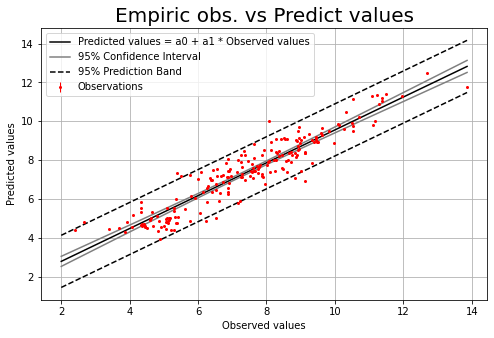

In [22]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
index_a0 = str(a0).find('+/-')
index_a1 = str(a1).find('+/-')
am_a0 = str(a0)[0:index_a0]
ci_a0 = str(a0)[index_a0+3:]
am_a1 = str(a1)[0:index_a1]
ci_a1 = str(a1)[index_a1+3:]

print('Uncertainty')
print(f'a0: {am_a0}+/-{round(float(ci_a0)*(n_all_y/n_stat_y)**0.5, 3)}')
print(f'a1: {am_a1}+/-{round(float(ci_a1)*(n_all_y/n_stat_y)**0.5, 3)}')

# plot data
plt.figure(figsize =(8, 5))
plt.errorbar(stat_y[predictor]['mean'], stat_y[0]['50%'], yerr=[list(l_sd_y_pred), list(t_sd_y_pred)], c = 'red', fmt='o', lw=1, ms=2, label='Observations')
plt.yscale('linear')

# calculate regression confidence interval
px = np.linspace(2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std * (n_all_y**0.5)/(n_stat_y**0.5), c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# Uncertainty parameters and confidence intervals

In [23]:
# Intermedia ratio for calculation CI
CIR = 2/((n_test + n_train)/n_test)**0.5

In [24]:
# Statistic for SHAP-values

number_iteration = len(aggr_Shap_values.groupby(['Feature']))
shap_list = aggr_Shap_values.groupby(['Feature'])


for i in range(number_iteration):
    itr_mean = round(np.mean(list(shap_list)[i][1].iloc[0:, 1]), 3)
    itr_Q50 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.50), 3)
    itr_Q16 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.16), 3)
    itr_Q84 = round(np.quantile(list(shap_list)[i][1].iloc[0:, 1], 0.84), 3)
    itr_l = (itr_Q50 - itr_Q16)*CIR
    l_CI = itr_Q50 - itr_l
    itr_t = (itr_Q84 - itr_Q50)*CIR
    t_CI = itr_Q50 + itr_t    
    print(f"SHAP-values for: {list(shap_list)[i][0]}: mean - {itr_mean}, median - {itr_Q50}, CI - [{round(l_CI, 3)}-{round(t_CI, 3)}]\n")        

SHAP-values for: AEDR_mean: mean - 0.345, median - 0.342, CI - [0.308-0.375]

SHAP-values for: D_cm: mean - 0.218, median - 0.218, CI - [0.193-0.243]

SHAP-values for: F_Soil_ID: mean - 0.176, median - 0.177, CI - [0.153-0.201]

SHAP-values for: Species_ID: mean - 0.092, median - 0.092, CI - [0.078-0.106]

SHAP-values for: Sr_2021_kBq_m: mean - 1.099, median - 1.1, CI - [1.055-1.144]



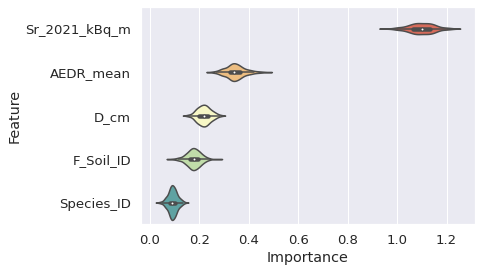

In [25]:
sns.set(font_scale=1.2)
sns.violinplot(x="Importance", y="Feature", data=aggr_Shap_values, inner="box", palette="Spectral", order=['Sr_2021_kBq_m', 'AEDR_mean', 'D_cm', 'F_Soil_ID', 'Species_ID'])
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

In [26]:
# Aggregate stat
# optimal number of iterations
aggr_optimal_n_mean = np.mean(aggr_optimal_n)
aggr_optimal_n_Q025 = np.quantile(aggr_optimal_n, 0.025)
aggr_optimal_n_Q16 = np.quantile(aggr_optimal_n, 0.16)
aggr_optimal_n_Q50 = np.quantile(aggr_optimal_n, 0.50)
aggr_optimal_n_Q84 = np.quantile(aggr_optimal_n, 0.84)
aggr_optimal_n_Q975 = np.quantile(aggr_optimal_n, 0.975)

# bias
aggr_bias_mean = np.mean(aggr_bias)
aggr_bias_Q025 = np.quantile(aggr_bias, 0.025)
aggr_bias_Q16 = np.quantile(aggr_bias, 0.16)
aggr_bias_Q50 = np.quantile(aggr_bias, 0.50)
aggr_bias_Q84 = np.quantile(aggr_bias, 0.84)
aggr_bias_Q975 = np.quantile(aggr_bias, 0.975)

aggr_rel_bias_mean = np.mean(aggr_rel_bias)
aggr_rel_bias_Q025 = np.quantile(aggr_rel_bias, 0.025)
aggr_rel_bias_Q16 = np.quantile(aggr_rel_bias, 0.16)
aggr_rel_bias_Q50 = np.quantile(aggr_rel_bias, 0.50)
aggr_rel_bias_Q84 = np.quantile(aggr_rel_bias, 0.84)
aggr_rel_bias_Q975 = np.quantile(aggr_rel_bias, 0.975)

# RMSE
aggr_rmse_mean = np.mean(aggr_rmse)
aggr_rmse_Q025 = np.quantile(aggr_rmse, 0.025)
aggr_rmse_Q16 = np.quantile(aggr_rmse, 0.16)
aggr_rmse_Q50 = np.quantile(aggr_rmse, 0.50)
aggr_rmse_Q84 = np.quantile(aggr_rmse, 0.84)
aggr_rmse_Q975 = np.quantile(aggr_rmse, 0.975)

aggr_rel_rmse_mean = np.mean(aggr_rel_rmse)
aggr_rel_rmse_Q025 = np.quantile(aggr_rel_rmse, 0.025)
aggr_rel_rmse_Q16 = np.quantile(aggr_rel_rmse, 0.16)
aggr_rel_rmse_Q50 = np.quantile(aggr_rel_rmse, 0.50)
aggr_rel_rmse_Q84 = np.quantile(aggr_rel_rmse, 0.84)
aggr_rel_rmse_Q975 = np.quantile(aggr_rel_rmse, 0.975)

# MSE
aggr_mse_mean = np.mean(aggr_mse)
aggr_mse_Q025 = np.quantile(aggr_mse, 0.025)
aggr_mse_Q16 = np.quantile(aggr_mse, 0.16)
aggr_mse_Q50 = np.quantile(aggr_mse, 0.50)
aggr_mse_Q84 = np.quantile(aggr_mse, 0.84)
aggr_mse_Q975 = np.quantile(aggr_mse, 0.975)

# R-square
aggr_R_square_mean = np.mean(aggr_R_square)
aggr_R_square_Q025 = np.quantile(aggr_R_square, 0.025)
aggr_R_square_Q16 = np.quantile(aggr_R_square, 0.16)
aggr_R_square_Q50 = np.quantile(aggr_R_square, 0.50)
aggr_R_square_Q84 = np.quantile(aggr_R_square, 0.84)
aggr_R_square_Q975 = np.quantile(aggr_R_square, 0.975)

# exp_bias
exp_aggr_bias_mean = np.mean(exp_aggr_bias)
exp_aggr_bias_Q025 = np.quantile(exp_aggr_bias, 0.025)
exp_aggr_bias_Q16 = np.quantile(exp_aggr_bias, 0.16)
exp_aggr_bias_Q50 = np.quantile(exp_aggr_bias, 0.50)
exp_aggr_bias_Q84 = np.quantile(exp_aggr_bias, 0.84)
exp_aggr_bias_Q975 = np.quantile(exp_aggr_bias, 0.975)

exp_aggr_rel_bias_mean = np.mean(exp_aggr_rel_bias)
exp_aggr_rel_bias_Q025 = np.quantile(exp_aggr_rel_bias, 0.025)
exp_aggr_rel_bias_Q16 = np.quantile(exp_aggr_rel_bias, 0.16)
exp_aggr_rel_bias_Q50 = np.quantile(exp_aggr_rel_bias, 0.50)
exp_aggr_rel_bias_Q84 = np.quantile(exp_aggr_rel_bias, 0.84)
exp_aggr_rel_bias_Q975 = np.quantile(exp_aggr_rel_bias, 0.975)

# exp_RMSE
exp_aggr_rmse_mean = np.mean(exp_aggr_rmse)
exp_aggr_rmse_Q025 = np.quantile(exp_aggr_rmse, 0.025)
exp_aggr_rmse_Q16 = np.quantile(exp_aggr_rmse, 0.16)
exp_aggr_rmse_Q50 = np.quantile(exp_aggr_rmse, 0.50)
exp_aggr_rmse_Q84 = np.quantile(exp_aggr_rmse, 0.84)
exp_aggr_rmse_Q975 = np.quantile(exp_aggr_rmse, 0.975)

exp_aggr_rel_rmse_mean = np.mean(exp_aggr_rel_rmse)
exp_aggr_rel_rmse_Q025 = np.quantile(exp_aggr_rel_rmse, 0.025)
exp_aggr_rel_rmse_Q16 = np.quantile(exp_aggr_rel_rmse, 0.16)
exp_aggr_rel_rmse_Q50 = np.quantile(exp_aggr_rel_rmse, 0.50)
exp_aggr_rel_rmse_Q84 = np.quantile(exp_aggr_rel_rmse, 0.84)
exp_aggr_rel_rmse_Q975 = np.quantile(exp_aggr_rel_rmse, 0.975)

# exp_MSE
exp_aggr_mse_mean = np.mean(exp_aggr_mse)
exp_aggr_mse_Q025 = np.quantile(exp_aggr_mse, 0.025)
exp_aggr_mse_Q16 = np.quantile(exp_aggr_mse, 0.16)
exp_aggr_mse_Q50 = np.quantile(exp_aggr_mse, 0.50)
exp_aggr_mse_Q84 = np.quantile(exp_aggr_mse, 0.84)
exp_aggr_mse_Q975 = np.quantile(exp_aggr_mse, 0.975)

# exp_R-square
exp_aggr_R_square_mean = np.mean(exp_aggr_R_square)
exp_aggr_R_square_Q025 = np.quantile(exp_aggr_R_square, 0.025)
exp_aggr_R_square_Q16 = np.quantile(exp_aggr_R_square, 0.16)
exp_aggr_R_square_Q50 = np.quantile(exp_aggr_R_square, 0.50)
exp_aggr_R_square_Q84 = np.quantile(exp_aggr_R_square, 0.84)
exp_aggr_R_square_Q975 = np.quantile(exp_aggr_R_square, 0.975)

In [27]:
# Output calculated stat
print("Logarithmically transformed predictive values:")
print(f"Aggregate optimal number of iterations statistic: \n mean: {round(aggr_optimal_n_mean, 3)}, median: {round(aggr_optimal_n_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_optimal_n_Q025, 3)}-{round(aggr_optimal_n_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_optimal_n_Q50-((aggr_optimal_n_Q50-aggr_optimal_n_Q16)*CIR), 3)}-{round(aggr_optimal_n_Q50+((aggr_optimal_n_Q84-aggr_optimal_n_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias statistic: \n mean: {round(aggr_bias_mean, 3)}, median: {round(aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(aggr_bias_Q025, 3)}-{round(aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_bias_Q50-((aggr_bias_Q50-aggr_bias_Q16)*CIR), 3)}-{round(aggr_bias_Q50+((aggr_bias_Q84-aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(aggr_rmse_mean, 3)}, median: {round(aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rmse_Q025, 3)}-{round(aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rmse_Q50-((aggr_rmse_Q50-aggr_rmse_Q16)*CIR), 3)}-{round(aggr_rmse_Q50+((aggr_rmse_Q84-aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(aggr_mse_mean, 3)}, median: {round(aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_mse_Q025, 3)}-{round(aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_mse_Q50-((aggr_mse_Q50-aggr_mse_Q16)*CIR), 3)}-{round(aggr_mse_Q50+((aggr_mse_Q84-aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(aggr_R_square_mean, 3)}, median: {round(aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_R_square_Q025, 3)}-{round(aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_R_square_Q50-((aggr_R_square_Q50-aggr_R_square_Q16)*CIR), 3)}-{round(aggr_R_square_Q50+((aggr_R_square_Q84-aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(aggr_rel_bias_mean, 3)}, median: {round(aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_bias_Q025, 3)}-{round(aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_bias_Q50-((aggr_rel_bias_Q50-aggr_rel_bias_Q16)*CIR), 3)}-{round(aggr_rel_bias_Q50+((aggr_rel_bias_Q84-aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(aggr_rel_rmse_mean, 3)}, median: {round(aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(aggr_rel_rmse_Q025, 3)}-{round(aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(aggr_rel_rmse_Q50-((aggr_rel_rmse_Q50-aggr_rel_rmse_Q16)*CIR), 3)}-{round(aggr_rel_rmse_Q50+((aggr_rel_rmse_Q84-aggr_rel_rmse_Q50)*CIR), 3)} \n***")

print("\nTransformed predictive values into the primary state:")
print(f"Aggregate bias statistic: \n mean: {round(exp_aggr_bias_mean, 3)}, median: {round(exp_aggr_bias_Q50, 3)},\n pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_bias_Q025, 3)}-{round(exp_aggr_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_bias_Q50-((exp_aggr_bias_Q50-exp_aggr_bias_Q16)*CIR), 3)}-{round(exp_aggr_bias_Q50+((exp_aggr_bias_Q84-exp_aggr_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE statistic: \n mean: {round(exp_aggr_rmse_mean, 3)}, median: {round(exp_aggr_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rmse_Q025, 3)}-{round(exp_aggr_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rmse_Q50-((exp_aggr_rmse_Q50-exp_aggr_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rmse_Q50+((exp_aggr_rmse_Q84-exp_aggr_rmse_Q50)*CIR), 3)} \n***")
print(f"Aggregate MSE statistic: \n mean: {round(exp_aggr_mse_mean, 3)}, median: {round(exp_aggr_mse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_mse_Q025, 3)}-{round(exp_aggr_mse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_mse_Q50-((exp_aggr_mse_Q50-exp_aggr_mse_Q16)*CIR), 3)}-{round(exp_aggr_mse_Q50+((exp_aggr_mse_Q84-exp_aggr_mse_Q50)*CIR), 3)} \n***")
print(f"Aggregate R^2 statistic: \n mean: {round(exp_aggr_R_square_mean, 3)}, median: {round(exp_aggr_R_square_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_R_square_Q025, 3)}-{round(exp_aggr_R_square_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_R_square_Q50-((exp_aggr_R_square_Q50-exp_aggr_R_square_Q16)*CIR), 3)}-{round(exp_aggr_R_square_Q50+((exp_aggr_R_square_Q84-exp_aggr_R_square_Q50)*CIR), 3)} \n***")
print(f"Aggregate bias(%) statistic: \n mean: {round(exp_aggr_rel_bias_mean, 3)}, median: {round(exp_aggr_rel_bias_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_bias_Q025, 3)}-{round(exp_aggr_rel_bias_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_bias_Q50-((exp_aggr_rel_bias_Q50-exp_aggr_rel_bias_Q16)*CIR), 3)}-{round(exp_aggr_rel_bias_Q50+((exp_aggr_rel_bias_Q84-exp_aggr_rel_bias_Q50)*CIR), 3)} \n***")
print(f"Aggregate RMSE(%) statistic: \n mean: {round(exp_aggr_rel_rmse_mean, 3)}, median: {round(exp_aggr_rel_rmse_Q50, 3)}, pred. interval (P(0.025)-P(0.975)): {round(exp_aggr_rel_rmse_Q025, 3)}-{round(exp_aggr_rel_rmse_Q975, 3)}, \n conf. interval (p-value=0.95): {round(exp_aggr_rel_rmse_Q50-((exp_aggr_rel_rmse_Q50-exp_aggr_rel_rmse_Q16)*CIR), 3)}-{round(exp_aggr_rel_rmse_Q50+((exp_aggr_rel_rmse_Q84-exp_aggr_rel_rmse_Q50)*CIR), 3)} \n***")

Logarithmically transformed predictive values:
Aggregate optimal number of iterations statistic: 
 mean: 59.795, median: 63.0,
 pred. interval (P(0.025)-P(0.975)): 39.0-67.0, 
 conf. interval (p-value=0.95): 51.345-66.586 
***
Aggregate bias statistic: 
 mean: -0.037, median: -0.041,
 pred. interval (P(0.025)-P(0.975)): -0.254-0.197, 
 conf. interval (p-value=0.95): -0.147-0.063 
***
Aggregate RMSE statistic: 
 mean: 0.749, median: 0.743, pred. interval (P(0.025)-P(0.975)): 0.592-0.917, 
 conf. interval (p-value=0.95): 0.671-0.821 
***
Aggregate MSE statistic: 
 mean: 0.569, median: 0.552, pred. interval (P(0.025)-P(0.975)): 0.35-0.841, 
 conf. interval (p-value=0.95): 0.451-0.675 
***
Aggregate R^2 statistic: 
 mean: 0.859, median: 0.861, pred. interval (P(0.025)-P(0.975)): 0.792-0.915, 
 conf. interval (p-value=0.95): 0.831-0.89 
***
Aggregate bias(%) statistic: 
 mean: -0.49, median: -0.569, pred. interval (P(0.025)-P(0.975)): -3.352-2.754, 
 conf. interval (p-value=0.95): -1.95-0.8

# Analysis of residuals distributions dependents on empirical values of predicted parameter

Text(0.5, 1.0, 'In typical state')

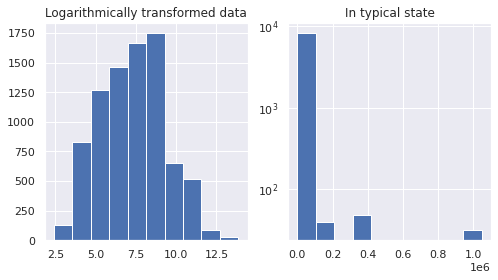

In [28]:
# Preprocessing
results_y['T_exp_empiric'] = np.exp(results_y[predictor])
results_y['T_exp_pred'] = np.exp(results_y[0])

results_y['ln_residuals'] = results_y[predictor] - results_y[0]
results_y['T_exp_residuals'] = results_y['T_exp_empiric'] - results_y['T_exp_pred']
results_y['ln_residuals_%'] =  results_y['ln_residuals'] / results_y[predictor] * 100
results_y['T_exp_residuals_%'] = results_y['T_exp_residuals'] / results_y['T_exp_empiric'] * 100

# plt.hist(results_y[predictor])
# plt.hist(results_y[predictor])
fig, axs = plt.subplots(1, 2)
axs[0].hist(results_y[predictor])
axs[0].set_title('Logarithmically transformed data')
axs[1].hist(results_y['T_exp_empiric'], log=True)
axs[1].set_title('In typical state')
# plt.show() 

In [29]:
# INPORTANT  - added your intervals
ln_intervals = pd.cut(results_y[predictor], [0, 3, 6, 9, 12, 15])
T_exp_intervals = pd.cut(results_y['T_exp_empiric'], [0, 1000, 10000, 50000, 100000, 1000000])

ln_grouped = results_y.groupby(ln_intervals)
T_exp_grouped = results_y.groupby(T_exp_intervals) 

max_obs_in_group = len(results_y)    
    
pre_ln = pd.DataFrame()
pre_T_exp = pd.DataFrame()
pre_rel_ln = pd.DataFrame()
pre_rel_T_exp = pd.DataFrame()

pre_ln = pre_ln.assign(row_number=range(max_obs_in_group))
pre_T_exp = pre_T_exp.assign(row_number=range(max_obs_in_group))
pre_rel_ln = pre_rel_ln.assign(row_number=range(max_obs_in_group))
pre_rel_T_exp = pre_rel_T_exp.assign(row_number=range(max_obs_in_group))

for i in range(len(list(ln_grouped))):
    pre_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals'])
    pre_rel_ln[list(ln_grouped)[i][0]] = pd.Series(list(ln_grouped)[i][1]['ln_residuals_%'])

for i in range(len(list(T_exp_grouped))):
    pre_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals'])
    pre_rel_T_exp[list(T_exp_grouped)[i][0]] = pd.Series(list(T_exp_grouped)[i][1]['T_exp_residuals_%'])

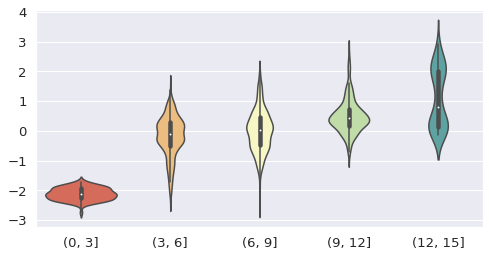

In [30]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_ln[list(pre_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

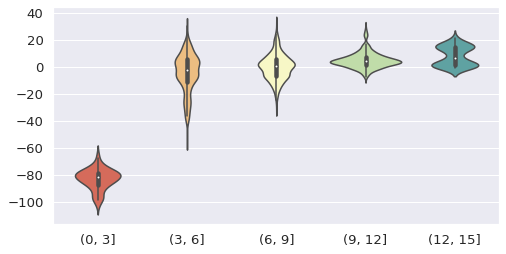

In [31]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_ln[(pre_rel_ln.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

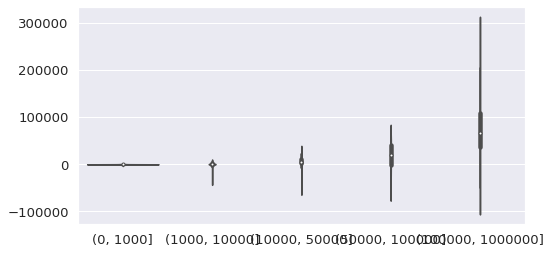

In [32]:
# Plots of residuals versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_T_exp[list(pre_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

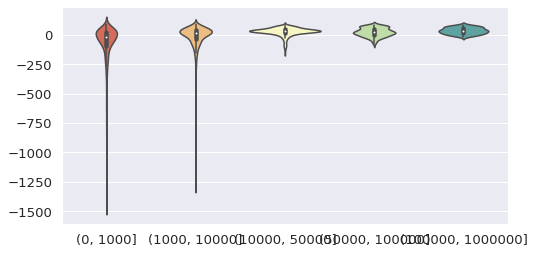

In [33]:
# Plots of relative residuals (in %) versus predicted values
sns.set(font_scale=1.2)
sns.violinplot(data=pre_rel_T_exp[(pre_rel_T_exp.columns)[1:]], inner="box", palette="Spectral")
sns.set(rc={'figure.figsize':(8,4)})
plt.show()

# ***Creating final XGBoost model using all obs. for its training***

In [34]:
# Generate test and training samples
f_X_train = X
f_y_train = y

In [35]:
# Implementation of the scikit-learn API for XGBoost regression
f_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=p1, gamma=p2, learning_rate=p3, 
                          max_depth=p4, n_estimators=p5, subsample=p6, eval_metric=["rmse"])

In [36]:
# Fitting the model 
f_xgb_model.fit(f_X_train, f_y_train, early_stopping_rounds=20, eval_set=[(f_X_train, f_y_train)])
# learning dynamics
f_y_pred = f_xgb_model.predict(f_X_train, ntree_limit=f_xgb_model.best_ntree_limit)

[0]	validation_0-rmse:6.54388
[1]	validation_0-rmse:5.96044
[2]	validation_0-rmse:5.44956
[3]	validation_0-rmse:4.96728
[4]	validation_0-rmse:4.52966
[5]	validation_0-rmse:4.14037
[6]	validation_0-rmse:3.78498
[7]	validation_0-rmse:3.46444
[8]	validation_0-rmse:3.17135


`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.


[9]	validation_0-rmse:2.90115
[10]	validation_0-rmse:2.66311
[11]	validation_0-rmse:2.44642
[12]	validation_0-rmse:2.25773
[13]	validation_0-rmse:2.07601
[14]	validation_0-rmse:1.91630
[15]	validation_0-rmse:1.77154
[16]	validation_0-rmse:1.63511
[17]	validation_0-rmse:1.51463
[18]	validation_0-rmse:1.40498
[19]	validation_0-rmse:1.30985
[20]	validation_0-rmse:1.22575
[21]	validation_0-rmse:1.14084
[22]	validation_0-rmse:1.06555
[23]	validation_0-rmse:1.00401
[24]	validation_0-rmse:0.94180
[25]	validation_0-rmse:0.89317
[26]	validation_0-rmse:0.85055
[27]	validation_0-rmse:0.81096
[28]	validation_0-rmse:0.77240
[29]	validation_0-rmse:0.73596
[30]	validation_0-rmse:0.70844
[31]	validation_0-rmse:0.67721
[32]	validation_0-rmse:0.65588
[33]	validation_0-rmse:0.63634
[34]	validation_0-rmse:0.61621
[35]	validation_0-rmse:0.59988
[36]	validation_0-rmse:0.58550
[37]	validation_0-rmse:0.56988
[38]	validation_0-rmse:0.55678
[39]	validation_0-rmse:0.54674
[40]	validation_0-rmse:0.53753
[41]	vali

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [37]:
# Iteration with the best result
f_optimal_n = f_xgb_model.best_ntree_limit-1
print("The best iteration: " + str(f_optimal_n))    

The best iteration: 67


In [38]:
# Preparing data for building a learning graph
f_results = f_xgb_model.evals_result()

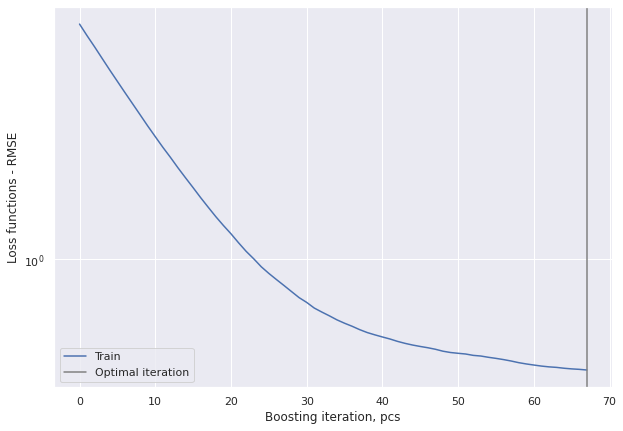

In [39]:
# Learning curves for the XGBoost model 
plt.figure(figsize=(10,7))
plt.yscale("log")
plt.plot(f_results['validation_0']['rmse'], label='Train')
plt.axvline(f_optimal_n, color="gray", label="Optimal iteration")
plt.xlabel("Boosting iteration, pcs")
plt.ylabel("Loss functions - RMSE")
plt.legend()

# Estimation of a final XGBoost model

In [40]:
# Convert data to 'array' type
f_conv_y_pred = pd.DataFrame(f_y_pred) # Double transformation
f_y_pred2 = f_conv_y_pred.values
f_y_train2 = f_y_train.values

# Intermediate results
f_n_sample = len(f_y_pred2)
f_main_sample = f_y_train.sum() / f_n_sample

# Calculation of bias
f_diff = f_y_pred2 - f_y_train2
f_bias = f_diff.sum()/f_n_sample
print('Bias: %.1f' % (f_bias))
print("Relative bias(%):", " %.2f" % (f_bias/f_main_sample*100))

# Calculation of RMSE
f_rmse = np.sqrt(mean_squared_error(f_y_train, f_y_pred))
print("RMSE: %.1f" % (f_rmse))
print("Relative RMSE(%):", " %.3f" % (f_rmse/f_main_sample*100))

# Calculation of MSE
f_mse = mean_squared_error(f_y_train, f_y_pred)
print("MSE: %.1f" % (f_mse))

# Calculation of Square R
f_R_square = r2_score(f_y_train, f_y_pred)
print("R square: %.1f%%" % (f_R_square * 100.0))

Bias: -0.0
Relative bias(%):  -0.10
RMSE: 0.4
Relative RMSE(%):  5.593
MSE: 0.2
R square: 95.9%


In [41]:
# Convert input data
f_x_train_conv = np.array(f_y_train)
f_x_train_convert = np.array([None]*f_n_sample)
for i in range(f_n_sample):
    f_x_train_convert[i] = float(f_x_train_conv[i])

x_plot = f_x_train_convert
y_plot = f_y_pred
n = len(y_plot)

# Function for fitting a linear curve and estimating its parameters
def f(x_plot, a0, a1):
    return a0 + a1 * x_plot

popt, pcov = curve_fit(f, x_plot, y_plot)

R^2: 0.960
Uncertainty
a0: 0.51+/-0.10
a1: 0.930+/-0.013


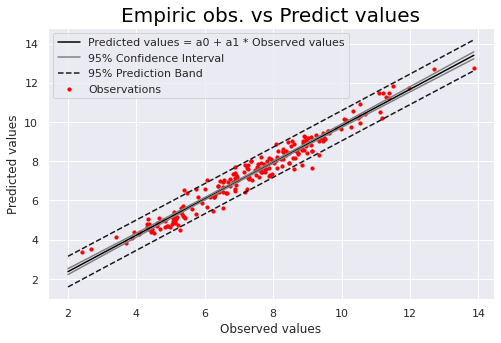

In [42]:
# Building linear a graph and calculation uncertainties

# retrieve parameter values
a0 = popt[0]
a1 = popt[1]

# compute r^2
r2 = 1.0-(sum((y_plot-f(x_plot, a0, a1)) ** 2)/((n - 1.0)*np.var(y_plot, ddof = 1)))
print(f'R^2: {r2:.3f}')

# calculate parameter confidence interval
a0, a1 = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a0: ' + str(a0))
print('a1: ' + str(a1))

# plot data
plt.figure(figsize =(8, 5))
plt.scatter(x_plot, y_plot, s = 10, c = 'red', label='Observations', marker = 'o')
plt.yscale('linear')

# estimation uncertenlies intervals
def predband(x_plot, xd, yd, p, func, conf=0.95):
    # x_plot = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x_plot - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x_plot, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

# calculate regression confidence interval
px = np.linspace(2, max(x_plot), 100)
py = a0 + a1 * px
nom = unp.nominal_values(py)
std = unp.std_devs(py)

lpb, upb = predband(px, x_plot, y_plot, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='Predicted values = a0 + a1 * Observed values')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='gray',\
         label='95% Confidence Interval')
plt.plot(px, nom + 1.96 * std, c='gray')

# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('Predicted values')
plt.xlabel('Observed values')
plt.grid(True)
plt.legend(loc='best')
plt.title('Empiric obs. vs Predict values', fontsize=20, color="black")
plt.show()

# ***Analisys output final model***

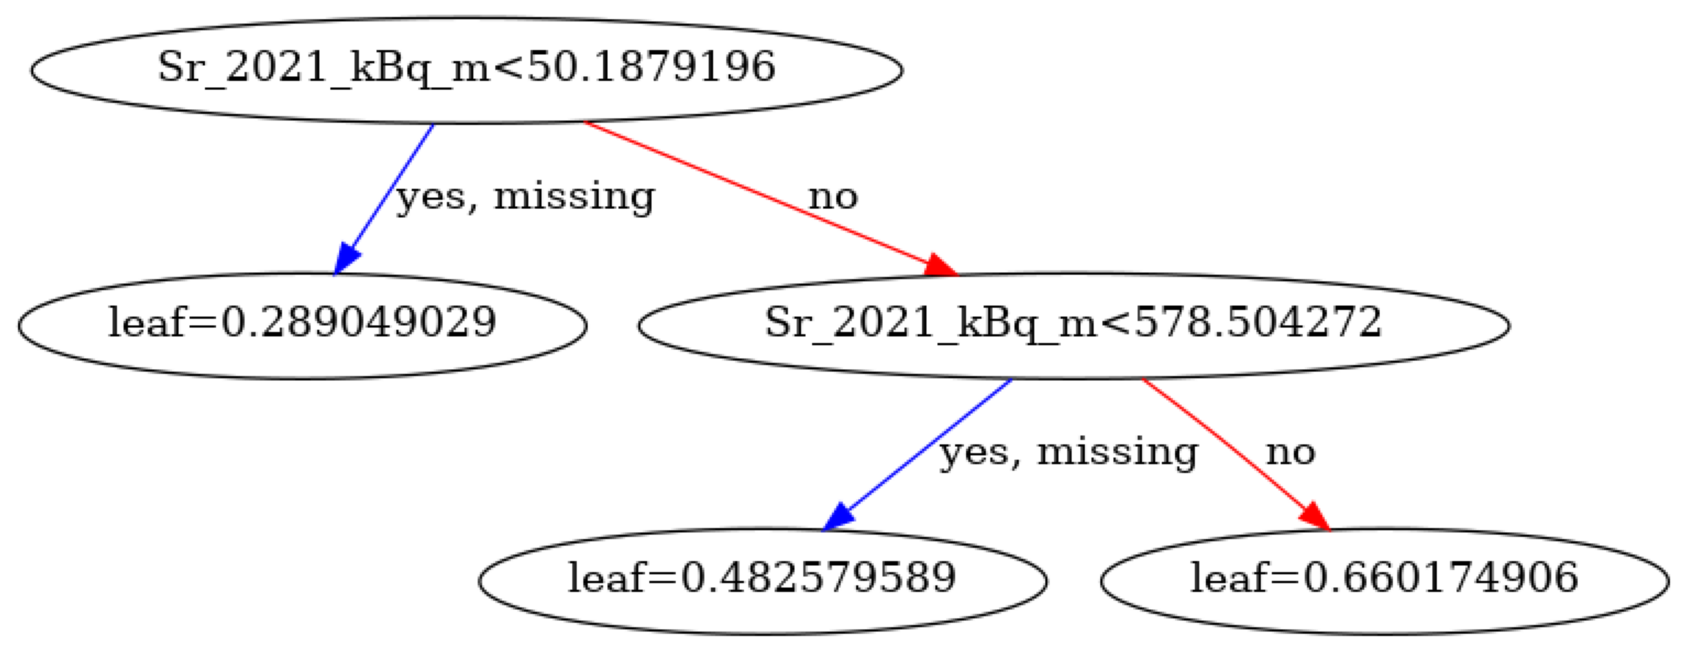

In [47]:
# Visualize the Decision tree (individual obs.)
xgb.plot_tree(f_xgb_model, num_trees=3) # "num_trees" is number of obs.
plt.rcParams['figure.figsize'] = [30, 45]
plt.show()

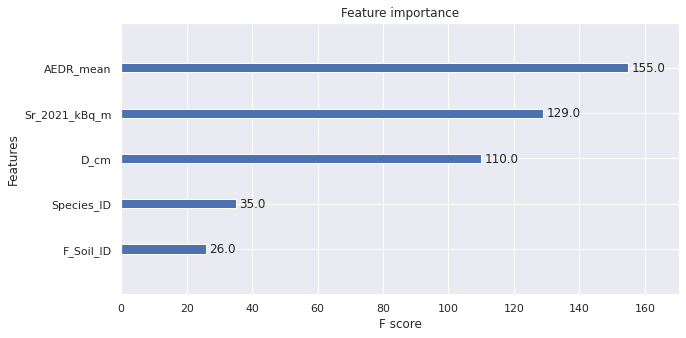

In [49]:
# Importance is calculated as: ”weight” is the number of times a feature appears in a trees
xgb.plot_importance(f_xgb_model, importance_type='weight')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

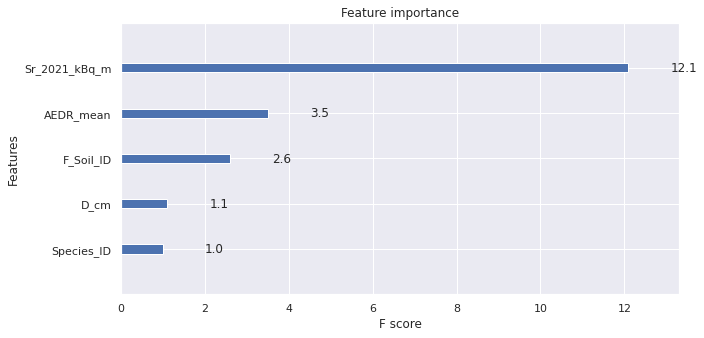

In [50]:
# Importance is calculated as: ”gain” is the average gain of splits which use the feature
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="gain")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key], 1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='gain', show_values=True)

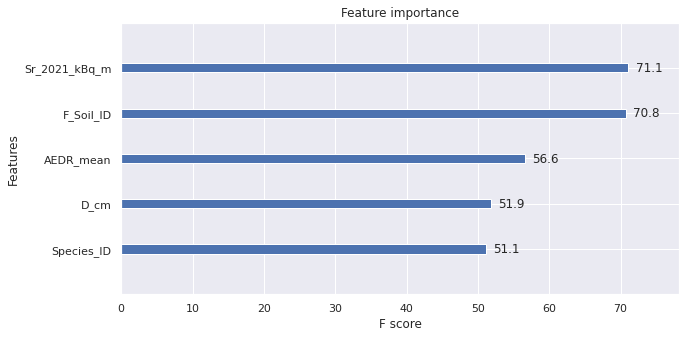

In [51]:
# Importance is calculated as: "cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
# Get the booster from the xgbmodel
booster = f_xgb_model.get_booster()

# Get the importance dictionary (by gain) from the booster
importance = booster.get_score(importance_type="cover")

# make your changes
for key in importance.keys():
    importance[key] = round(importance[key],1)

# provide the importance dictionary to the plotting function
ax = xgb.plot_importance(importance, importance_type='cover', show_values=True)

# Est. of SHAP values for final models

In [52]:
# Сreate an уxplainer object
explainer = shap.TreeExplainer(f_xgb_model)
shap_values = explainer.shap_values(f_X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


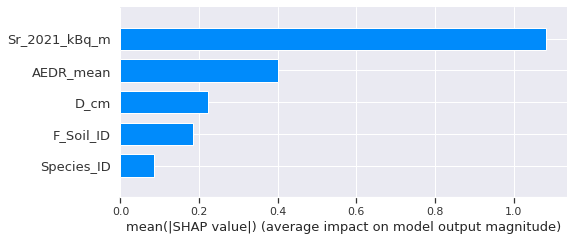

In [53]:
# Mean absolute value of the SHAP values for each feature 
shap.summary_plot(shap_values, f_X_train, plot_type="bar")

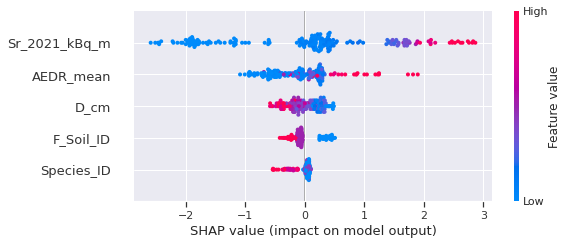

In [54]:
# Graph that summarises the effects of all the features
shap.summary_plot(shap_values, f_X_train)

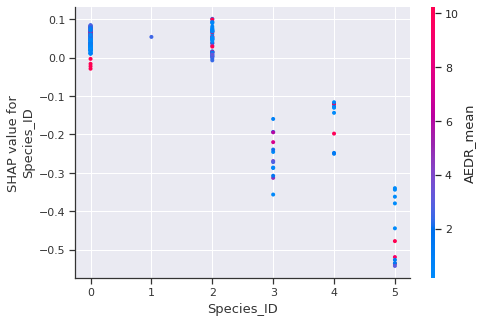

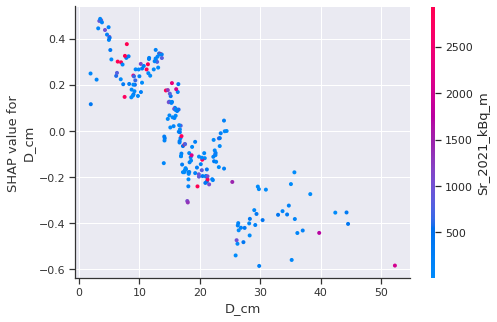

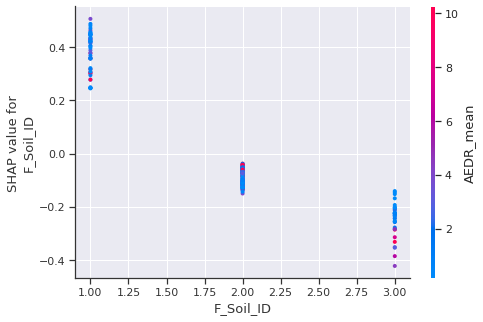

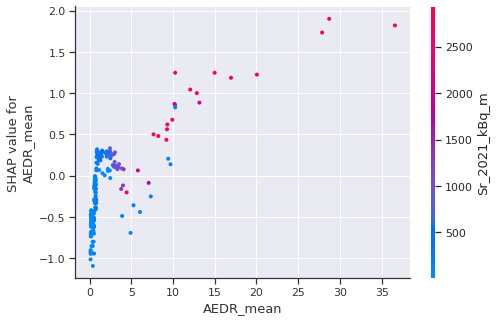

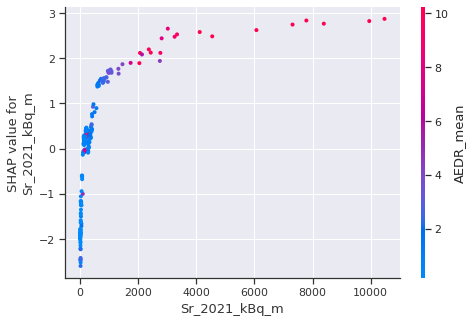

In [55]:
# Create a dependence scatter plot to show the effect of a single feature across the whole dataset
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, f_X_train, color=shap_values)

# *Save XGBoost model*

In [56]:
# Save to JSON
f_xgb_model.save_model("../02_output_data/XGBoost_models/02_LN_Sr_content_without_geo_XGB_model.json")
# Save to text format
f_xgb_model.save_model("../02_output_data/XGBoost_models/02_LN_Sr_content_without_geo_XGB_model.txt")